# Start

Estimating the pareto distribution parameter  of right tail of house prices

Zahra Shamloo, Mohamad Hoseini, Djavad Salehi-Isfahani

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
import pyodbc
import os
import seaborn as sns
import re

import econtools
import econtools.metrics as mt
pd.options.display.float_format = '{:.3f}'.format


from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity

markerShape = ["x","s","o","d","D"]

from scipy.stats import pareto

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# !pip install seaborn
# !pip install polyfit
# !pip install statsmodels
# !pip install pyodbc
# !pip install re
# !pip install econtools
# ! pip install scipy

In [3]:
provinceCode= { "مرکزی":"00" 
              , "گیلان":"01" 
              , "مازندران":"02" 
              , "آذربایجان شرقی":"03" 
              , "آذربایجان غربی":"04" 
              , "كرمانشاه":"05" 
              , "خوزستان":"06" 
              , "فارس":"07" 
              , "كرمان":"08" 
              , "خراسان رضوی":"09" 
              , "اصفهان":"10" 
              , "سيستان وبلوچستان":"11" 
              , "كردستان":"12" 
              , "همدان":"13" 
              , "چهارمحال وبختياري":"14" 
              , "لرستان":"15" 
              , "ایلام":"16" 
              , "كهگيلويه وبويراحمد":"17" 
              , "بوشهر":"18" 
              , "زنجان":"19" 
              , "سمنان":"20" 
              , "یزد":"21"
              , "هرمزگان":"22" 
              , "تهران":"23" 
              , "اردبیل":"24" 
              , "قم":"25" 
              , "قزوین":"26" 
              , "گلستان":"27" 
              , "خراسان شمالی":"28" 
              , "خراسان جنوبی":"29" 
              , "البرز":"30" 
                            }

provinceCodeEng= { "Markazi":"00" 
              , "Gilan":"01" 
              , "Mazandaran":"02" 
              , "Azerbaijan East":"03" 
              , "Azerbaijan West":"04" 
              , "Kermanshah":"05" 
              , "Khuzestan":"06" 
              , "Fars":"07" 
              , "Kerman":"08" 
              , "Khorasan Razavi":"09" 
              , "Isfahan":"10" 
              , "Sistan and Balochestan":"11" 
              , "Kordestan":"12" 
              , "Hamedan":"13" 
              , "Chaharmahaal and Bakhtiari":"14" 
              , "Lorestan":"15" 
              , "Ilam":"16" 
              , "Kohgiluyeh and Boyer-Ahmad":"17" 
              , "Bushehr":"18" 
              , "Zanjan":"19" 
              , "Semnan":"20" 
              , "Yazd":"21"
              , "Hormozgan":"22" 
              , "Tehran":"23" 
              , "Ardabil":"24" 
              , "qom":"25" 
              , "qazvin":"26" 
              , "Golestan":"27" 
              , "Khorasan North":"28" 
              , "Khorasan South":"29" 
              , "Alborz":"30" 
                            }

code_to_ostan = {value : key for (key, value) in provinceCodeEng.items()}

code_to_ostan

province_set=["23"]                                                   

# theta
Estimating the pareto tail index for household expenditure

In [7]:
#province ="تهران"
#provinceNumber= provinceCode[province]
##SBR
# path = r"C:\Users\claudioq\Dropbox\project\data"
# path= "E:\This_Term\Thesis other things\Data\HIES data\data\weight"

expenditure = pd.read_csv( "../Data/HIES/Raw/Sum_U95.csv")

#ZHR
# expenditure = pd.read_csv("")

#cleaning data:
expenditure= expenditure.loc[:, ['ADDRESS','GHazineh','C01','weight','B01','Daramad','B04','H04']]
expenditure.columns= ['household', 'GHazineh','tedad','weight','ownership','Daramad','area','H04']

# calculating expenditure per capita by dividing to square root of household size
expenditure['hazinehPerCapita']= expenditure.Daramad #expenditure.GHazineh / np.sqrt(expenditure.tedad)

# define new vaiables:
expenditure['LnHazineh']= np.log(expenditure.hazinehPerCapita)
expenditure['province']= expenditure.household.astype(str).str[1:3]

In [5]:
'H04' in expenditure.columns

True

In [ ]:
expenditure.sort_values(by=["province","LnHazineh"],inplace=True)
expenditure['Fy'] = expenditure.groupby('province')['weight'].transform(pd.Series.cumsum)

expenditure['countProv']=expenditure.groupby('province')['weight'].transform(pd.Series.sum)

expenditure['Fy'] = expenditure.Fy/expenditure.countProv
# # extracting Tehran and define -ln(1-Fy) as a variable
# Tehran= expenditure[expenditure.province=='23']

# # define new variables :
# Tehran= Tehran.sort_values(by= ['LnHazineh'])
# Tehran.reset_index(inplace=True, drop=True)
# Tehran['Fy']= (Tehran.index) / len(Tehran)
# # Xvariable is -ln(1-Fy) used in regression
# Tehran['Xvariable']= -np.log(1-Tehran['Fy'])              

Tehran= expenditure[expenditure.province.isin(province_set)]
#Tehran= expenditure[expenditure.province==provinceNumber]

# Tehran= Tehran.sort_values(by= ['GHazineh'])
# Tehran['Fy']=Tehran.weight.cumsum() #- Tehran.loc[ 0, 'weight']
# Tehran['Fy']=Tehran.Fy / Tehran.weight.sum()

# Tehran['Xvariable']= -np.log(1-Tehran['Fy'])    

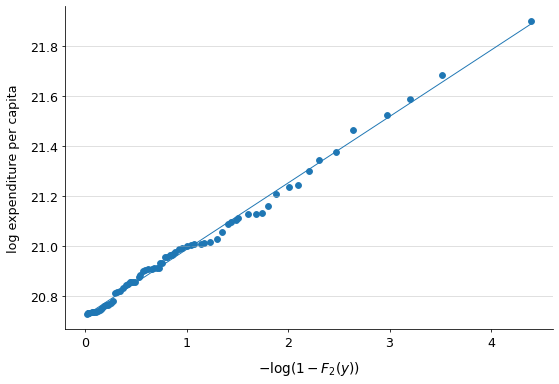

In [ ]:
topPercentile = 0.94
#################
#################
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,1,1)

T= Tehran[Tehran.Fy>= topPercentile]
T= T.sort_values(by= ['LnHazineh'])

T.reset_index(inplace=True, drop=True)
T['F2y']= T.weight.cumsum() #- T.loc[0,'weight']
T['F2y']=T.F2y / T.weight.sum()
T.drop(T.tail(1).index,inplace=True)
T['Xvariable']= -np.log(1-T['F2y'])        

results = mt.reg(
    T,                     # DataFrame
    'LnHazineh',                      # Dependent var (string)
    'Xvariable',                      # Independent var(s) (string or list of strings)
    addcons=True
    ,awt_name='weight'    # Sample weights
    )

ax1.scatter(T['Xvariable'],T['LnHazineh'] )

x_plot=np.linspace(T['Xvariable'].min(), T['Xvariable'].max(),3)
ax1.plot(x_plot, x_plot*results.beta['Xvariable']+results.beta['_cons'] ,linewidth=1)

# ax1.set_title('Figure 1: Pareto quantile plot for household expenditure per capita')
ax1.set_xlabel('$-\log(1-F_2(y))$', fontsize=14,labelpad=10)
ax1.set_ylabel('log expenditure per capita', fontsize=13,labelpad=10)
# ax1.set_xticks(np.arange(2,7.1,0.5))
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(axis='y',alpha=0.5)
# ax1.legend(loc='center left')
plt.show()
# fig.savefig('figures/theta_Tehran_fit.pdf',transparent=True,bbox_inches='tight')

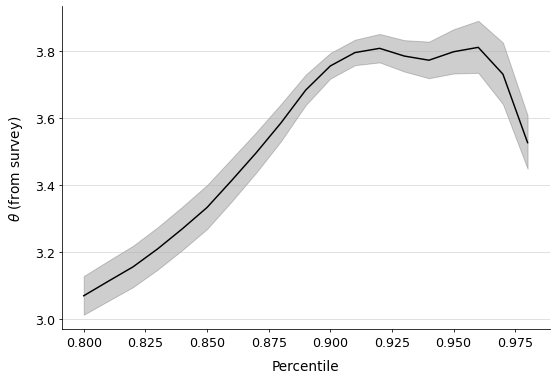

In [ ]:

space=np.arange(0.8, 0.99, 0.01)
theta=np.zeros(shape=(19,5))

for index,topPercentile in enumerate(space):
    
    
    T= Tehran[Tehran.Fy>= topPercentile]
    T= T.sort_values(by= ['LnHazineh'])
    T.reset_index(inplace=True, drop=True)
    T['F2y']=T.weight.cumsum() #- T.loc[0,'weight']
    T['F2y']=T.F2y / T.weight.sum()
    T.drop(T.tail(1).index,inplace=True)
    T['Xvariable']= -np.log(1-T['F2y'])        
    
    ############################################################################
    results = mt.reg(
    T,                     # DataFrame
    'LnHazineh',                      # Dependent var (string)
    'Xvariable',                      # Independent var(s) (string or list of strings)
    addcons=True
    ,awt_name='weight'    # Sample weights
    )
    
    
#     results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
    theta[index,0]=topPercentile
    theta[index,1]= 1/results.beta['Xvariable']
    se=results.se['Xvariable']
    theta[index,4]= se
    
    theta[index,2]= 1/(results.beta['Xvariable']+ 1.6*se)
    theta[index,3]= 1/(results.beta['Xvariable']- 1.6*se)       
    
      
    
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

ax1.plot(theta[:,0], theta[:,1], color=(0,0,0,1))
# hline=ax1.hlines(theta[:,1].mean(), space[0], space[-1] , linestyles='--', color=(0, 0.4 ,1, 0.9))

ax1.fill_between(theta[:,0], theta[:,2],theta[:,3], color=(0,0,0,0.192)
                ,linewidth= 1)

ax1.grid(axis='y',alpha=0.5)
# ax1.set_title(f'Figure 2:  Pareto tail index estimates for household expenditure per capita in Tehran')
ax1.set_xlabel(r'Percentile', fontsize=14,labelpad=10)
ax1.set_ylabel(r'$ \theta $ (from survey)' , fontsize=14,labelpad=10)
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.show()

# fig.savefig('figures/theta_Tehran.pdf',transparent=True,bbox_inches="tight")

In [ ]:
topPercentile=0.94
T= Tehran[Tehran.Fy>= topPercentile]
T= T.sort_values(by= ['LnHazineh'])
T.reset_index(inplace=True, drop=True)
T['F2y']=T.weight.cumsum() 
T['F2y']=T.F2y / T.weight.sum()
T.drop(T.tail(1).index,inplace=True)
T['Xvariable']= -np.log(1-T['F2y'])  

# dropping nan, inf from data to avoid error in regression
# T.replace([np.inf, -np.inf], np.nan,inplace=True)
# T.dropna(subset=['F2y', 'Xvariable'],inplace=True)

# x=T['Xvariable']
# y=T['LnHazineh']

results = mt.reg(
    T,                     # DataFrame
    'LnHazineh',                      # Dependent var (string)
    'Xvariable',                      # Independent var(s) (string or list of strings)
    addcons=True
#     ,awt_name='weight'    # Sample weights
    )

#################

#chera  bi vazne?????????????


results

Dependent variable:	LnHazineh
N:			74
R-squared:		0.9939
Estimation method:	OLS
VCE method:		Standard (Homosk.)
           coeff    se        t   p>t CI_low CI_high
Xvariable  0.265 0.002  108.091 0.000  0.260   0.270
_cons     20.722 0.003 6380.525 0.000 20.715  20.728

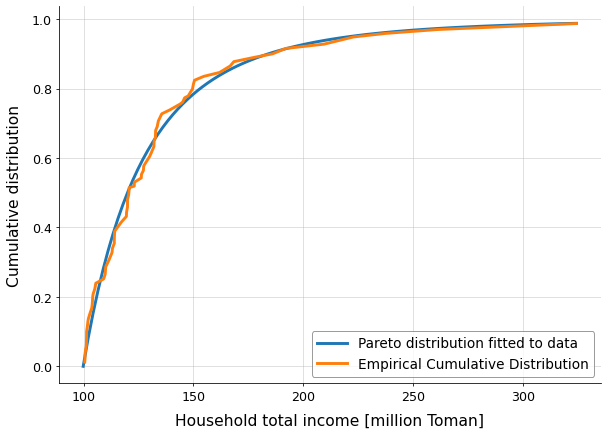

In [ ]:
theta90= 1/ results.beta['Xvariable']
tau90= np.exp(results.beta['_cons'])


fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)



hazineh =np.linspace( tau90  ,T.hazinehPerCapita.max() ,num=100)
F2_hat= 1-(hazineh/tau90)**(-theta90)

ax1.plot(hazineh, F2_hat, 
         label='Pareto distribution fitted to data',linewidth=3)


ax1.plot('hazinehPerCapita', 'F2y',
        data=T,
        label='Empirical Cumulative Distribution'
        ,linewidth=3)

ax1.set_xlabel('Household total income [million Toman]',fontsize=16,labelpad=10)
ax1.set_ylabel(r'Cumulative distribution' , fontsize=16,labelpad=10)
ax1.tick_params(labelsize=13)

ax1.set_xticks(np.arange(1e9,3.1e9,0.5e9))
ax1.set_xticklabels([str(i) for i in np.arange(100,301,50)],rotation= 0)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc='best',edgecolor='gray',prop={'size':14}, handlelength=2.2)
ax1.grid(alpha=0.5)
plt.show()
# fig.savefig('figures/theta_tozee_fit.pdf',transparent=True,bbox_inches="tight")

# Top House Price


In [ ]:
#SBR
# ##### read dta data file from directory
# Path= r"C:\Users\claudioq\Dropbox\project\data\IranHousingData2009-18.dta"
# data_row = pd.read_stata(Path ,convert_categoricals=False)
# coded = data_row.loc[:,["city","prov"]].rename(columns={"city":"cityCode","prov":"provCode"})
# data_row = pd.read_stata(Path)
# data_row = pd.concat([data_row,coded],axis=1)
Path= r"Iran Inequality Measure, Zahra Shamlou\Data\Real-state Transaction\IranHousePrice.dta"
data_row = pd.read_stata("..\Data\Real estate Transaction\IranHousePrice.dta")

#ZHR
# data_row = pd.read_stata("/Users/ZShamloo/Dropbox/project/data/IranHousePrice.dta") 
# data_row.head()
# data_row.info(memory_usage="deep")
data_row["provinceCode"] =data_row.prov.map(provinceCode)
data_row=data_row.loc[data_row.usingType.isin(["مسکوني","مسکونی"]),:]
# data_row.to_feather("data//housePriceFeather.file")
# data_row= pd.read_feather("data//housePriceFeather.file")

In [ ]:

# make year culomn
# year that want to calculate the pareto dist paramater
data=data_row[['id','prov','city','dateShamsi','totalPrice','price','area',
               'age','district','provinceCode']]
data.drop_duplicates(inplace=True) # deleting repeated rows in data(duplicated id)
data['totalPrice']=data['totalPrice']/10000
data['price']= data['price']/10000
data=data[(data['area']>15) & (data['area']<1000)]
data=data[data['age']<100]

data = data.loc[(data['provinceCode'].isin(province_set)),:]

data['year']= data.dateShamsi.astype(str).str[0:4]
data['year'] = pd.to_numeric(data['year'])

data['month']= data.dateShamsi.astype(str).str[5:7]
data['month']= pd.to_numeric(data['month'])

houseIndex = data.groupby(['year','month']).agg({"totalPrice":"mean"}).reset_index()
houseIndex["shakhes"] = houseIndex.totalPrice / houseIndex.loc[
                                                (houseIndex.year==1398)
                                               &(houseIndex.month==1),"totalPrice"].values[0]
# houseIndex
data = pd.merge(data,houseIndex[["year","month","shakhes"]],how="left",on=["year","month"])
data["realTotalPrice"] = data.totalPrice / data.shakhes
data["realPrice"] = data.price / data.shakhes

# # drop outlier based on price per squre meter of houses
data=data[(data['realPrice']>0.05) & (data['realPrice']<100)]
data=data[(data['realTotalPrice'] >= 15)]
# data=data[(data['realTotalPrice'] <= 15000)]
data= data.loc[(data.realTotalPrice<40000),:]
data= data.loc[((data.area*data.price) >= 0.99*data.totalPrice)&
        ((data.area*data.price) <= 1.01*data.totalPrice),:]


##################################################################################

# sorting data based of house prices in each porv
# to calculate empirical cumulative distribution function of prices in each prov
data.sort_values(['prov', 'totalPrice'],inplace=True)
data.reset_index(inplace=True,drop=True)

##################################
# Making new variables
##################################

# creating a column for ln of total prices
data['LnPrice']= np.log(data['totalPrice']) # not that it take natural logarithm
data=data.loc[data.provinceCode.notna(),:]

data["weight"]=1


In [ ]:
###############################
# input parameters value
###############################
year= 1395          # year that want to calculate the pareto dist paramater

#############
# defining columns to draw graph
new=data[(data['provinceCode'].isin(province_set)) & 
         (data['dateShamsi']>=f'{year}/00/00') & 
         (data['dateShamsi']<=f'{year+1}/00/00')]

new.sort_values(by=["provinceCode","totalPrice"],inplace=True)
new['Gy'] = new.groupby('provinceCode')['weight'].transform(pd.Series.cumsum)

new['countProv']=new.groupby('provinceCode')['weight'].transform(pd.Series.sum)

new['Gy'] = new.Gy/new.countProv

# we sort the data base on totalPrice, then use the new ordered index to creat Fy column
# new.sort_values('totalPrice',inplace=True)
# new.reset_index(drop=True, inplace=True)

# new['Gy']=(new.index+1) / (new['price'].count())  # empirical cumulative distribution of totalPrice
# new['Xvariable']= -np.log(1-new['Gy'])               # Xvariable is -ln(1-Fy) used in regression



# dropping nan, inf from data to avoid error in regression
# new.replace(np.inf, np.nan,inplace=True)
# new.dropna(subset=['LnPrice', 'Xvariable'],inplace=True)


new.head()


,id,prov,city,dateShamsi,totalPrice,price,area,age,district,provinceCode,year,month,shakhes,realTotalPrice,realPrice,LnPrice,weight,Gy,countProv
1510,13420914,تهران,تهران,1395/02/05,6.000,0.091,65.920,8.000,18.000,23,1395,2,0.393,15.259,0.231,1.792,1,0.000,180762
1646,13357921,تهران,باقرشهر,1395/01/19,6.000,0.098,61.390,4.000,20.000,23,1395,1,0.391,15.360,0.250,1.792,1,0.000,180762
2052,13506667,تهران,شهريار,1395/02/24,7.000,0.080,87.000,2.000,4.000,23,1395,2,0.393,17.802,0.205,1.946,1,0.000,180762
2290,13608656,تهران,ورامين,1395/03/13,7.200,0.111,65.000,1.000,NaN,23,1395,3,0.422,17.045,0.262,1.974,1,0.000,180762
3029,14088449,تهران,فيروزكوه,1395/06/24,8.200,0.115,71.110,1.000,NaN,23,1395,6,0.444,18.455,0.260,2.104,1,0.000,180762


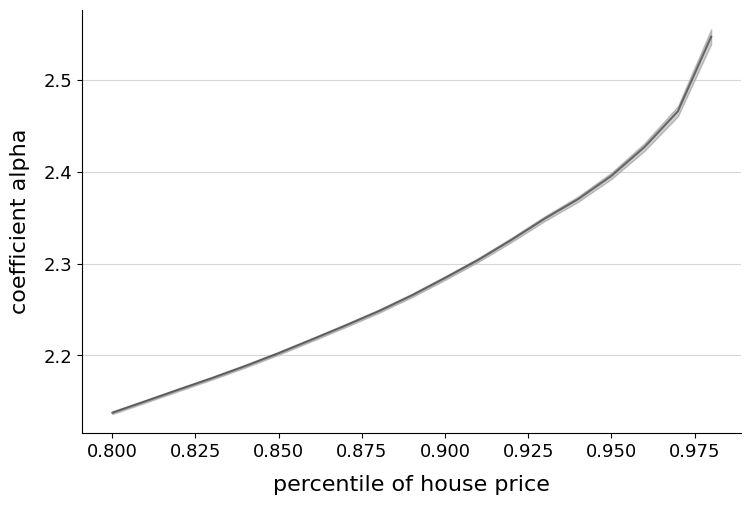

In [ ]:

space=np.arange(0.8, 0.99, 0.01)
alpha=np.zeros(shape=(19,5))

for index,topPercentile in enumerate(space):

    N=new[new.Gy>topPercentile]
    N.sort_values('totalPrice',inplace=True)
    N.reset_index(drop=True, inplace=True)

    N['G2y']=(N.index+1) / (N['totalPrice'].count())  
    N.drop(N.tail(1).index,inplace=True)
    N['Xvariable']= -np.log(1-N['G2y'])     
    # dropping nan, inf from data to avoid error in regression
    N.replace(np.inf , np.nan,inplace=True)
    N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)
    
    x=N['Xvariable']
    y=N['LnPrice']

    results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
    alpha[index,0]=topPercentile
    alpha[index,1]= 1/results.params[1]
    
    se=results.bse[1]
    alpha[index,4]=se
    
    alpha[index,2]= 1/(results.params[1]+ 1.6*se)
    alpha[index,3]= 1/(results.params[1]- 1.6*se)

    
fig=plt.figure(figsize=(8.5,5.5))

ax1=fig.add_subplot(1,1,1)

ax1.plot(alpha[:,0], alpha[:,1], color=(0,0,0,0.5))
# ax1.hlines(alpha[:,1].mean(), space[0], space[-1] , linestyles='--', color=(0, 0.4 ,1, 0.9))

ax1.fill_between(alpha[:,0], alpha[:,2],alpha[:,3], color=(0,0,0,0.192) )


ax1.grid(axis='y',alpha=0.5)
# ax1.set_title(f'Figure 4:   Pareto tail index estimates for Tehran house prices in {year}')
ax1.set_xlabel('percentile of house price', fontsize=16,labelpad=10)
ax1.set_ylabel('coefficient alpha', fontsize=16,labelpad=10)
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.show()
# fig.savefig('figures/alpha_Tehran.pdf',transparent=True,bbox_inches="tight")

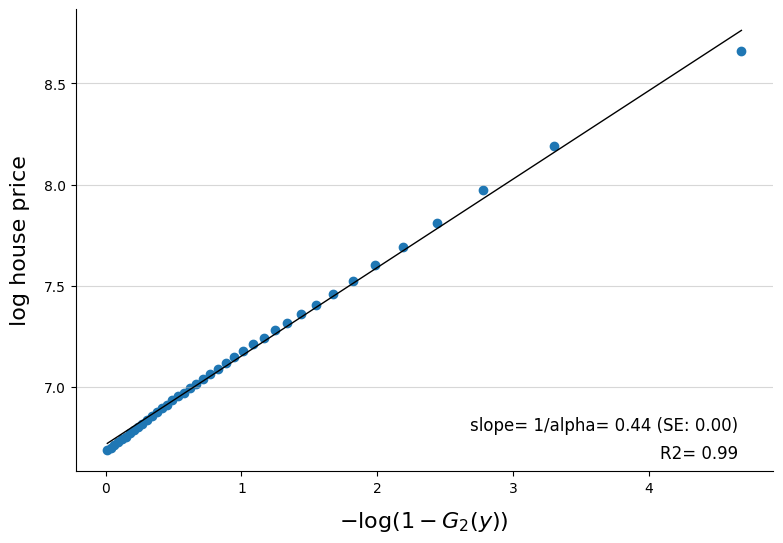

In [14]:
topPercentile= 0.90
# --------------------------------------------------------------
# replicating Figure 3 in the paper with Iran house prices data
    
N=new[new.Gy>topPercentile]
N.sort_values('totalPrice',inplace=True)
N.reset_index(drop=True, inplace=True)

N['G2y']=(N.index+1) / (N['totalPrice'].count())  
N.drop(N.tail(1).index,inplace=True)
N['Xvariable']= -np.log(1-N['G2y'])     
# dropping nan, inf from data to avoid error in regression
N.replace(np.inf , np.nan,inplace=True)
N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

x=N['Xvariable']
y=N['LnPrice']

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,1,1)
# ax1.scatter(x,y)

results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
slope = results.params[1]
slope_se = results.bse[1]
r_squared = results.rsquared

x,y=econtools.binscatter(x,y,n=40)
x=x['Xvariable']
y=y['LnPrice']
ax1.scatter(x,y)

x_plot=np.linspace(x.min(), x.max(),3)
ax1.plot(x_plot, x_plot*results.params[1]+results.params[0],linewidth=1,color='black')

# ax1.set_title('Figure 3: Pareto quantile plot for house prices')
ax1.set_xlabel('$-\log(1-G_2(y))$', fontsize=16,labelpad=10)
ax1.set_ylabel('log house price', fontsize=16,labelpad=10)
# ax1.set_xticks(np.arange(3,13,1))
# ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(axis='y',alpha=0.5)
# ax1.legend(loc='center left')
# Write the estimated slope and slope_se in the parenthesis on the graph
ax1.text(0.95, 0.08, f'slope= 1/alpha= {slope:.2f} (SE: {slope_se:.2f})', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
ax1.text(0.95, 0.02, f'R2= {r_squared:.2f}', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
plt.show()
# fig.savefig('../Figures/Python/alpha_Tehran_fit_95.pdf',transparent=True,bbox_inches="tight")

In [15]:
N.shape[0]/40

451.9

In [51]:
# alpha90= 1/results.params[1]
# tau90= np.exp(results.params[0])

# fig = plt.figure(figsize=(10,6))
# ax1 = fig.add_subplot(1,1,1)

# housePrice = np.linspace(tau90, N.totalPrice.max(), num=1000)
# G2_hat = alpha90 * (tau90**alpha90) / (housePrice**(alpha90+1))

# ax1.plot(housePrice, G2_hat, label='Pareto distribution fitted to data', linewidth=2)

# ax1.hist(N.totalPrice, bins=120, density=True,
#                  label='Empirical probability distribution', alpha=0.5)

# ax1.set_xlabel('house price (in million Toman)', fontsize=16, labelpad=10)
# ax1.set_ylabel('probability density', fontsize=16, labelpad=10)
# ax1.tick_params(labelsize=13)
# ax1.set_xlim(740, 4200)
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.legend(loc='best', edgecolor='gray', prop={'size':14}, handlelength=2.2)
# ax1.grid(alpha=0.5)
# plt.show()
# # fig.savefig('../Figures/Python/house_tail_distribution_fit_pdf_1395.pdf',transparent=True,bbox_inches="tight")

2.120908434514024


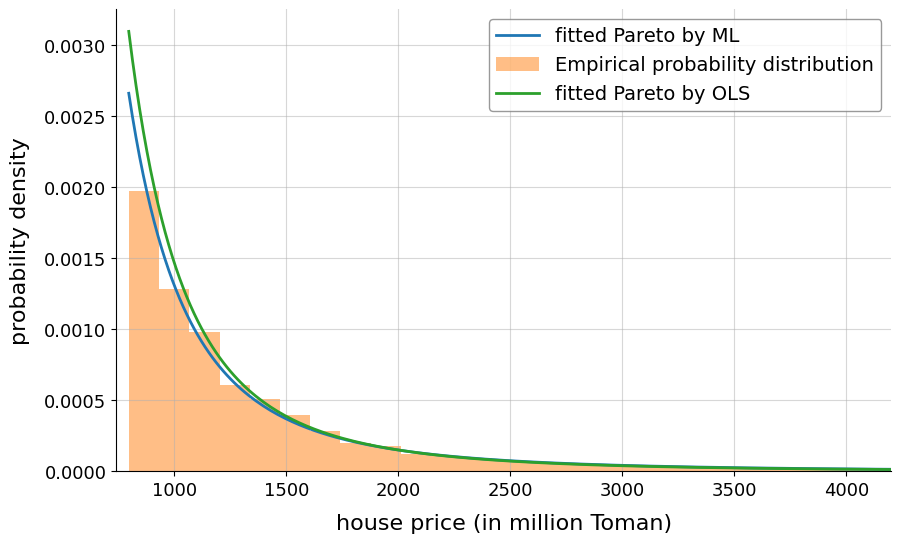

In [52]:
# Fit Pareto distribution to the variable
loc = N.totalPrice.min()
n = N.shape[0]
mianeAlpha = (n) / (N.LnPrice.sum() - n*np.log(loc))
print(mianeAlpha) 

alpha90= mianeAlpha
tau90= loc

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)

housePrice = np.linspace(tau90, N.totalPrice.max(), num=1000)
G2_hat = alpha90 * (tau90**alpha90) / (housePrice**(alpha90+1))
ax1.plot(housePrice, G2_hat, label='fitted Pareto by ML', linewidth=2)

ax1.hist(N.totalPrice, bins=120, density=True,
                 label='Empirical probability distribution', alpha=0.5)

alpha90= 1/results.params[1]
tau90= np.exp(results.params[0])
G2_hat = alpha90 * (tau90**alpha90) / (housePrice**(alpha90+1))
ax1.plot(housePrice, G2_hat, label='fitted Pareto by OLS', linewidth=2)

ax1.set_xlabel('house price (in million Toman)', fontsize=16, labelpad=10)
ax1.set_ylabel('probability density', fontsize=16, labelpad=10)
ax1.tick_params(labelsize=13)
ax1.set_xlim(740, 4200)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc='best', edgecolor='gray', prop={'size':14}, handlelength=2.2)
ax1.grid(alpha=0.5)
plt.show()
# fig.savefig('../Figures/Python/house_tail_distribution_fit_pdf_1395.pdf',transparent=True,bbox_inches="tight")

In [43]:
tau90, alpha90

(823.9246013292435, 2.2843519557448353)

In [38]:
N.totalPrice.min()

796.5

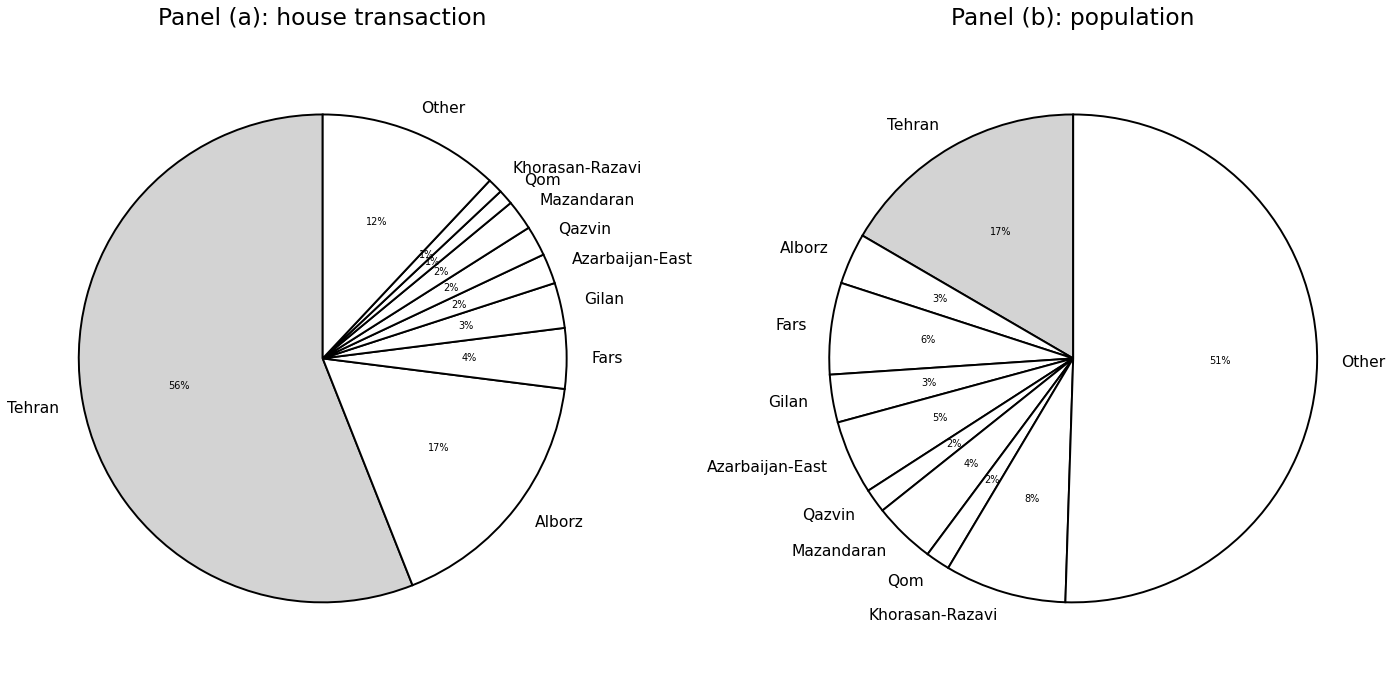

In [79]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# First graph
labels_a = ['Tehran', 'Alborz','Fars',
          'Gilan','Azarbaijan-East','Qazvin',
          'Mazandaran','Qom','Khorasan-Razavi', 'Other']
sizes_a = [56,17,4,3,2,2,2,1,1,12]
colors_a = ['lightgray'] + ['white'] * (len(labels_a) - 1)  # Set the first element to light gray

# Plot the pie chart with white portions and thick lines
patches_a, texts_a, autotexts_a = axs[0].pie(sizes_a, labels=labels_a, colors=colors_a, shadow=False, startangle=90, autopct='%1.0f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'black'})

# Increase the font size of the labels
for text_a in texts_a:
    text_a.set_fontsize(16)
axs[0].set_title("Panel (a): house transaction", fontsize=24)  # Add the title "panel (b)"
axs[0].axis('equal')

# Second graph
labels_b = ['Tehran', 'Alborz','Fars',
          'Gilan','Azarbaijan-East','Qazvin',
          'Mazandaran','Qom','Khorasan-Razavi', 'Other']
sizes_b = [13267637,2712400,4851274,2530696,3909652,1273761,3283582,1292283,6434501]
sizes_b.append(79926270- sum(sizes_b))

colors_b = ['lightgray'] + ['white'] * (len(labels_b) - 1)  # Set the first element to light gray

# Plot the pie chart with white portions and thick lines
patches_b, texts_b, autotexts_b = axs[1].pie(sizes_b, labels=labels_b, colors=colors_b, shadow=False, startangle=90, autopct='%1.0f%%', wedgeprops={'linewidth': 2, 'edgecolor': 'black'})

# Increase the font size of the labels
for text_b in texts_b:
    text_b.set_fontsize(16)

axs[1].set_title("Panel (b): population", fontsize=24)  # Add the title "panel (b)"
axs[1].axis('equal')

plt.tight_layout()
plt.show()

# fig.savefig('../Figures/Python/province_share_population_transaction_new.pdf',transparent=True,bbox_inches="tight")



# Income-House Value

In [11]:
#SBR
# Reading Data from SAS file in the data folder 
# conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};'+
#                       'DBQ= E:\This_Term\Thesis other things\Data\HIES data\data\Outfile-95.mdb')

conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};'+
                      'DBQ= C:\\Users\ehsa7798\Box Sync\Academic\Data\HIES\Outfile-95.mdb')

query='select * from U95p3s04'
rent= pd.read_sql(query, conn)
rent=rent.apply(pd.to_numeric,errors='coerce') 

# #ZHR
# rent = pd.read_csv("../../rentU95.csv") 

rent= rent.loc[(rent.DYCOL01 < 43000) , ['Address','DYCOL01' ,'DYCOL04']]
rent.columns=['household','ownership' ,'rent']

rent = rent.groupby(by=["household"]).agg({"rent":"sum"}).reset_index()

# rent.head()

In [12]:
# data cleaning
rent['rent']= rent['rent'] * 12
rent['LnRent']= np.log(rent.rent)
# merge two data set by household number :
rent = pd.merge(rent, expenditure, on=['household'], how='inner')
# convert data to stata :
# rent.to_stata(r"C:\Users\claudioq\Dropbox\project\data\real_rent_made.dta")
rent.sort_values(by=["province","rent"],inplace=True)
rent['Fy'] = rent.groupby('province')['weight'].transform(pd.Series.cumsum)

rent['countProv']=rent.groupby('province')['weight'].transform(pd.Series.sum)

rent['Fy'] = rent.Fy/rent.countProv
# Extracting Tehran :
rentTehran= rent[rent.province.isin(province_set)]


**Estimating beta with considering weight of household**

In [13]:
# results = mt.reg(
#      rentTehran[rentTehran['Fy']>=0.9],                     # DataFrame
#      'LnHazineh',                      # Dependent var (string)
#      'LnRent',                      # Independent var(s) (string or list of strings)
#      addcons=True
#      ,awt_name='weight'    # Sample weights
# )
# results

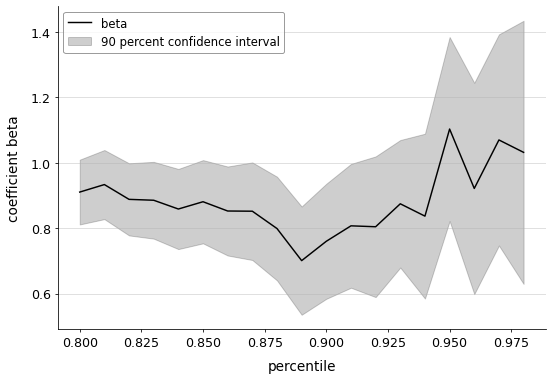

In [14]:
space=np.arange(0.8, 0.99, 0.01)
beta=np.zeros(shape=(19,5))

for index,topPercentile in enumerate(space):

    x=rentTehran[rentTehran['Fy']>=topPercentile]['LnRent']
    y=rentTehran[rentTehran['Fy']>=topPercentile]['LnHazineh']
    
    results = mt.reg(
    rentTehran[(rentTehran['Fy']>=topPercentile)
              ],                     # DataFrame
    'LnHazineh',                      # Dependent var (string)
    'LnRent',                      # Independent var(s) (string or list of strings)
    addcons=True
    ,awt_name='weight'    # Sample weights
    )
    
    
#     results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
    beta[index,0]=topPercentile
    beta[index,1]= results.beta['LnRent']
    
    se= results.se['LnRent']
    beta[index,4]=se
    
    beta[index,2]= (results.beta['LnRent']+ 1.6*se)
    beta[index,3]= (results.beta['LnRent']- 1.6*se)
    
    
fig=plt.figure(figsize=(9,6))

ax1=fig.add_subplot(1,1,1)

ax1.plot(beta[:,0], beta[:,1], color=(0,0,0,1),label="beta")
# hline=ax1.hlines(beta[:,1].mean(), space[0], space[-1] , linestyles='--', color=(0, 0.4 ,1, 0.9))

ax1.fill_between(beta[:,0], beta[:,2],beta[:,3], color=(0,0,0,0.192)
                ,linewidth= 1, label="90 percent confidence interval")

ax1.grid(axis='y',alpha=0.5)
# ax1.set_title(f'Figure 6:  Estimates of beta1 estimated using increasingly smaller number of top'
#               +'observations (household survey)')
ax1.set_xlabel('percentile', fontsize=14,labelpad=10)
ax1.set_ylabel('coefficient beta' , fontsize=14,labelpad=10)
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.legend(loc=2,edgecolor='gray',prop={'size':12}, handlelength=2)
plt.show()
# fig.savefig('figures/beta_Tehran.pdf',transparent=True,bbox_inches="tight")

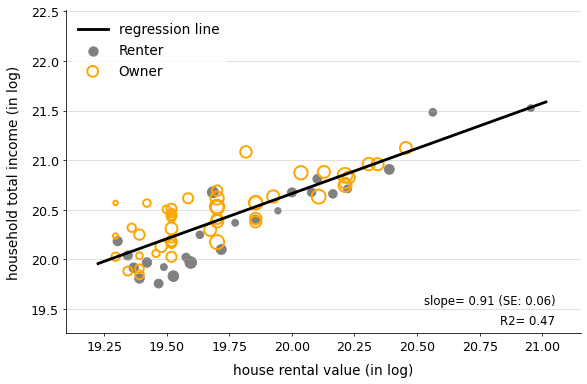

In [15]:
# groph: relation between household expenditure and their house values
topPercentile= 0.8

fig= plt.figure(figsize=(9.5,6))
ax1 = fig.add_subplot(1,1,1)

x=rentTehran[rentTehran['Fy']>=topPercentile]['LnRent']
y=rentTehran[rentTehran['Fy']>=topPercentile]['LnHazineh']


# results = mt.reg(
# rentTehran[(rentTehran['Fy']>=topPercentile)],                     # DataFrame
# 'LnHazineh',                      # Dependent var (string)
# 'LnRent',                      # Independent var(s) (string or list of strings)
# addcons=True
# ,awt_name='weight'    # Sample weights
# )

# Define the dependent variable
y = rentTehran.loc[(rentTehran['Fy']>=topPercentile), 'LnHazineh']

# Define the independent variable
X = rentTehran.loc[(rentTehran['Fy']>=topPercentile), 'LnRent']

# Define the weights
weights = rentTehran.loc[(rentTehran['Fy']>=topPercentile), 'weight']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the weighted OLS model
model = sm.WLS(y, X, weights=weights)

# Fit the model
results = model.fit()

# Get the slope, constant, and R-squared
slope = results.params['LnRent']
slope_se = results.bse['LnRent']
constant = results.params['const']
r_squared = results.rsquared

x_plot=np.linspace(x.min()-0.07, x.max()+0.06,3)
ax1.plot(x_plot, x_plot*results.params['LnRent']+results.params['const'],linewidth=2.9,label="regression line",color="black")

flag = rentTehran[rentTehran.Fy>topPercentile]

# flag['homeowner'] = flag['ownership'].isin([1, 2, 5, 6, 7]).astype(int)
flag.loc[flag['ownership'].isin([1, 2, 5, 6, 7]), 'homeowner'] = 1
flag.loc[flag['ownership'].isin([3, 4]), 'homeowner'] = 0


flag = flag.sort_values(by=['homeowner', 'LnRent'])
flag['group'] = pd.qcut(flag.groupby('homeowner').cumcount(), q=50, labels=False)

flag = flag.groupby(['homeowner', 'group']).agg({'LnRent': 'mean', 'LnHazineh': 'mean', 'weight': 'sum'}).reset_index()

ax1.scatter(flag[flag.homeowner.isin([0])].LnRent , flag[flag.homeowner.isin([0])].LnHazineh
           , flag[flag.homeowner.isin([0])].weight/100
           , color="gray"
           , label= "Renter")

ax1.scatter(flag[flag.homeowner.isin([1])].LnRent , flag[flag.homeowner.isin([1])].LnHazineh
           , flag[flag.homeowner.isin([1])].weight/100
           , facecolor= "none"
           , edgecolor="orange"
           , linewidth= 2
           , label= "Owner")


ax1.set_xlabel('house rental value (in log)', fontsize=14,labelpad=10)
ax1.set_ylabel('household total income (in log)', fontsize=14,labelpad=10)
ax1.grid(axis= 'y',alpha=0.5)
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(x.min()-0.2, x.max()+0.2)
ax1.set_ylim(y.min()-0.3, y.max()+0.1)
# ax1.set_ylim(19.,22.8)
ax1.legend(loc='upper left', edgecolor='white', prop={'size':14}, handlelength=2.2)


# Write the estimated slope and slope_se in the parenthesis on the graph
ax1.text(0.95, 0.08, f'slope= {slope:.2f} (SE: {slope_se:.2f})', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
ax1.text(0.95, 0.02, f'R2= {r_squared:.2f}', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.show()

# fig.savefig('../Figures/Python/beta_Tehran_fit_95_binnscatter.pdf',transparent=True,bbox_inches="tight")


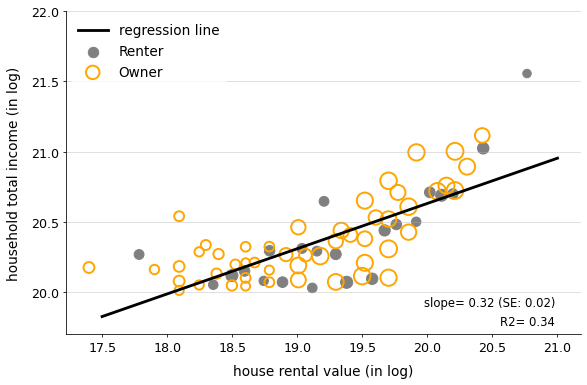

In [16]:
rentTehran.sort_values(by=["province","Daramad"],inplace=True)
rentTehran['FI'] = rentTehran.groupby('province')['weight'].transform(pd.Series.cumsum)

rentTehran['countProv']=rentTehran.groupby('province')['weight'].transform(pd.Series.sum)

rentTehran['FI'] = rentTehran.FI/rentTehran.countProv
# rentTehran= rent[rent.province.isin(province_set)]


# groph: relation between household expenditure and their house values
topPercentile= 0.7

fig= plt.figure(figsize=(9.5,6))
ax1 = fig.add_subplot(1,1,1)

x=rentTehran[rentTehran['FI']>=topPercentile]['LnRent']
y=rentTehran[rentTehran['FI']>=topPercentile]['LnHazineh']


# Define the dependent variable
y = rentTehran.loc[(rentTehran['FI']>=topPercentile), 'LnHazineh']

# Define the independent variable
X = rentTehran.loc[(rentTehran['FI']>=topPercentile), 'LnRent']

# Define the weights
weights = rentTehran.loc[(rentTehran['FI']>=topPercentile), 'weight']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the weighted OLS model
model = sm.WLS(y, X, weights=weights)

# Fit the model
results = model.fit()

# Get the slope, constant, and R-squared
slope = results.params['LnRent']
slope_se = results.bse['LnRent']
constant = results.params['const']
r_squared = results.rsquared

x_plot=np.linspace(17.5, 21,3)
ax1.plot(x_plot, x_plot*results.params['LnRent']+results.params['const'],linewidth=2.9,label="regression line",color="black")

flag = rentTehran[rentTehran.FI>topPercentile]

# flag['homeowner'] = flag['ownership'].isin([1, 2, 5, 6, 7]).astype(int)
flag.loc[flag['ownership'].isin([1, 2, 5, 6, 7]), 'homeowner'] = 1
flag.loc[flag['ownership'].isin([3, 4]), 'homeowner'] = 0


flag = flag.sort_values(by=['homeowner', 'LnRent'])
flag['group'] = pd.qcut(flag.groupby('homeowner').cumcount(), q=50, labels=False)

flag = flag.groupby(['homeowner', 'group']).agg({'LnRent': 'mean', 'LnHazineh': 'mean', 'weight': 'sum'}).reset_index()

ax1.scatter(flag[flag.homeowner.isin([0])].LnRent , flag[flag.homeowner.isin([0])].LnHazineh
           , flag[flag.homeowner.isin([0])].weight/100
           , color="gray"
           , label= "Renter")

ax1.scatter(flag[flag.homeowner.isin([1])].LnRent , flag[flag.homeowner.isin([1])].LnHazineh
           , flag[flag.homeowner.isin([1])].weight/100
           , facecolor= "none"
           , edgecolor="orange"
           , linewidth= 2
           , label= "Owner")


ax1.set_xlabel('house rental value (in log)', fontsize=14,labelpad=10)
ax1.set_ylabel('household total income (in log)', fontsize=14,labelpad=10)
ax1.grid(axis= 'y',alpha=0.5)
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# ax1.set_xlim(x.min()-0.2, x.max()+0.2)
# ax1.set_ylim(y.min()-0.3, y.max()+0.0)
ax1.set_ylim(19.7,22.0)
ax1.legend(loc='upper left', edgecolor='white', prop={'size':14}, handlelength=2.2)


# Write the estimated slope and slope_se in the parenthesis on the graph
ax1.text(0.95, 0.08, f'slope= {slope:.2f} (SE: {slope_se:.2f})', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
ax1.text(0.95, 0.02, f'R2= {r_squared:.2f}', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.show()

# fig.savefig('../Figures/Python/.pdf',transparent=True,bbox_inches="tight")


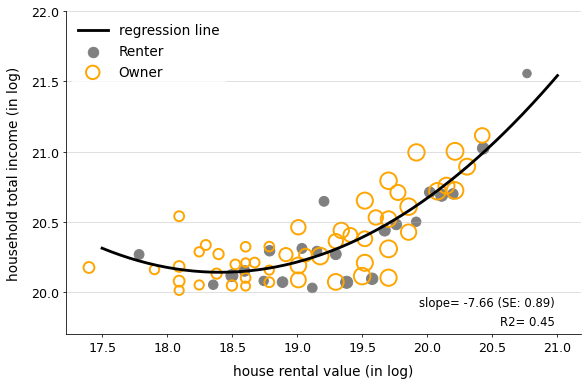

In [17]:
rentTehran.sort_values(by=["province","Daramad"],inplace=True)
rentTehran['FI'] = rentTehran.groupby('province')['weight'].transform(pd.Series.cumsum)

rentTehran['countProv']=rentTehran.groupby('province')['weight'].transform(pd.Series.sum)

rentTehran['FI'] = rentTehran.FI/rentTehran.countProv
# rentTehran= rent[rent.province.isin(province_set)]

rentTehran['LnRentSquared'] = rentTehran.LnRent**2
rentTehran['LnRent3'] = rentTehran.LnRent**3

# groph: relation between household expenditure and their house values
topPercentile= 0.7

fig= plt.figure(figsize=(9.5,6))
ax1 = fig.add_subplot(1,1,1)

x=rentTehran[rentTehran['FI']>=topPercentile]['LnRent']
y = rentTehran[rentTehran['FI']>=topPercentile]['LnHazineh']


# Define the dependent variable
y = rentTehran.loc[(rentTehran['FI']>=topPercentile), 'LnHazineh']

# Define the independent variable
X = rentTehran.loc[(rentTehran['FI']>=topPercentile), ['LnRent', 'LnRentSquared']]


# Define the weights
weights = rentTehran.loc[(rentTehran['FI']>=topPercentile), 'weight']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the weighted OLS model
model = sm.WLS(y, X, weights=weights)

# Fit the model
results = model.fit()

# Get the slope, constant, and R-squared
slope = results.params['LnRent']
slope_se = results.bse['LnRent']
constant = results.params['const']
r_squared = results.rsquared
slope_2 = results.params['LnRentSquared']

x_plot=np.linspace(17.5, 21, 200)
ax1.plot(x_plot, x_plot*x_plot*slope_2 + x_plot*results.params['LnRent']+results.params['const'],linewidth=2.9,label="regression line",color="black")

flag = rentTehran[rentTehran.FI>topPercentile]

# flag['homeowner'] = flag['ownership'].isin([1, 2, 5, 6, 7]).astype(int)
flag.loc[flag['ownership'].isin([1, 2, 5, 6, 7]), 'homeowner'] = 1
flag.loc[flag['ownership'].isin([3, 4]), 'homeowner'] = 0


flag = flag.sort_values(by=['homeowner', 'LnRent'])
flag['group'] = pd.qcut(flag.groupby('homeowner').cumcount(), q=50, labels=False)

flag = flag.groupby(['homeowner', 'group']).agg({'LnRent': 'mean', 'LnHazineh': 'mean', 'weight': 'sum'}).reset_index()

ax1.scatter(flag[flag.homeowner.isin([0])].LnRent , flag[flag.homeowner.isin([0])].LnHazineh
           , flag[flag.homeowner.isin([0])].weight/100
           , color="gray"
           , label= "Renter")

ax1.scatter(flag[flag.homeowner.isin([1])].LnRent , flag[flag.homeowner.isin([1])].LnHazineh
           , flag[flag.homeowner.isin([1])].weight/100
           , facecolor= "none"
           , edgecolor="orange"
           , linewidth= 2
           , label= "Owner")


ax1.set_xlabel('house rental value (in log)', fontsize=14,labelpad=10)
ax1.set_ylabel('household total income (in log)', fontsize=14,labelpad=10)
ax1.grid(axis= 'y',alpha=0.5)
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# ax1.set_xlim(x.min()-0.2, x.max()+0.2)
# ax1.set_ylim(y.min()-0.3, y.max()+0.0)
ax1.set_ylim(19.7,22.0)
ax1.legend(loc='upper left', edgecolor='white', prop={'size':14}, handlelength=2.2)


# Write the estimated slope and slope_se in the parenthesis on the graph
ax1.text(0.95, 0.08, f'slope= {slope:.2f} (SE: {slope_se:.2f})', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
ax1.text(0.95, 0.02, f'R2= {r_squared:.2f}', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.show()

# fig.savefig('../Figures/Python/.pdf',transparent=True,bbox_inches="tight")


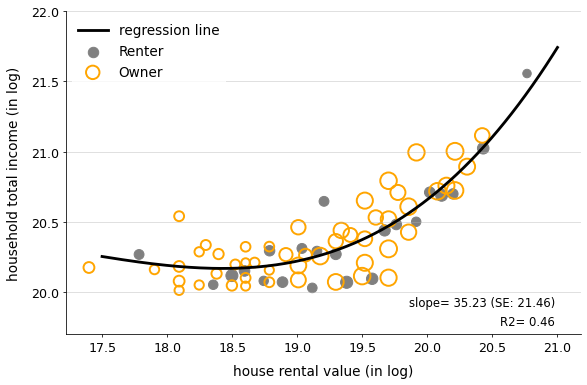

In [18]:
rentTehran.sort_values(by=["province","Daramad"],inplace=True)
rentTehran['FI'] = rentTehran.groupby('province')['weight'].transform(pd.Series.cumsum)

rentTehran['countProv']=rentTehran.groupby('province')['weight'].transform(pd.Series.sum)

rentTehran['FI'] = rentTehran.FI/rentTehran.countProv
# rentTehran= rent[rent.province.isin(province_set)]

rentTehran['LnRentSquared'] = rentTehran.LnRent**2
rentTehran['LnRent3'] = rentTehran.LnRent**3

# groph: relation between household expenditure and their house values
topPercentile= 0.7

fig= plt.figure(figsize=(9.5,6))
ax1 = fig.add_subplot(1,1,1)

x=rentTehran[rentTehran['FI']>=topPercentile]['LnRent']
y = rentTehran[rentTehran['FI']>=topPercentile]['LnHazineh']


# Define the dependent variable
y = rentTehran.loc[(rentTehran['FI']>=topPercentile), 'LnHazineh']

# Define the independent variable
X = rentTehran.loc[(rentTehran['FI']>=topPercentile), ['LnRent', 'LnRentSquared', 'LnRent3']]


# Define the weights
weights = rentTehran.loc[(rentTehran['FI']>=topPercentile), 'weight']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the weighted OLS model
model = sm.WLS(y, X, weights=weights)

# Fit the model
results = model.fit()

# Get the slope, constant, and R-squared
slope = results.params['LnRent']
slope_se = results.bse['LnRent']
constant = results.params['const']
r_squared = results.rsquared
slope_2 = results.params['LnRentSquared']
slope_3 = results.params['LnRent3']

x_plot=np.linspace(17.5, 21, 200)
ax1.plot(x_plot, x_plot**3*slope_3 + x_plot*x_plot*slope_2 + x_plot*results.params['LnRent']+results.params['const'],linewidth=2.9,label="regression line",color="black")

flag = rentTehran[rentTehran.FI>topPercentile]

# flag['homeowner'] = flag['ownership'].isin([1, 2, 5, 6, 7]).astype(int)
flag.loc[flag['ownership'].isin([1, 2, 5, 6, 7]), 'homeowner'] = 1
flag.loc[flag['ownership'].isin([3, 4]), 'homeowner'] = 0


flag = flag.sort_values(by=['homeowner', 'LnRent'])
flag['group'] = pd.qcut(flag.groupby('homeowner').cumcount(), q=50, labels=False)

flag = flag.groupby(['homeowner', 'group']).agg({'LnRent': 'mean', 'LnHazineh': 'mean', 'weight': 'sum'}).reset_index()

ax1.scatter(flag[flag.homeowner.isin([0])].LnRent , flag[flag.homeowner.isin([0])].LnHazineh
           , flag[flag.homeowner.isin([0])].weight/100
           , color="gray"
           , label= "Renter")

ax1.scatter(flag[flag.homeowner.isin([1])].LnRent , flag[flag.homeowner.isin([1])].LnHazineh
           , flag[flag.homeowner.isin([1])].weight/100
           , facecolor= "none"
           , edgecolor="orange"
           , linewidth= 2
           , label= "Owner")


ax1.set_xlabel('house rental value (in log)', fontsize=14,labelpad=10)
ax1.set_ylabel('household total income (in log)', fontsize=14,labelpad=10)
ax1.grid(axis= 'y',alpha=0.5)
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# ax1.set_xlim(x.min()-0.2, x.max()+0.2)
# ax1.set_ylim(y.min()-0.3, y.max()+0.0)
ax1.set_ylim(19.7,22.0)
ax1.legend(loc='upper left', edgecolor='white', prop={'size':14}, handlelength=2.2)


# Write the estimated slope and slope_se in the parenthesis on the graph
ax1.text(0.95, 0.08, f'slope= {slope:.2f} (SE: {slope_se:.2f})', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
ax1.text(0.95, 0.02, f'R2= {r_squared:.2f}', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.show()

# fig.savefig('../Figures/Python/.pdf',transparent=True,bbox_inches="tight")


## Estimating beta for all provinces

In [19]:
# betaProv = np.zeros(shape=(30,4))
# betaProv = pd.DataFrame(rentedShare,
#                            columns=["province","beta","tedad","code"])

# for index,prov in enumerate(provinceCodeEng):
#     koofteProvince= provinceCodeEng[prov]
#     rentTehran= rent[rent.province==koofteProvince]

#     # sort by rent and define Fy based on it:
#     rentTehran= rentTehran.sort_values(by= ['rent'])
#     rentTehran.reset_index(inplace=True, drop=True)

#     rentTehran['Fy']= rentTehran.weight.cumsum() 
#     rentTehran['Fy']= rentTehran.Fy/ rentTehran.weight.sum()

#     results = mt.reg(
#          rentTehran[rentTehran['Fy']>=0.9],                     # DataFrame
#          'LnHazineh',                      # Dependent var (string)
#          'LnRent',                      # Independent var(s) (string or list of strings)
#          addcons=True
#          ,awt_name='weight'    # Sample weights
#     )
#     results
    
#     beta=results.beta['LnRent']
#     size= len(rentTehran[rentTehran['Fy']>=0.9])
    
#     betaProv.loc[index,"province"]= prov
#     betaProv.loc[index,"beta"]= beta
#     betaProv.loc[index,"tedad"]= size

#     betaProv.loc[index,"code"]= koofteProvince

    
    
# #     print("beta=",round(beta,2),"sample size=",size,"province=",prov)


# Conclosion: theta

In [93]:
beta=pd.DataFrame(data=beta,columns=['percentile','beta','beta_lower','beta_upper','beta_se'])
alpha=pd.DataFrame(data=alpha,columns=['percentile','alpha','alpha_lower','alpha_upper','alpha_se'])

theta_hat=pd.merge(beta,alpha,on=['percentile'])
theta_hat['theta_hat']=theta_hat.alpha/ theta_hat.beta

In [95]:
for i in np.arange(0,len(theta_hat)):
    a=np.random.normal(loc=1/theta_hat.loc[i,'alpha'],scale=theta_hat.loc[i,'alpha_se'],size=1000000)

    b=np.random.normal(loc=theta_hat.loc[i,'beta'],scale=theta_hat.loc[i,'beta_se'],size=1000000)
    d=1/(a*b)
    d=pd.DataFrame(d)
    
    theta_hat.loc[i,'thetahat_lower']= d.quantile(q=0.05)[0]
    theta_hat.loc[i,'thetahat_upper']= d.quantile(q=0.95)[0]   
    
    theta_hat.loc[i,'thetahat__']= d.mean()[0]

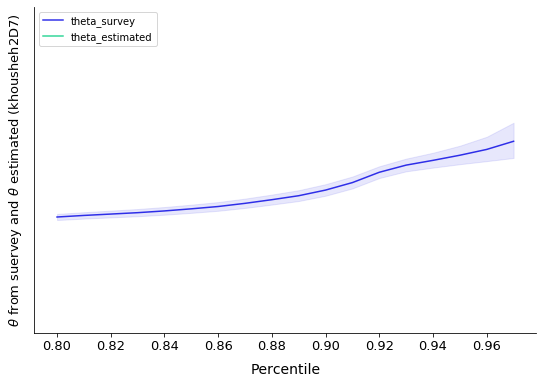

In [97]:
fig=plt.figure(figsize=(9,6))

ax1=fig.add_subplot(1,1,1)

ax1.plot(theta[0:18,0], theta[0:18,1], color=(0.1,0.1,0.9,0.9)
        ,label='theta_survey')
# hline=ax1.hlines(theta[:,1].mean(), space[0], space[-1] , linestyles='--', color=(0, 0.4 ,1, 0.9))

ax1.fill_between(theta[0:18,0], theta[0:18,2],theta[0:18,3], color=(0.1,0.1,0.9,0.1)
                ,linewidth= 1)


ax1.plot('percentile', 'theta_hat',
        data=theta_hat[theta_hat.percentile<=0.98],
        color=(0,0.8,0.5,0.8),
        label='theta_estimated')

ax1.fill_between('percentile', 'thetahat_lower', 'thetahat_upper'
                 ,data=theta_hat[theta_hat.percentile<=0.98]
                 ,color=(0,0.8,0.5,0.15)
                 ,linewidth= 1)

ax1.grid(axis='y',alpha=0.5)
# ax1.set_title(f'Figure 2:  Pareto tail index estimates for household expenditure per capita in Tehran')
ax1.set_xlabel('Percentile', fontsize=14, labelpad=10)
ax1.set_ylabel(r'$\theta$ from suervey and $\theta$ estimated (khousheh2D7)' , fontsize=13, labelpad=10)
ax1.legend(loc='best')
ax1.set_ylim(1.5,5)
ax1.set_xticks(np.arange(0.8,0.98,0.02))
ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc='upper left')
plt.show()
#fig.savefig('figures/khousheh/theta_thetahat_khousheh2D7.pdf',transparent=True)

# All Year 89-98

In [4]:
year_list = [
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
    "2019",
]

In [5]:
"""
 define a function that calculated the Gini coefficient (also weighted)
"""

def gini(x, w=None):
    """ The rest of the code requires numpy arrays. """
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        """ Force float dtype to avoid overflows """ 
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        """ The above formula, with all weights equal to 1 simplifies to: """
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    
"""
    CPI index of whole contry from 1376 to 1399
"""
cpi= pd.DataFrame(data={'year':np.arange(76,99),
                       'cpi':[5.298 , 6.258 , 7.516 , 8.463 , 9.427 , 10.915,
                              12.624, 14.544, 16.048, 17.955, 21.265, 26.66 ,
                              29.527, 33.188, 40.321, 52.635, 70.916, 81.948,
                              91.714, 100.0 , 109.6 , 137.3 , 185.3          ]})
cpi["cpi"] = cpi.cpi/100

## HIES

In [6]:
""" Household Income and Expenditure Data """

expenditureTotal = pd.read_csv(
    r"../Data/HIES/HIES(89-98)AggregateNEW.csv")

expenditureTotal['province']= expenditureTotal.household.astype(str).str[1:3]

""" merge the CPI to HIES to compute the real icnome and expenditure """
expenditureTotal = pd.merge(expenditureTotal,cpi,on=["year"],how="left")
expenditureTotal["realDaramad"] = expenditureTotal.Daramad/expenditureTotal.cpi
expenditureTotal["realGHazineh"] = expenditureTotal.GHazineh/expenditureTotal.cpi
expenditureTotal.drop(columns=["cpi"],inplace=True)
 
# print(expenditureTotal.info(memory_usage="deep"))


In [7]:
""" welfare criterion considered for measuring inequality indices """

expenditureTotal['hazinehPerCapita'] = expenditureTotal.realDaramad #/ expenditureTotal.tedad
# expenditureTotal["weight"] = expenditureTotal.weight * expenditureTotal.tedad

np.random.seed(1234)  # Set the seed number for replicability

expenditureTotal['rand'] = np.random.rand(len(expenditureTotal))

expenditureTotal.sort_values(by=["year","province","hazinehPerCapita","rand"],inplace=True)
# expenditureTotal['Fy'] = expenditureTotal.groupby(['year','province'])['weight'].apply(lambda x: x.cumsum() / x.sum())
expenditureTotal['Fy'] = expenditureTotal.groupby(['year','province'])['weight'].apply(lambda x: x.cumsum() / x.sum()).reset_index(level=['year', 'province'], drop=True)

expenditureTotal.sort_values(by=["year","province","rent","rand"], inplace=True)
expenditureTotal['FRent'] = expenditureTotal.groupby(['year','province'])['weight'].apply(lambda x: x.cumsum() / x.sum()).reset_index(level=['year', 'province'], drop=True)



In [8]:
"""
    'wm' is a function that calculate weighted average of the HIES data
"""
wm = lambda x: np.ma.average(np.ma.masked_array(
                             x.to_numpy(dtype="float64", na_value=np.nan),x.isna()), 
                             weights=expenditureTotal.loc[x.index, "weight"])

"""
    summary statistics of the HIES data set
"""
HIES_summary_Iran = expenditureTotal.loc[:,:].groupby(
    by=["year"]).agg({
    "weight":"count"
    }).reset_index().rename(columns={"weight":"Iran_HH_number"})

HIES_summary = expenditureTotal.loc[(expenditureTotal['province']=="23"),:].groupby(
    by=["year"]).agg({
    "weight":"count","tedad":wm,"realDaramad":wm,"realGHazineh":wm
    }).reset_index().rename(columns={"weight":"Tehran_HH_number"})

HIES_summary = pd.merge(HIES_summary_Iran,HIES_summary,on=["year"])
HIES_summary["realDaramad"] = HIES_summary.realDaramad/1e7
HIES_summary["realGHazineh"] = HIES_summary.realGHazineh/1e7

HIES_summary

,year,Iran_HH_number,Tehran_HH_number,tedad,realDaramad,realGHazineh
0,89,38285,2101,3.418,38.666,38.653
1,90,38513,1950,3.396,39.919,41.132
2,91,38192,1938,3.409,41.122,40.670
3,92,38316,1951,3.318,39.304,38.152
4,93,38275,2014,3.288,39.507,39.311
5,94,38252,2016,3.280,39.888,40.412
6,95,38146,2019,3.269,43.176,40.832
7,96,37962,1948,3.329,45.916,43.107
8,97,38960,2020,3.246,45.471,42.052
9,98,38328,1948,3.233,42.808,38.928


In [9]:
summary_statistics = HIES_summary.round(decimals=1)
summary_statistics.to_clipboard(index=False,header=None)

HIES_summary.columns = ["Year","Number (Iran)", "Number (Tehran)", "Household size", "Real income", "Real Expenditure"]
HIES_summary["Year"] = year_list
print(HIES_summary.to_latex(index=False, float_format="{:0.1f}".format,column_format='cccccc'))

\begin{tabular}{cccccc}
\toprule
Year & Number (Iran) & Number (Tehran) & Household size & Real income & Real Expenditure \\
\midrule
2010 & 38285 & 2101 & 3.4 & 38.7 & 38.7 \\
2011 & 38513 & 1950 & 3.4 & 39.9 & 41.1 \\
2012 & 38192 & 1938 & 3.4 & 41.1 & 40.7 \\
2013 & 38316 & 1951 & 3.3 & 39.3 & 38.2 \\
2014 & 38275 & 2014 & 3.3 & 39.5 & 39.3 \\
2015 & 38252 & 2016 & 3.3 & 39.9 & 40.4 \\
2016 & 38146 & 2019 & 3.3 & 43.2 & 40.8 \\
2017 & 37962 & 1948 & 3.3 & 45.9 & 43.1 \\
2018 & 38960 & 2020 & 3.2 & 45.5 & 42.1 \\
2019 & 38328 & 1948 & 3.2 & 42.8 & 38.9 \\
\bottomrule
\end{tabular}



## Real-estate transaction data

In [10]:
provinceCodeEng= { "Markazi":"00" 
              , "Gilan":"01" 
              , "Mazandaran":"02" 
              , "Azerbaijan East":"03" 
              , "Azerbaijan West":"04" 
              , "Kermanshah":"05" 
              , "Khuzestan":"06" 
              , "Fars":"07" 
              , "Kerman":"08" 
              , "Khorasan Razavi":"09" 
              , "Isfahan":"10" 
              , "Sistan and Balochestan":"11" 
              , "Kordestan":"12" 
              , "Hamedan":"13" 
              , "Chaharmahaal and Bakhtiari":"14" 
              , "Lorestan":"15" 
              , "Ilam":"16" 
              , "Kohgiluyeh and Boyer-Ahmad":"17" 
              , "Bushehr":"18" 
              , "Zanjan":"19" 
              , "Semnan":"20" 
              , "Yazd":"21"
              , "Hormozgan":"22" 
              , "Tehran":"23" 
              , "Ardabil":"24" 
              , "qom":"25" 
              , "qazvin":"26" 
              , "Golestan":"27" 
              , "Khorasan North":"28" 
              , "Khorasan South":"29" 
              , "Alborz":"30" 
                            }
"""
    'province_set' specifies the provinces that the methology 
    is implemented on them to re-estimate thier top income earners
    income distribution using the house price data
"""
# province_set=["23","09","10","25","30"]
province_set=["23"]#,"01","03","30","02","26"]


In [11]:
""" house data """

data = pd.read_stata("../Data/Real estate Transaction/IranHousePrice.dta") 
data.shape


data["provinceCode"] =data.prov.map(provinceCode)

# data = data.loc[(data.provinceCode=="23"),:]

data = data.loc[(data.usingType == "مسکونی"),:]


""" 
    make year column
    year that want to calculate the pareto dist paramater 
"""
data=data[['id','prov','city','dateShamsi','totalPrice','price','area',
               'age','district','provinceCode']]

# data.drop_duplicates(inplace=True) # deleting repeated rows in data(duplicated id)

data['totalPrice']=data['totalPrice']/10000
data['price']= data['price']/10000
data=data[(data['area']<1000)]
data=data[data['age']<70]

# data = data.loc[(data['provinceCode'].isin(province_set)),:]

data['year']= data.dateShamsi.astype(str).str[0:4]
data['year'] = pd.to_numeric(data['year'])

data['month']= data.dateShamsi.astype(str).str[5:7]
data['month']= pd.to_numeric(data['month'])


# data["areaXprice"] = (data.area*data.price)
# data= data.loc[((data.areaXprice) >= 0.99*data.totalPrice)]
# data= data.loc[((data.areaXprice) <= 1.01*data.totalPrice)]
# data.drop(inplace=True, columns=["areaXprice"])
    

""" 
    sorting data based of house prices in each porv
    to calculate empirical cumulative distribution function of prices in each prov
"""
data.sort_values(['prov', 'totalPrice'],inplace=True)
data.reset_index(inplace=True,drop=True)

""" Making new variables """
data['LnPrice']= np.log(data['totalPrice']) # not that it take natural logarithm
data=data.loc[data.provinceCode.notna(),:]

# data = data[["provinceCode","city","month","year","totalPrice","price"
#              ,"weight","LnPrice","age","area","district"]]

# print(data.info(memory_usage="deep"))
data.head()

,id,prov,city,dateShamsi,totalPrice,price,area,age,district,provinceCode,year,month,LnPrice
0,13074908,آذربایجان شرقی,شبستر,1394/11/10,0.100,0.001,90.370,4.000,NaN,03,1394,11,-2.303
1,13036117,آذربایجان شرقی,شبستر,1394/11/04,0.100,0.001,88.540,3.000,NaN,03,1394,11,-2.303
2,11534190,آذربایجان شرقی,شبستر,1394/02/19,0.100,0.001,115.470,2.000,NaN,03,1394,2,-2.303
3,12542743,آذربایجان شرقی,تبريز,1394/08/06,0.100,0.001,112.840,1.000,NaN,03,1394,8,-2.303
4,13195412,آذربایجان شرقی,تبريز,1394/11/27,0.100,0.001,114.250,1.000,NaN,03,1394,11,-2.303


In [12]:
data["provNew"] = np.nan
data.loc[(data.provinceCode.isin(['23'])), "provNew"] = "01"
data.loc[(data.provinceCode.isin(['30','07','01','03','26','02','25','09'])), "provNew"] = "02"
data.loc[( data["provNew"].isna()) , "provNew"] = "03"


province_set = ["01", "02", "03"]

houseIndex = pd.DataFrame([])
for flag,prov in enumerate(province_set):
    houseIndexProv = data.loc[(data.provNew==prov),:].groupby(['year','month']).agg(
        {"totalPrice":"mean"}).reset_index()
    houseIndexProv["shakhes"] = houseIndexProv.totalPrice / houseIndexProv.loc[
                                                    (houseIndexProv.year==1398)
                                                    &(houseIndexProv.month==1),"totalPrice"].values[0]
    houseIndexProv["provNew"] = prov
    houseIndex = pd.concat([houseIndex,houseIndexProv],axis=0)
    houseIndexProv = []
    

""" houseIndex """
data = pd.merge(data,houseIndex[["year","month","shakhes","provNew"]],
                how="left",on=["provNew","year","month"])

data["realTotalPrice"] = data.totalPrice / data.shakhes
data["realPrice"] = data.price / data.shakhes
data.drop(inplace=True, columns=["shakhes"])


""" drop outlier based on price per squre meter of houses """
# data=data[(data['realPrice']>0.05) & (data['realPrice']<100)]
# data=data[(data['realTotalPrice'] >= 15)]
# data= data.loc[(data.realTotalPrice<40000),:]

' drop outlier based on price per squre meter of houses '

In [13]:
# Data cleaning by comparing similar houses

data['areaCat']= pd.cut(x=data['area'],bins=[0,50,80,100,130,200],right=False)
data['ageCat']= pd.cut(x=data['age'],bins=[0,3,7,13,20,40,100],right=False)

disaggregate_categories = ["year","month","district","areaCat","ageCat"]

# data['unique_id'] = data.groupby(disaggregate_categories).cumcount() + 1
# data['leave_one_out_mean'] = data.groupby('unique_id')['totalPrice'].transform(lambda x: x.dropna().mean())
# data['leave_one_out_std'] = data.groupby('unique_id')['totalPrice'].transform(lambda x: x.dropna().std())


data["totalPrice2"] = data.totalPrice
groupAll = data.loc[(data.city=="تهران")&(data.totalPrice.notna()),:].groupby(
    by=disaggregate_categories).agg({"totalPrice":"mean", "age":"count","totalPrice2":"std"}).reset_index().rename(
    columns={"age":"NSimiliar","totalPrice2":"stdSimilar"})

groupAll["city"] = "تهران"

data.drop(columns=["NSimilar","totalPriceSimilar"],inplace=True,errors="ignore")
data = pd.merge(data, groupAll
                      ,on=["city","year","month","district","areaCat","ageCat"]
                      ,suffixes=["","Similar"]
                      ,how="left")


data.loc[:,"outlier"] = 0
data.loc[(data.totalPrice < data.totalPriceSimilar-3*data.stdSimilar), "outlier"] = 1
data.loc[(data.totalPrice > data.totalPriceSimilar+3*data.stdSimilar), "outlier"] = 1

data.drop(columns=["areaCat","ageCat","stdSimilar","NSimilar"],inplace=True,errors="ignore")
# data = data.loc[(data.outlier != 1),:]
# data

del groupAll

In [14]:
house_price_summary = data.loc[(data['provinceCode']=="23"),:].groupby(by=["year"]).agg({
    "id":"count","totalPrice":"mean","area":"mean","age":"mean","price":"mean"
    }).reset_index().rename(columns={"id":"number"})

summary_statistics = house_price_summary.round(decimals=1)
summary_statistics.to_clipboard(index=False,header=None,)

house_price_summary

,year,number,totalPrice,area,age,price
0,1389,146681,146.629,82.603,11.155,1.630
1,1390,206246,165.620,82.140,10.428,1.829
2,1391,240096,285.129,80.837,8.983,3.307
3,1392,148845,342.811,79.879,7.224,3.919
4,1393,205756,382.766,80.568,7.075,4.362
5,1394,187542,340.867,81.820,7.103,4.324
6,1395,183254,395.487,85.637,7.807,4.577
7,1396,200446,475.262,87.599,8.697,5.273
8,1397,155207,712.680,85.167,9.200,7.858
9,1398,100761,1190.125,85.268,9.360,13.130


In [15]:
# house_price_summary = house_price_summary.round(decimals=1)
house_price_summary.columns = ["Year","Number","Total price","Area","Age","Price per square meter"]

house_price_summary = house_price_summary.loc[(house_price_summary.Year<1399),:]
house_price_summary["Year"] = year_list
print(house_price_summary.to_latex(index=False, float_format="{:0.1f}".format, column_format='cccccc'))

\begin{tabular}{cccccc}
\toprule
Year & Number & Total price & Area & Age & Price per square meter \\
\midrule
2010 & 146681 & 146.6 & 82.6 & 11.2 & 1.6 \\
2011 & 206246 & 165.6 & 82.1 & 10.4 & 1.8 \\
2012 & 240096 & 285.1 & 80.8 & 9.0 & 3.3 \\
2013 & 148845 & 342.8 & 79.9 & 7.2 & 3.9 \\
2014 & 205756 & 382.8 & 80.6 & 7.1 & 4.4 \\
2015 & 187542 & 340.9 & 81.8 & 7.1 & 4.3 \\
2016 & 183254 & 395.5 & 85.6 & 7.8 & 4.6 \\
2017 & 200446 & 475.3 & 87.6 & 8.7 & 5.3 \\
2018 & 155207 & 712.7 & 85.2 & 9.2 & 7.9 \\
2019 & 100761 & 1190.1 & 85.3 & 9.4 & 13.1 \\
\bottomrule
\end{tabular}



### weight transaction data

In [16]:
# # Replace 'ageCat' values based on conditions
# data.loc[data['age'].between(0, 5), 'ageCat'] = 1
# data.loc[data['age'].between(6, 15), 'ageCat'] = 2
# data.loc[data['age'].between(16, 25), 'ageCat'] = 3
# data.loc[data['age'] >= 26, 'ageCat'] = 4

# # Replace 'areaCat' values based on conditions
# data.loc[data['area'].between(0, 50), 'areaCat'] = 1
# data.loc[data['area'].between(51, 75), 'areaCat'] = 2
# data.loc[data['area'].between(76, 100), 'areaCat'] = 3
# data.loc[data['area'] >= 101, 'areaCat'] = 4

# # transaction data share of each category
# data['observation_count'] = data.groupby(['year', 'provinceCode', 'ageCat', 'areaCat'])['id'].transform('count')
# data['agg_count'] = data.groupby(['year', 'provinceCode'])['id'].transform('count')

# data['observation_count'] = data['observation_count'] / data['agg_count'] * 100
# data.drop(columns=['agg_count'], inplace=True)

# # import housing weights calculated from census data
# weight = pd.read_csv(r"../Data/NPHC/housing_weights.csv")

# data = data.merge(weight, on=["ageCat", "areaCat"])

# data['weight'] = data.weight / data.observation_count

data['weight'] = 1


In [17]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint

# Objective function: Sum of squared residuals
def objective_function(params, x, y):
    intercept, slope = params
    predictions = intercept + slope * x
    residuals = y - predictions
    return np.sum(residuals**2)


# print(f"Optimized intercept: {optimized_intercept}, Optimized slope: {optimized_slope}")

In [18]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint
from sklearn.utils import resample

# Assuming x, y, constraint_value are defined as before

# Function to fit the model and return parameters
def fit_model(x, y, constraint_value):
    def objective_function(params, x, y):
        intercept, slope = params
        predictions = intercept + slope * x
        residuals = y - predictions
        return np.sum(residuals**2)
    
    constraints = LinearConstraint([1, 0], -np.inf, constraint_value)
    initial_guess = [0, 0]
    result = minimize(objective_function, initial_guess, args=(x, y), constraints=constraints)
    return result.x  # Return optimized parameters



def pareto_mle(weights, data):
    # Ensure weights and data are numpy arrays
    weights = np.array(weights)
    data = np.array(data)
    
    # Calculate x_m as the minimum value in the data
    x_m = np.min(data)
    
    # Calculate the MLE for alpha
    numerator = np.sum(weights)
    denominator = np.sum(weights * (np.log(data) - np.log(x_m)))
    alpha_mle = numerator / denominator
    
    return alpha_mle, x_m

# alpha_mle, x_m = pareto_mle(weights, data)



In [19]:
T = expenditureTotal.loc[(expenditureTotal.year==95)&(expenditureTotal.province=="23"),:]
T = T.loc[(T.FRent>=0.9),:]

TopRent = T.rent.min()
Price_to_Mortgage_Ratio = price_rent_ratio.loc[(price_rent_ratio.year==(1300+95)),"ratio_mean"].values[0]
TopPrice= TopRent * Price_to_Mortgage_Ratio * (100/3) / 10000000

T['rent'] = T.rent * Price_to_Mortgage_Ratio * (100/3) / 10000000


###############################
# input parameters value
###############################
year= 1395          # year that want to calculate the pareto dist paramater

#############
# defining columns to draw graph
new=data[(data['provinceCode'].isin(["23"])) & (data['year']==year)].copy()

new.sort_values(by=["provinceCode","totalPrice"],inplace=True)
new['Gy'] = new.groupby('provinceCode')['weight'].transform(pd.Series.cumsum)

new['countProv']=new.groupby('provinceCode')['weight'].transform(pd.Series.sum)

new['Gy'] = new.Gy/new.countProv


new.head()


# ---------------------------------------------------------
topPercentile= 0.9
# --------------------------------------------------------------
# replicating Figure 3 in the paper with Iran house prices data
    
# N=new[new.Gy>topPercentile]
N = new[new.totalPrice > TopPrice]
N.sort_values('totalPrice',inplace=True)
N.reset_index(drop=True, inplace=True)

N['G2y']=(N.index+1) / (N['totalPrice'].count())  
N.drop(N.tail(1).index,inplace=True)
N['Xvariable']= -np.log(1-N['G2y'])     
# dropping nan, inf from data to avoid error in regression
N.replace(np.inf , np.nan,inplace=True)
N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

x=N['Xvariable']
y=N['LnPrice'] #- np.log(N.totalPrice.min())

# results = sm.OLS(y,x,missing='drop').fit()
# slope = results.params[0]
# slope_se = results.bse[0]
# r_squared = results.rsquared

constraint_value = np.log(N.totalPrice.min())  # The maximum value for the intercept
optimized_params = fit_model(x, y, constraint_value)
intercept, slope = optimized_params

# Bootstrapping for standard errors
n_bootstraps = 100
bootstrapped_params = np.array([fit_model(*resample(x, y), constraint_value) for _ in range(n_bootstraps)])
constant_se, slope_se = bootstrapped_params.std(axis=0)

# Calculate R-squared
optimized_params = fit_model(x, y, constraint_value)
predictions = optimized_params[0] + optimized_params[1] * x
ss_res = np.sum((y - predictions) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - ss_res / ss_tot




fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,1,1)

x,y=econtools.binscatter(x,y,n=40)
x=x['Xvariable']
y=y['LnPrice']
ax1.scatter(x,y)

x_plot=np.linspace(x.min(), x.max(),3)
ax1.plot(x_plot, x_plot*slope + intercept ,linewidth=1,color='black')

# ax1.set_title('Figure 3: Pareto quantile plot for house prices')
ax1.set_xlabel('$-\log(1-G_2(y))$', fontsize=16,labelpad=10)
ax1.set_ylabel('log house price', fontsize=16,labelpad=10)
# ax1.set_xticks(np.arange(3,13,1))
# ax1.tick_params(labelsize=13)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(axis='y',alpha=0.5)
# ax1.legend(loc='center left')
# Write the estimated slope and slope_se in the parenthesis on the graph
ax1.text(0.95, 0.08, f'slope= 1/alpha= {slope:.2f} (SE: {slope_se:.2f})', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
ax1.text(0.95, 0.02, f'R2= {r_squared:.2f}', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)
plt.show()
# fig.savefig('../Figures/Python/alpha_Tehran_fit_95.pdf',transparent=True,bbox_inches="tight")


# ---------------------------------------------------------
# ---------------------------------------------------------
# ---------------------------------------------------------
# ---------------------------------------------------------

mianeAlpha, loc = pareto_mle(N.weight, N.totalPrice)

print(mianeAlpha) 

alpha90= mianeAlpha
tau90= loc

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)

housePrice = np.linspace(tau90, N.totalPrice.max(), num=1000)
G2_hat = alpha90 * (tau90**alpha90) / (housePrice**(alpha90+1))
# ax1.plot(housePrice, G2_hat, label='fitted Pareto by ML', linewidth=2)

alpha90= 1/slope
print(alpha90)
tau90= loc
G2_hat = alpha90 * (tau90**alpha90) / (housePrice**(alpha90+1))
# ax1.plot(housePrice, G2_hat, label='fitted Pareto by OLS', linewidth=2)

ax1.hist(T.rent, bins=7, density=True, label='Distribution in Household Survey', alpha=0.5, color='gray')

ax1.hist(N.totalPrice, bins=2000, density=True, label='Distribution in Real Estate Data', alpha=0.5)

ax1.set_xlabel('house price (in million Toman)', fontsize=16, labelpad=10)
ax1.set_ylabel('probability density', fontsize=16, labelpad=10)
ax1.tick_params(labelsize=13)
ax1.set_xlim(300, 3000)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc='best', edgecolor='gray', prop={'size':14}, handlelength=2.2)
ax1.grid(alpha=0.5)
plt.show()
# fig.savefig('../Figures/Python/house_tail_distribution_fit_pdf_1395.pdf',transparent=True,bbox_inches="tight")


NameError: name 'price_rent_ratio' is not defined

## Real estate rent

In [ ]:
interest_rate= pd.DataFrame(data={'year':np.arange(1389,1399),
                       'rate':[14,15,15,15,22,20,15,15,15,18]})

interest_rate["rate"] = ((interest_rate.rate/100 + 1) ** (1/12) - 1)
interest_rate

,year,rate
0,1389,0.011
1,1390,0.012
2,1391,0.012
3,1392,0.012
4,1393,0.017
5,1394,0.015
6,1395,0.012
7,1396,0.012
8,1397,0.012
9,1398,0.014


In [ ]:
HouseRentTotal=pd.read_stata(f"../Data/Real estate Rent/IranHouseRent.dta")
HouseRentTotal = HouseRentTotal.loc[(HouseRentTotal.prov=="تهران")]

HouseRentTotal['year']= HouseRentTotal.dateShamsi.astype(str).str[0:4]
HouseRentTotal['year'] = pd.to_numeric(HouseRentTotal['year'])

HouseRentTotal['month']= HouseRentTotal.dateShamsi.astype(str).str[5:7]
HouseRentTotal['month']= pd.to_numeric(HouseRentTotal['month'])



HouseRentTotal = pd.merge(HouseRentTotal, interest_rate,
                         on=["year"])

HouseRentTotal["FullMortgage"] = (HouseRentTotal.ejareh/HouseRentTotal.rate + HouseRentTotal.rahn)/ 10**7
# HouseRentTotal["FullMortgage"] = (HouseRentTotal.ejareh*100/3 + HouseRentTotal.rahn)/ 10**7


""" drop outlier based on house area """
HouseRentTotal = HouseRentTotal.loc[(HouseRentTotal.area>15)&(HouseRentTotal.area<1000)]

""" drop outlier based on house age """
HouseRentTotal = HouseRentTotal.loc[(HouseRentTotal.age<100)]

HouseRentTotal = HouseRentTotal[["district","area","FullMortgage","age","year","rahn","month","city"]]

HouseRentTotal.head()

,district,area,FullMortgage,age,year,rahn,month,city
0,7.000,75.000,34.108,7.000,1389,250000000.000,4,تهران
1,14.000,90.000,31.325,13.000,1389,40000000.000,2,تهران
2,1.000,181.000,87.422,12.000,1389,100000000.000,4,تجريش
3,1.000,181.000,78.313,12.000,1389,100000000.000,4,تجريش
4,1.000,181.000,62.091,12.000,1389,620000000.000,4,تجريش


In [ ]:

# HouseRentTotal['areaCat']= pd.cut(x=HouseRentTotal['area'],bins=[0,50,80,100,130,200],right=False)
# HouseRentTotal['ageCat']= pd.cut(x=HouseRentTotal['age'],bins=[0,3,7,13,20,40,100],right=False)

# disaggregate_categories = ["year","month","district","areaCat","ageCat"]

# HouseRentTotal["FullMortgage2"] = HouseRentTotal.FullMortgage
# groupAll = HouseRentTotal.loc[(HouseRentTotal.FullMortgage.notna())&(HouseRentTotal.city=="تهران"),:].groupby(
#     by=disaggregate_categories).agg({"FullMortgage":"mean", "rahn":"count","FullMortgage2":"std"}).reset_index().rename(
#     columns={"rahn":"NSimiliar","FullMortgage2":"stdSimilar"})
# groupAll["city"] = "تهران"
# # HousePrice.drop(columns=["totalPriceMean"],inplace=True, errors="ignore")
# HouseRentTotal = pd.merge(HouseRentTotal, groupAll
#                       ,on=["year","month","district","areaCat","ageCat","city"]
#                       ,suffixes=["","Similar"]
#                       ,how="left")


# HouseRentTotal.loc[:,"outlier"] = 0
# HouseRentTotal.loc[(HouseRentTotal.FullMortgage < HouseRentTotal.FullMortgageSimilar-3*HouseRentTotal.stdSimilar), "outlier"] = 1
# HouseRentTotal.loc[(HouseRentTotal.FullMortgage > HouseRentTotal.FullMortgageSimilar+3*HouseRentTotal.stdSimilar), "outlier"] = 1
# HouseRentTotal=HouseRentTotal.loc[(HouseRentTotal.outlier!=1),:]

# HouseRentTotal.drop(columns=["stdSimilar","NSimiliar","FullMortgage2","FullMortgageSimilar"],inplace=True)

# HouseRentTotal.shape

# del groupAll

In [ ]:
# HouseRentTotal["weight"] = 1
# HouseRentTotal.sort_values(by=["year","FullMortgage"],inplace=True)
# HouseRentTotal['Fy'] = HouseRentTotal.groupby('year')['weight'].transform(pd.Series.cumsum)
# HouseRentTotal['countYear']=HouseRentTotal.groupby('year')['weight'].transform(pd.Series.sum)
# HouseRentTotal['Fy'] = HouseRentTotal.Fy/HouseRentTotal.countYear
# HouseRentTotal.drop(columns=["countYear"], inplace=True)

# HouseRentTotal = HouseRentTotal.loc[(HouseRentTotal.Fy <= 0.998),:]

In [ ]:
# summary statistics 

house_rent_summary = HouseRentTotal.groupby(by=["year"]).agg(
    {"FullMortgage":"mean","area":"mean","age":"mean"}).reset_index().rename(columns={"outlier":"number"})

summary_statistics= house_rent_summary.round(decimals=1)
summary_statistics.to_clipboard(index=False,header=None,)

house_rent_summary

,year,FullMortgage,area,age
0,1389,35451.409,86.078,13.146
1,1390,121.641,82.501,13.059
2,1391,111.589,79.840,12.384
3,1392,123.212,78.638,10.678
4,1393,109.580,77.794,10.740
5,1394,92.235,76.145,10.816
6,1395,155.972,75.148,11.880
7,1396,147.763,76.495,12.332
8,1397,2550.404,79.890,11.783
9,1398,226.374,79.788,13.031


In [ ]:
# house_price_summary = house_price_summary.round(decimals=1)
house_rent_summary.columns = ["Year","Avg. security deposit","Avg. area","Avg. age"]

# house_rent_summary["Year"] = year_list
print(house_rent_summary.to_latex(index=False, float_format="{:0.1f}".format, column_format='cccccc'))

\begin{tabular}{cccccc}
\toprule
Year & Avg. security deposit & Avg. area & Avg. age \\
\midrule
1389 & 35451.4 & 86.1 & 13.1 \\
1390 & 121.6 & 82.5 & 13.1 \\
1391 & 111.6 & 79.8 & 12.4 \\
1392 & 123.2 & 78.6 & 10.7 \\
1393 & 109.6 & 77.8 & 10.7 \\
1394 & 92.2 & 76.1 & 10.8 \\
1395 & 156.0 & 75.1 & 11.9 \\
1396 & 147.8 & 76.5 & 12.3 \\
1397 & 2550.4 & 79.9 & 11.8 \\
1398 & 226.4 & 79.8 & 13.0 \\
\bottomrule
\end{tabular}



## Estimating the relationship between house price and rent

In [ ]:

""" Initialize the Output dataframes """
price_rent_ratio = np.zeros(shape=(10,1))
price_rent_ratio = pd.DataFrame(price_rent_ratio, columns=["year"])
price_rent_ratio.year = np.arange(1389,1399)


for Year in np.arange(1389,1399):
    """
        Finding the average price of similar houses
        in the Tehran city
        Similar houses are in the same category of:
        1. area
        2. age
        3. district
    """
    HousePrice = data.loc[(data.year==Year)]

    HousePrice = HousePrice.loc[(HousePrice.city=="تهران"),:]


    HousePrice['areaCat']= pd.cut(x=HousePrice['area'],bins=[0,50,80,100,130],right=False)
    HousePrice['ageCat']= pd.cut(x=HousePrice['age'],bins=[0,3,7,13,20],right=False)

    disaggregate_categories = ["ageCat","areaCat","district","month"]

    house_price_mean_category = HousePrice.groupby(
        by=disaggregate_categories).agg({
            "totalPrice":"mean","price":"count"
            }).reset_index().rename(columns={"price":"price_count"})
    house_price_mean_category = house_price_mean_category.loc[
        (house_price_mean_category.totalPrice.notna()),:]

    house_price_mean_category = house_price_mean_category.loc[(house_price_mean_category.price_count>=10),:]

    house_price_mean_category.head()


    """
       Running the previous algorithm for the house rent data set of the same year
        Similar houses are in the same category of:
        1. area
        2. age
        3. district
    """
    HouseRent= HouseRentTotal.loc[(HouseRentTotal.year == Year),:]

    HouseRent['areaCat']= pd.cut(x=HouseRent['area'],bins=[0,50,80,100,130],right=False)
    HouseRent['ageCat']= pd.cut(x=HouseRent['age'],bins=[0,3,7,13,20],right=False)


    rent_mean_category = HouseRent.groupby(
        by=disaggregate_categories).agg({
            "FullMortgage":"mean","rahn":"count"
            }).reset_index().rename(columns={"rahn":"rent_count"})
    rent_mean_category = rent_mean_category.loc[(rent_mean_category.FullMortgage.notna()),:]

    rent_mean_category = rent_mean_category.loc[(rent_mean_category.rent_count>=10),:]

    rent_mean_category.head()


    """
        Merging the house rent and price average in the same categories
    """

    rent_price_combine = pd.merge(house_price_mean_category,rent_mean_category,
            on=disaggregate_categories,
            how="inner")

    rent_price_combine["RATIO"] = rent_price_combine.totalPrice / rent_price_combine.FullMortgage
    
    rent_price_combine["ration_cross_number"] = rent_price_combine.RATIO * rent_price_combine.price_count
#     price_rent_ratio.loc[(price_rent_ratio.year==Year),"ratio_mean"] = rent_price_combine.RATIO.mean()
    price_rent_ratio.loc[(price_rent_ratio.year==Year),"ratio_mean"] = rent_price_combine.ration_cross_number.sum() / rent_price_combine.price_count.sum()

    price_rent_ratio.loc[(price_rent_ratio.year==Year),"ratio_std"] = rent_price_combine.RATIO.std()
    price_rent_ratio.loc[(price_rent_ratio.year==Year),"ratio_median"] = rent_price_combine.RATIO.median()
    
    price_rent_ratio.loc[(price_rent_ratio.year==Year),"ratio_count"] = rent_price_combine.RATIO.count()
    price_rent_ratio.loc[(price_rent_ratio.year==Year),"price_count_mean"] = rent_price_combine.price_count.median()
    price_rent_ratio.loc[(price_rent_ratio.year==Year),"rent_count_mean"] = rent_price_combine.rent_count.median()

    # rent_price_combine.describe()
    
"""
    cleaning the auxilary data from the memory
"""
# rent_price_combine = []
del rent_mean_category
del house_price_mean_category
del HouseRent
del HousePrice
# HouseRentTotal = []

In [ ]:
summary_statistics = price_rent_ratio.round(decimals=2)
summary_statistics.ratio_count.astype(np.int64)

summary_statistics["ratio_count"] = np.floor(summary_statistics.ratio_count)
summary_statistics["ratio_count"] = summary_statistics.ratio_count.round(decimals=0)
summary_statistics.to_clipboard(index=False,header=None,)

price_rent_ratio

,year,ratio_mean,ratio_std,ratio_median,ratio_count,price_count_mean,rent_count_mean
0,1389,3.151,3.005,3.086,386.000,64.000,14.000
1,1390,2.975,1.506,3.000,983.000,69.000,21.000
2,1391,4.756,7.254,3.398,1702.000,47.000,26.000
3,1392,4.893,9.944,3.879,1772.000,28.500,32.000
4,1393,5.538,9.685,4.530,2146.000,36.000,34.000
5,1394,4.609,5.602,4.053,1592.000,33.000,32.000
6,1395,3.297,0.926,3.329,2200.000,35.000,32.000
7,1396,3.122,0.970,3.174,1963.000,38.000,28.000
8,1397,4.076,1.174,4.060,1332.000,29.000,27.000
9,1398,5.504,1.233,5.399,1035.000,21.000,31.000


In [ ]:
# price_rent_ratio.ratio_count = price_rent_ratio.ratio_count.astype(np.int64)
# price_rent_ratio.price_count_mean = price_rent_ratio.price_count_mean.astype(np.int64)
# price_rent_ratio.rent_count_mean = price_rent_ratio.rent_count_mean.astype(np.int64)

# price_rent_ratio.year = year_list
# print(price_rent_ratio.to_latex(index=False, float_format="{:0.1f}".format, column_format='ccccccc'))

# Main: Fixed Threshold

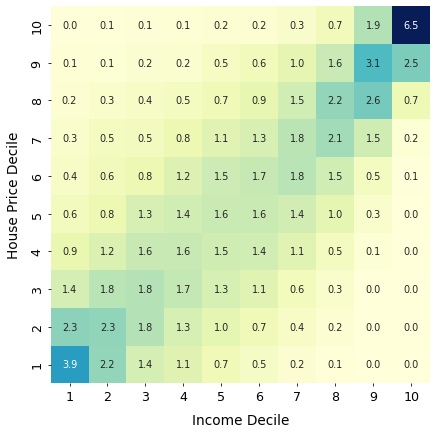

In [ ]:
# joint distribution of income and house price deciles
import seaborn as sns

# df = expenditureTotal.loc[(expenditureTotal.province=="23")&(expenditureTotal.Fy>0.8),:]
df = expenditureTotal.loc[(expenditureTotal.province=="23"),:]

# Create income deciles and house price deciles
df['income_decile'] = pd.qcut(df['Fy'], 10, labels=False) + 1
df['house_price_decile'] = pd.qcut(df['FRent'], 10, labels=False) + 1

# Create a pivot table
pivot_table = df.groupby(['income_decile', 'house_price_decile']).size().unstack().fillna(0)

# Convert counts to percentages
pivot_table = pivot_table.divide(pivot_table.sum().sum()) * 100

# Plot the pivot table as a heatmap
fig= plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# plt.figure(figsize=(10, 8))

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
# plt.title('Percentage of observations in each income-house price-decile')
plt.xlabel('Income Decile', fontsize=14,labelpad=10)
plt.ylabel('House Price Decile', fontsize=14,labelpad=10)
ax.tick_params(labelsize=13)

# Reverse the order of the y-axis
ax.invert_yaxis()
plt.show()

# fig.savefig('../Figures/Python/income_houseprice_decile_year96_Tehran.pdf',transparent=True,bbox_inches="tight")

del df

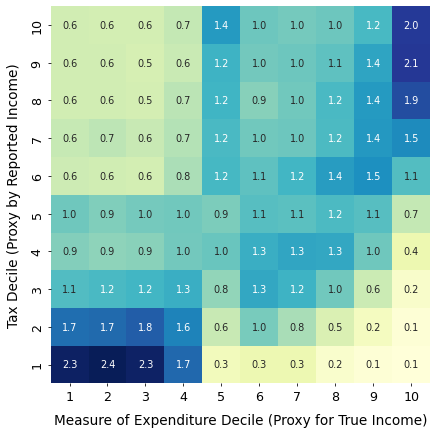

In [ ]:
# joint tax and income distribution
df = pd.read_stata(r"C:/Users/ehsa7798/Desktop/Refah/df_cleaned_refah.dta")

# Create income deciles and house price deciles
df['income_decile'] = pd.qcut(df['Fy'], 10, labels=False) + 1
df['house_price_decile'] = pd.qcut(df['FRent'], 10, labels=False) + 1

# Create a pivot table
pivot_table = df.groupby(['income_decile', 'house_price_decile']).size().unstack().fillna(0)

# Convert counts to percentages
pivot_table = pivot_table.divide(pivot_table.sum().sum()) * 100

# Plot the pivot table as a heatmap
fig= plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# plt.figure(figsize=(10, 8))

sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
# plt.title('Percentage of observations in each income-house price-decile')
plt.xlabel('Measure of Expenditure Decile (Proxy for True Income)', fontsize=14,labelpad=10)
plt.ylabel('Tax Decile (Proxy by Reported Income)', fontsize=14,labelpad=10)
ax.tick_params(labelsize=13)

# Reverse the order of the y-axis
ax.invert_yaxis()
plt.show()

# fig.savefig('../Figures/Python/income_tax_joint_dist_1402.pdf',transparent=True,bbox_inches="tight")



In [ ]:

# for i in np.arange(1,11):
#     halfDecile = df.loc[(df.Fy<=0.1*i + 0.01*(i==10)) &(df.Fy>0.1*(i-1)), :]
#     muHalfDecile = np.sum(halfDecile.daramad) / np.sum(df.daramad) * 100
#     print(muHalfDecile)

# print("\n now for hazineh \n \n")
# for i in np.arange(1,11):
#     halfDecile = df.loc[(df.FRent<=0.1*i + 0.01*(i==10)) &(df.FRent>0.1*(i-1)), :]
#     muHalfDecile = np.sum(halfDecile.cardpermonth_1402) / np.sum(df.cardpermonth_1402) * 100
#     print(muHalfDecile)


In [ ]:

# """ Initialize the Output dataframes """
# result = np.zeros(shape=(10,1))
# result = pd.DataFrame(result, columns=["year"])
# result.year = np.arange(1389,1399)

# Iran = result.copy()
# alpha_beta_Tehran = result.copy()
# tau_x0 = result.copy()

# share = result.copy()
# shareTen= result.copy()
# shareFive= result.copy()
# shareOne= result.copy()
# shareTenIran= result.copy()
# shareFiveIran= result.copy()
# shareOneIran= result.copy()

# """ Define new vaiables: """ 
# expenditureTotal['hazinehPerCapita'] = expenditureTotal.realDaramad #/ expenditureTotal.tedad
# # expenditureTotal["weight"] = expenditureTotal.weight * expenditureTotal.tedad

# figuresFolder = "Daramad"
# expenditureTotal['LnHazineh']= np.log(expenditureTotal.hazinehPerCapita)

# # expenditureTotal['rent']= expenditureTotal['rent'] * 12
# expenditureTotal['LnRent']= np.log(expenditureTotal.rent) #/expenditureTotal.area)


# """--------------------------------------------------------------------"""
# """ LET'S GO """

# different_threshold_of_top_HIES = [95] #[100,90,95]  

# for tauThreshold in different_threshold_of_top_HIES: 
    
#     for year in np.arange(89,99):

#         """
#             Estimating theta from survey    
#         """
#         expenditure = expenditureTotal.loc[(expenditureTotal.year==year),:]

#         expenditure = expenditure.loc[(expenditure.hazinehPerCapita.notna())
#                                      &(expenditure.weight.notna()),:]

#         """ calculating empirical cumulative density function """
#         # expenditure.sort_values(by=["province","hazinehPerCapita"],inplace=True)
#         # expenditure['Fy'] = expenditure.groupby('province')['weight'].apply(lambda x: x.cumsum() / x.sum())
                        
#         # expenditure.sort_values(by=["province","rent"],inplace=True)
#         # expenditure['FRent'] = expenditure.groupby('province')['weight'].apply(lambda x: x.cumsum() / x.sum())
        
#         """-------------------------------------------------"""
#         PTotal = 0
#         sTotal = 0
#         landaTotal = 0
#         Sample = pd.DataFrame([])

#         for flag, prov in enumerate(province_set):
#             provName = next(key for key, value in provinceCodeEng.items() if value == prov)

#             Tehran= expenditure[expenditure.province == prov]
#             Tehran= Tehran.sort_values(by= ['hazinehPerCapita'])
#             Tehran['Fy']= Tehran.weight.cumsum() 
#             Tehran['Fy']= Tehran.Fy / Tehran.weight.sum()
            
            
#             """-----------------------------------------
#                              Theta    
#             -----------------------------------------"""
#             '''
#                 calculating theta from data ##
#                 theta: top income pareto tail index
#                 for different top share of data
#             '''
#             # space=np.arange(0.8, 0.99, 0.01)
#             # theta=np.zeros(shape=(19,6))

#             # if Tehran.shape[0]==0:
#             #     break

#             # for index,topPercentile in enumerate(space):

#             #     T= Tehran[Tehran.Fy> topPercentile]

#             #     if T.shape[0]==0:
#             #         break

#             #     # new estimation method with Maximum Likelihood ------------------------------
#             #     # Fit Pareto distribution to the variable
#             #     loc = T.hazinehPerCapita.min()
#             #     n = T.shape[0]
#             #     theta_T = (n) / (T.LnHazineh.sum() - n*np.log(loc))
#             #     # ---------------------------------------------------------------------------

#             #     T= T.sort_values(by= ['hazinehPerCapita'])
#             #     T.reset_index(inplace=True, drop=True)
#             #     T['F2y']=T.weight.cumsum() 
#             #     T['F2y']=T.F2y / T.weight.sum()
                
#             #     T.drop(T.tail(1).index,inplace=True)
#             #     T['Xvariable']= -np.log(1-T['F2y'])        

#             #     """-------------------------------------------------"""
#             #     results = mt.reg(
#             #     T,                     # DataFrame
#             #     'LnHazineh',           # Dependent var (string)
#             #     'Xvariable',           # Independent var(s) (string or list of strings)
#             #     addcons=True,
#             #     awt_name='weight'     # Sample weights
#             #     )

#             #     """ save the coefficient to the data frame """
#             #     theta[index,0]=topPercentile
#             #     theta[index,1]= theta_T #1/results.beta['Xvariable']
#             #     se=results.se['Xvariable']
#             #     theta[index,4]= se

#             #     theta[index,2]= 1/(1/theta_T + 1.96*se) #1/(results.beta['Xvariable']+ 1.96*se)
#             #     theta[index,3]= 1/(1/theta_T - 1.96*se) #1/(results.beta['Xvariable']- 1.96*se) 
                
#             #     theta[index,5]= T.hazinehPerCapita.min()/1e7 


#             """-----------------------------------------
#                 calculating alpha from house price data    
#             -----------------------------------------"""
#             new = data[(data['provinceCode']==prov) & (data['year']==(1300+year) )]

#             """ define new variables """
#             new.sort_values(by=["provinceCode","totalPrice"],inplace=True)
#             new['Gy'] = new.groupby('provinceCode')['weight'].apply(lambda x: x.cumsum() / x.sum()).reset_index(level=['provinceCode'], drop=True)

#             """ 
#                 calculating alpha from data for different top share of data
#                 alpha: top house price data pareto tail index
#             """
#             # space=np.arange(0.8, 0.99, 0.01)
#             # alpha=np.zeros(shape=(19,5))

#             # for index,topPercentile in enumerate(space):
                
#             #     Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy>(topPercentile-0.02)) & (Tehran.Fy<(topPercentile+0.02)), "rent"].mean()
            
#             #     Price_to_Mortgage_Ratio = price_rent_ratio.loc[(price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]
#             #     TopRentmean= Price_to_Mortgage_Ratio * Rent_Top_Incomes_HIES * (100/3) / 10000000 
            
#             #     # N=new[new.Gy>topPercentile]
#             #     N = new[new.totalPrice >= TopRentmean]
#             #     N.sort_values('totalPrice',inplace=True)
#             #     N.reset_index(drop=True, inplace=True)

#             #     # new estimation method with Maximum Likelihood ------------------------------
#             #     # Fit Pareto distribution to the variable
#             #     loc = N.totalPrice.min()
#             #     n = N.shape[0]
#             #     alpha_N = (n) / (N.LnPrice.sum() - n*np.log(loc))
#             #     # ---------------------------------------------------------------------------

#             #     N['G2y']=(N.index+1) / (N['totalPrice'].count())  
#             #     N.drop(N.tail(1).index,inplace=True)
#             #     N['Xvariable']= -np.log(1-N['G2y'])     
#             #     """ dropping nan, inf from data to avoid error in regression """
#             #     N.replace(np.inf , np.nan,inplace=True)
#             #     N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

#             #     x=N['Xvariable']
#             #     y=N['LnPrice']

#             #     results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
#             #     alpha[index,0]=topPercentile
#             #     alpha[index,1]= alpha_N #1/results.params[1]
#             #     se=results.bse[1]
#             #     alpha[index,4]=se
#             #     alpha[index,2]= 1/(1/alpha_N + 1.6*se) #1/(results.params[1]+ 1.6*se)
#             #     alpha[index,3]= 1/(1/alpha_N - 1.6*se) #1/(results.params[1]- 1.6*se)



#             """-----------------------------------------
#                     calculating beta from survey    
#             -----------------------------------------"""

#             # space=np.arange(0.8, 0.99, 0.01)
#             # beta=np.zeros(shape=(19,5))

#             # for index,topPercentile in enumerate(space):
                
#             #     Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy>(topPercentile-0.02)) & (Tehran.Fy<(topPercentile+0.02)), "rent"].mean()
                
#             #     top_rent = Tehran[Tehran['rent']>=Rent_Top_Incomes_HIES]
                
#             #     ##  droping 5 highest rent in data 
#             #     # top_rent.sort_values(by=["rent"], inplace=True)
#             #     # top_rent.reset_index(inplace=True)
#             #     # top_rent = top_rent.iloc[0:-6, :]
                
#             #     x=top_rent['LnRent']
#             #     y=top_rent['LnHazineh']

#             #     results = mt.reg(
#             #     top_rent,                 # DataFrame
#             #     'LnHazineh',                 # Dependent var (string)
#             #     'LnRent',                    # Independent var(s) (string or list of strings)
#             #     addcons=True
#             #     ,awt_name='weight'           # Sample weights
#             #     )

#             #     #results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
#             #     beta[index,0]=topPercentile
#             #     beta[index,1]= results.beta['LnRent']

#             #     se= results.se['LnRent']
#             #     beta[index,4]=se

#             #     beta[index,2]= (results.beta['LnRent']+ 1.96*se)
#             #     beta[index,3]= (results.beta['LnRent']- 1.96*se)


#             """-----------------------------------------
#                             theta     
#             -----------------------------------------"""
            
#             # theta=pd.DataFrame(data=theta,columns=['percentile','theta','theta_lower','theta_upper','theta_se','tau'])

#             # beta=pd.DataFrame(data=beta,columns=['percentile','beta','beta_lower','beta_upper','beta_se'])
#             # beta["tau"] = theta["tau"]

#             # alpha=pd.DataFrame(data=alpha,columns= ['percentile','alpha','alpha_lower','alpha_upper','alpha_se'])
#             # alpha["tau"] = theta["tau"]
            
#             # theta_hat=pd.merge(beta,alpha,on=['percentile'])
#             # theta_hat['theta_hat']=theta_hat.alpha/ theta_hat.beta
#             # theta_hat["tau"] = theta["tau"]



#             # -----------------------------------------
#             """
#                 alpha from new approach: tau -> rent -> house price -> alpha
#             """
#             tau = tauThreshold * 1e7 #* cpi.loc[(cpi.year==year), : ].cpi.values[0]
            
#             lambda_tau = 1 - Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
            
#             # Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy> 1-lambda_tau-0.02)&(Tehran.Fy< 1-lambda_tau+0.02), "rent"].mean()
            
#             Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.hazinehPerCapita>(0.9*tau)) & (Tehran.hazinehPerCapita<(1.1*tau) ), "rent"].mean()
            
#             Price_to_Mortgage_Ratio = price_rent_ratio.loc[(price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]

#             TopRentmean= Price_to_Mortgage_Ratio * Rent_Top_Incomes_HIES * (100/3) / 10000000 

#             N = new[new.totalPrice>TopRentmean]
#             # N["totalPrice"] = N.totalPrice / N.area
#             # N["LnPrice"] = np.log(N.totalPrice)
#             N.sort_values('totalPrice',inplace=True)
#             N.reset_index(drop=True, inplace=True)
            
#             N['G2y'] = N.weight.cumsum()
#             N['G2y'] = N.G2y / N.weight.sum()

#             """ dropping nan, inf from data to avoid error in regression """
            
#             N['Xvariable']= -np.log(1-N['G2y'])     
#             # N.drop(N.tail(1).index,inplace=True)
            
#             N.replace(np.inf , np.nan,inplace=True)
#             N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

#             # new estimation method with Maximum Likelihood ------------------------------
#             # Fit Pareto distribution to the variable
#             loc = N.totalPrice.min()
#             n = N.shape[0]
#             mianeAlpha = (n) / (N.LnPrice.sum() - n*np.log(loc))
#             # print(mianeAlpha) 

#             # ----------------------------------------------------------------------------
#             # N['G2y']=(N.index+1) / (N['totalPrice'].count())  
            

#             x=N['Xvariable']
#             y=N['LnPrice']

#             results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()

#             mianeAlpha2 = 1/results.params[1]
#             # print(mianeAlpha2)
#             seAlpha=results.bse[1]

#             #* estimate the share of top house residents in the survey
#             lambda_house_survey = 1 - Tehran.loc[(Tehran.rent>=Rent_Top_Incomes_HIES),:].FRent.min()
#             result.loc[(result.year==(1300+year)) , "lambdaHouseSurv"+prov] = lambda_house_survey *100


#             """ first Approch theta estimated """
#             # miane = theta_hat.loc[(theta_hat.percentile>=0.82)
#             #          &(theta_hat.percentile<=0.92),"theta_hat"].quantile(q=0.5)
            
#             # estimate beta by the median of 0.8 to 0.95
#             # mianeBeta =  theta_hat.loc[(theta_hat.percentile>=0.80)
#             #          &(theta_hat.percentile<=0.95),"beta"].quantile(q=0.5)
#             top_rent = Tehran.loc[(Tehran['FRent']>=0.70) & (Tehran['FRent']<=1)]
#             #top_rent = Tehran.loc[Tehran['hazinehPerCapita']>=tau,:]


#             x=top_rent['LnRent']
#             y=top_rent['LnHazineh']

#             results = mt.reg(
#             top_rent,                    # DataFrame
#             'LnHazineh',                 # Dependent var (string)
#             'LnRent',                    # Independent var(s) (string or list of strings)
#             addcons=True
#             ,awt_name='weight'           # Sample weights
#             )

#             mianeBeta = results.beta['LnRent']
#             seBeta = results.se['LnRent']
            
#             """ calculating confidence interval for theta second approach """
#             # seBeta = theta_hat.loc[(theta_hat.percentile>=0.80)
#             #          &(theta_hat.percentile<=0.95),"beta_se"].quantile(q=0.5)

#             a=np.random.normal(loc=1/mianeAlpha,scale=seAlpha,size=1000000)

#             b=np.random.normal(loc= mianeBeta, scale=seBeta, size=1000000)
#             d=1/(a*b)
#             d=pd.DataFrame(d)

#             theta_hat2_lower = d.quantile(q=0.05)[0]
#             theta_hat2_upper = d.quantile(q=0.95)[0]   



#             """
#                 Graph Alpha and Beta together
#             """
#             # fig=plt.figure(figsize=(9,6))

#             # ax1=fig.add_subplot(1,1,1)
#             # ax1.plot("tau","alpha",data =alpha ,label='alpha',color=(0.0,0.4,0.5))
#             # ax1.fill_between(alpha.tau, alpha.alpha_lower,alpha.alpha_upper,label='%90 CI',color=(0.0,0.4,0.5) )

#             # ax1.plot("tau","beta",data=beta, color=(0,0,0,1),label="beta")

#             # ax1.fill_between(beta.tau, beta.beta_lower,beta.beta_upper, color=(0,0,0,0.192)
#             #                 ,linewidth= 1, label="%90 CI")

#             # ax1.grid(axis='y',alpha=0.5)
#             # ax1.set_xlabel('threshold tau', fontsize=14,labelpad=10)
#             # ax1.set_ylabel('coefficient alpha and beta' , fontsize=14,labelpad=10)
#             # ax1.tick_params(labelsize=13)
#             # # ax1.set_xticks(np.arange(0.8,0.99,0.02))
#             # ax1.spines['right'].set_visible(False)
#             # ax1.spines['top'].set_visible(False)
#             # plt.legend(loc=2,edgecolor='gray',prop={'size':12}, handlelength=2)
#             # plt.show()
#             # fig.savefig(f'../Figures/AlphaBetaTheta/alphabeta{year}.pdf',transparent=True,bbox_inches="tight")


#             # -----------------------------------------------------------------
#             # calculate upper and lower bound of theta
            
#             # theta_hat['theta_hat']=theta_hat.alpha/ mianeBeta
#             # for i in np.arange(0,len(theta_hat)):
#             #     a=np.random.normal(loc=1/theta_hat.loc[i,'alpha'],scale=theta_hat.loc[i,'alpha_se'],size=1000000)

#             #     b=np.random.normal(loc=mianeBeta,scale=seBeta,size=1000000)
#             #     d=1/(a*b)
#             #     d=pd.DataFrame(d)

#             #     theta_hat.loc[i,'thetahat_lower']= d.quantile(q=0.05)[0]
#             #     theta_hat.loc[i,'thetahat_upper']= d.quantile(q=0.95)[0]   

#             #     """ thetahat__ : mean e oon thetahat e k ba bootstrap sakhtim!! """
#             #     theta_hat.loc[i,'thetahat__']= d.mean()[0]

#             # """
#             #     Graph Theta and Theta_hat together
#             # """    
#             # fig=plt.figure(figsize=(9,6))
#             # ax1=fig.add_subplot(1,1,1)
#             # ax1.plot("tau", "theta"
#             #         , data = theta
#             #         , color=(0.1,0.1,0.9,0.9)
#             #         ,label='theta survey')
#             # ax1.fill_between('tau', 'theta_lower', 'theta_upper'
#             #                 , data = theta
#             #                 ,color=(0.1,0.1,0.9,0.1)
#             #                 ,linewidth= 1)

#             # ax1.plot('tau', 'theta_hat',
#             #          dashes = [4,2],
#             #         data=theta_hat,
#             #         color=(0,0.8,0.5,0.8),
#             #         label='theta estimated')
#             # ax1.fill_between('tau', 'thetahat_lower', 'thetahat_upper'
#             #                  ,data=theta_hat
#             #                  ,color=(0,0.8,0.5,0.15)
#             #                  ,linewidth= 1)
#             # ax1.grid(axis='y',alpha=0.5)
#             # ax1.set_ylabel(rf'coefficient theta',
#             #                fontsize=15, labelpad=10)
#             # ax1.set_xlabel('threshold tau', fontsize=15, labelpad=10)
#             # plt.legend(loc='best',edgecolor='gray',prop={'size':12}, handlelength=2.2)
#             # # ax1.set_ylim(1,7)
#             # # ax1.set_xlim(80,105)
#             # # ax1.set_title(provName+f" {1300+year}")
#             # ax1.tick_params(labelsize=13)
#             # ax1.spines['right'].set_visible(False)
#             # ax1.spines['top'].set_visible(False)
#             # plt.show()
#             # fig.savefig(f'../Figures/AlphaBetaTheta/theta_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")
            
#             """-----------------------------------------
#                     gini for the province    
#             -----------------------------------------"""
#             """ inputs: """
#             thetaEstimated = mianeAlpha / mianeBeta
            
#             """ filling the 'alpha_beta_Tehran' output for report """
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"alpha"] = mianeAlpha
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"beta"] = mianeBeta
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat"] = thetaEstimated
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat_lower"] = theta_hat2_lower 
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat_upper"] = theta_hat2_upper
            
#             # theta["percentile"] = np.round(theta.percentile,decimals=2)
#             # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta"] = theta.loc[(theta.percentile==0.94),"theta"].values[0]
#             # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_lower"] = theta.loc[(theta.percentile==0.94),"theta_lower"].values[0]
#             # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_upper"] = theta.loc[(theta.percentile==0.94),"theta_upper"].values[0]
           
#             """ Filling the 'tau_x0' ouptut data frame """
#             tau_x0.loc[tau_x0.year==(1300+year),"tau"] = tau / 1e7
#             tau_x0.loc[tau_x0.year==(1300+year),"tau_real"] = (tau / 1e7) * cpi.loc[(cpi.year==year), : ].cpi.values[0]
#             tau_x0.loc[tau_x0.year==(1300+year),"R0"]  = Rent_Top_Incomes_HIES * (100/3) / 1e7
#             tau_x0.loc[tau_x0.year==(1300+year),"x0"]  = TopRentmean

#             #* estimate true share of top house residents
#             T = Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),:]
#             T= T.sort_values(by= ['rent'])
#             T['Gy'] = T.weight.cumsum()
#             T['Gy'] = T.Gy / T.weight.sum()
            
#             results = mt.reg( T.loc[(T.Gy>0.95),:], 'Gy', 'rent', addcons=True)
#             g1Tau = results.beta['rent']
#             del T
            
#             g2Tau= mianeAlpha / Rent_Top_Incomes_HIES
#             lambda_house = g1Tau / (g1Tau+g2Tau)
#             result.loc[(result.year==(1300+year)) , "lambdaHouse"+prov] = lambda_house *100


#             """ estimating landa """
#             # T = Tehran.loc[(Tehran.hazinehPerCapita< tau), :]
#             # T= T.sort_values(by= ['hazinehPerCapita'])
#             # T['Fy']= T.Fy / T.weight.sum()
#             # T['Fy']= T.weight.cumsum() 
#             # results = mt.reg(
#             #     T.loc[(T.Fy>0.95),:],      # DataFrame
#             #     'Fy',                      # Dependent var (string)
#             #     'hazinehPerCapita',        # Independent var(s) (string or list of strings)
#             #     addcons=True
#             #     )

#             # f1Tau= results.beta['hazinehPerCapita']
#             # f2Tau= thetaEstimated / tau
#             # landa= f1Tau / (f1Tau+f2Tau)
#             # result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landa *100

#             # landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
#             # result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100



#             """ estimating s """
#             # lowIncome=Tehran.loc[(Tehran.hazinehPerCapita < tau ), :]
#             # topIncome=Tehran.loc[(Tehran.hazinehPerCapita > tau ), :]

#             # mu1 = np.average(lowIncome.hazinehPerCapita, weights=lowIncome.weight)
#             # mu2 = (thetaEstimated/(thetaEstimated-1)) * tau

#             # mu2Survey = np.average(topIncome.hazinehPerCapita, weights=topIncome.weight)

#             # mu = landa*mu2 + (1-landa)*mu1

#             # s = landa*mu2/mu
#             # result.loc[(result.year==(1300+year)) , "s"+prov]             = s *100

#             #* estimate mean income using survey
#             muSurvey = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)


#             """ s calculated from survey """
#             # muSurvey = landaSurvey*mu2Survey + (1-landaSurvey)*mu1
#             # sSurvey = landaSurvey*mu2Survey/muSurvey
#             # result.loc[(result.year==(1300+year)) , "sSurvey"+prov]       = sSurvey *100

#             # GiniSurvey = gini(Tehran.hazinehPerCapita, w=Tehran.weight)
#             # result.loc[(result.year==(1300+year)) , "GiniSurvey"+prov]    = GiniSurvey *100

#             # Gini1 = gini(lowIncome.hazinehPerCapita, w=lowIncome.weight)
#             # Gini2 = 1 / (2*thetaEstimated-1)

#             # Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
#             # result.loc[(result.year==(1300+year)) , "Gini"+prov+f"_{tauThreshold}"]          = Gini *100

#             # samples = (np.random.pareto(thetaEstimated, 100000) + 1) * tau
           
#             """-----------------------------------------
#                     Gini for the whole country    
#             -----------------------------------------"""
#             # if flag == 0:
#             #     GiniIranSurvey =  gini(expenditure.loc[(expenditure.hazinehPerCapita.notna()),:].hazinehPerCapita,
#             #                            w=expenditure.loc[(expenditure.hazinehPerCapita.notna()),:].weight)
#             #     result.loc[(result.year==(1300+year)) , "GiniIranSurvey"]  = GiniIranSurvey *100


#             # P = Tehran.weight.sum()/expenditure.weight.sum()
#             # result.loc[(result.year==(1300+year)) , "P"+prov]  = P #*100

#             # samples = pd.DataFrame(samples,columns=["hazinehPerCapita"])
#             # samples["weight"] = P*landa
#             # Sample = pd.concat([Sample,samples],axis=0)

#             # PTotal = PTotal + P

#             # muOstan = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)
#             # muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
#             # provShareIncome = Tehran.weight.sum()*muOstan/(muKol*expenditure.weight.sum())

#             # sTotal = sTotal + provShareIncome*s
#             # landaTotal = landaTotal + landa*P



#             """-----------------------------------------
#                     estimating confidence interval for gini second approach    
#             -----------------------------------------"""
#             # thetaEstimated = theta_hat2_upper 
#             # tau = Tehran.loc[(Tehran.Fy>=0.94), "hazinehPerCapita"].min()
#             # f2Tau= thetaEstimated / tau
#             # landa= f1Tau / (f1Tau+f2Tau)
#             # ## estimating s ##
#             # mu2 = (thetaEstimated/(thetaEstimated-1)) * tau
#             # mu = landa*mu2 + (1-landa)*mu1
#             # s = landa*mu2/mu
#             # Gini2 = 1 / (2*thetaEstimated-1)
#             # Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
#             # result.loc[(result.year==(1300+year)) , "Gini_upper"]          = Gini *100

#             # thetaEstimated = theta_hat2_lower 
#             # tau = Tehran.loc[(Tehran.Fy>=0.94), "hazinehPerCapita"].min()
#             # f2Tau= thetaEstimated / tau
#             # landa= f1Tau / (f1Tau+f2Tau)
#             # ## estimating s ##
#             # mu2 = (thetaEstimated/(thetaEstimated-1)) * tau
#             # mu = landa*mu2 + (1-landa)*mu1
#             # s = landa*mu2/mu
#             # Gini2 = 1 / (2*thetaEstimated-1)
#             # Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
#             # result.loc[(result.year==(1300+year)) , "Gini_lower"]          = Gini *100
#             #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#             #* create the simulated data for the province
#             N_sample_size = 100000
#             TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
#             TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])
            
#             sigma_weight_low_income = Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),:].weight.sum()
#             TopIncomesample["weight"] = sigma_weight_low_income / ((1/lambda_house - 1) * N_sample_size)

#             TehranSample = pd.concat([TopIncomesample, Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),["weight","hazinehPerCapita"]] ],axis=0)

#             #* re-weight to balance popluation distribution
#             TehranSample["weight"] = TehranSample["weight"] * np.sum(Tehran.weight) / np.sum(TehranSample.weight)
            
#             TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
#             TehranSample['Fy']= TehranSample.weight.cumsum() 
#             TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()

#             del TopIncomesample
  
#             """-----------------------------------------
#                 estimating each decile share    
#             -----------------------------------------"""
#             # N_sample_size = 100000
#             # TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
#             # TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])

#             # sigma_weight_low_income = Tehran.loc[(Tehran.hazinehPerCapita<tau),:].weight.sum()
#             # TopIncomesample["weight"] = sigma_weight_low_income / ((1/landa - 1) * N_sample_size)

#             # TehranSample = pd.concat([TopIncomesample, Tehran.loc[(Tehran.hazinehPerCapita<tau),["weight","hazinehPerCapita"]] ],axis=0)

#             # TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
#             # TehranSample['Fy']= TehranSample.weight.cumsum() 
#             # TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()
        
                    
#             # """
#             #     Graph distributions together
#             # """ 
#             # Tehran_kernel = gaussian_kde(Tehran.loc[:, "hazinehPerCapita"]
#             #                ,weights = Tehran.loc[:, "weight"])

#             # #  Generate a plot of the resulting function.  the object has a member function evaluate which we can use to evaluate the function at any allowed point.
#             # uTehran = np.linspace(0, max(Tehran.hazinehPerCapita), 1000)
#             # vTehran = Tehran_kernel.evaluate(uTehran)
            
#             # #  Calcuate the density function by calling gaussian_kde.  This will return an object
#             # sample_kernel = gaussian_kde(TehranSample.loc[:, "hazinehPerCapita"]
#             #                            ,weights = TehranSample.loc[:, "weight"])

#             # #  Generate a plot of the resulting function.  the object has a member function evaluate which we can use to evaluate the function at any allowed point.
#             # uSample = np.linspace(0, max(TehranSample.hazinehPerCapita), 10000)
#             # vSample = sample_kernel.evaluate(uSample)

            
#             # #  Graph distributions together
#             # fig = plt.figure(figsize=(11,7))
#             # ax1 = fig.add_subplot(1,1,1)
            
#             # ax1.plot(uTehran, vTehran, label='f1',linewidth=3,color=(0.6,0,0,0.7))
#             # ax1.plot(uSample, vSample, label='f1',linewidth=3,color=(0,0,0,0.8))

#             # ax1.set_xlabel('Household Total Income',fontsize=19,labelpad=30,alpha=0.8)
#             # ax1.set_ylabel('Density Distribution',fontsize=19,labelpad=30,alpha=0.8)
#             # ax1.tick_params(labelsize=14)

#             # # ax1.set_xticklabels([])
#             # # ax1.set_yticklabels([])
#             # ax1.tick_params(axis=u'both', which=u'both',length=0)
#             # for axis in ['bottom','left']:
#             #     ax1.spines[axis].set_linewidth(2.5)
#             # ax1.spines['bottom'].set_color('gray')
#             # ax1.spines['left'].set_color('gray')


#             # ax1.text(0.85*tau, (0.7*thetaEstimated/tau), r'$f_{survey}$', fontsize=25
#             #         ,horizontalalignment='right',verticalalignment='center',color=(0.4,0,0,0.7))

#             # ax1.text(1.9*tau, (0.08*thetaEstimated/tau), r'$f_{estimated}$', fontsize=25
#             #        ,horizontalalignment='right',verticalalignment='center',color=(0,0,0,0.8))

#             # ax1.vlines(tau, 0 , 2e-9,linestyle="dashed",color="gray")
#             # ax1.set_title(f" {1300+621+year}")
#             # # ax1.set_xlim(0,max(Tehran.hazinehPerCapita))
#             # ax1.set_xlim(0,3000000000)
#             # ax1.set_ylim(0,2.7e-9)
#             # # ax1.set_ylim(-0.028e-9, 1.08*(thetaEstimated/tau))
#             # # plt.legend(loc="best",edgecolor='w',prop={'size':14},ncol=2 ,handlelength=2,handleheight=1.5)
#             # ax1.spines['top'].set_visible(False)
#             # ax1.spines['right'].set_visible(False)
#             # # ax1.grid(alpha=0.5)
#             # plt.show()
#             # #fig.savefig(f"/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Reports/LaTex/Topincomes V3/Figures/Distributions{year}.pdf", bbox_inches='tight')            


#             """ Save Simulated Data for Tehran """
#             #TehranSample.to_csv(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Data/Simulated Sample/Simulated{year}.csv')
#             #TehranSample.to_stata(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Data/Simulated Sample/Simulated{year}.dta')

            
#         """ Simulated Data for the whole country
#         ###########################################################
#         """
#         IranSample = pd.concat([TehranSample, expenditure.loc[(expenditure.province != 23),["weight","hazinehPerCapita"]] ],axis=0)

#         IranSample= IranSample.sort_values(by= ['hazinehPerCapita'])
#         IranSample['Fy']= IranSample.weight.cumsum() 
#         IranSample['Fy']= IranSample.Fy / IranSample.weight.sum()
              
#         """ Gini for the whole country
#         """
#         # zireTau = expenditure.loc[(expenditure.hazinehPerCapita<tau),:]
#         # Gini1 = gini(zireTau.hazinehPerCapita, w=zireTau.weight)
#         # otherProvinces = expenditure.loc[~(expenditure.province.isin(province_set)),:]
#         # landaOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight.sum()/otherProvinces.weight.sum()
#         # muOtherProvincesTop   = np.average(otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].hazinehPerCapita, 
#         #                                    weights=otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight)
#         # muOtherProvinces = np.average(otherProvinces.hazinehPerCapita, weights=otherProvinces.weight)
#         # sOther =landaOther*muOtherProvincesTop/muOtherProvinces

#         # topIncomeOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),["hazinehPerCapita","weight"]]
#         # topIncomeOther["weight"] = landaOther*(1-PTotal)
#         # Sample = pd.concat([Sample,topIncomeOther],axis=0)
#         # Gini2 = gini(Sample.hazinehPerCapita, w=Sample.weight)


#         # muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
#         # otherShare = otherProvinces.weight.sum()*muOtherProvinces/(muKol*expenditure.weight.sum())

#         # landaTotal = landaTotal + (1-PTotal)*landaOther
#         # sTotal = sTotal + otherShare*sOther
#         # GiniIran = ( 
#         #             (1-landaTotal)*(1-sTotal)*Gini1 
#         #              + (sTotal)   
#         #              + landaTotal*sTotal*Gini2
#         #              - landaTotal
#         #            )
#         # result.loc[(result.year==(1300+year)) , f"GiniIran_{tauThreshold}"]  = GiniIran *100

#         # GiniIran = gini(IranSample.hazinehPerCapita, w=IranSample.weight)
#         # result.loc[(result.year==(1300+year)) , f"GiniIran_{tauThreshold}"]  = GiniIran * 100

#         """
#             Filling Iran dataframe
        
#             calculating empirical cumulative density function
#         """
#         # expenditure["constant"] = 1
#         # expenditure.sort_values(by=["constant","hazinehPerCapita"],inplace=True)
#         # expenditure['Fy'] = expenditure.groupby('constant')['weight'].transform(pd.Series.cumsum)
#         # expenditure['countProv']=expenditure.groupby('constant')['weight'].transform(pd.Series.sum)
#         # expenditure['Fy'] = expenditure.Fy/expenditure.countProv
#         # expenditure.drop(columns=["countProv","constant"], inplace=True)


#         # IranLandaSurvey = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
#         # Iran.loc[(Iran.year==(1300+year)),"lambdaSurvey"] = IranLandaSurvey *100
#         # Iran.loc[(Iran.year==(1300+year)),"lambda"] = landaTotal *100

#         # muTopIran = np.average(expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].hazinehPerCapita,
#         #                        weights=expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight)
#         # sTotalIranSurvey = expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight.sum()*muTopIran/(muKol*expenditure.weight.sum())
#         # Iran.loc[(Iran.year==(1300+year)),"sSurvey"] = sTotalIranSurvey *100
#         # Iran.loc[(Iran.year==(1300+year)),"s"] = sTotal *100

#         # Iran.loc[(Iran.year==(1300+year)),"GiniSurvey"] = GiniIranSurvey *100
#         # Iran.loc[(Iran.year==(1300+year)),"Gini"] = GiniIran *100
#         # Iran.loc[(Iran.year==(1300+year)),"Fy"]   = expenditure.loc[(expenditure.year==(1300+year)),"Fy"] 

#         # new code as replacement -------------------------------
#         IranLandaSurvey = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
#         Iran.loc[(Iran.year==(1300+year)),"lambdaSurvey"] = IranLandaSurvey *100

#         landaTotal = 1 - IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].Fy.min()
#         Iran.loc[(Iran.year==(1300+year)),"lambda"] = landaTotal *100

#         muTopIran = np.average(expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight)
#         muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
#         sTotalIranSurvey = expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight.sum()*muTopIran/(muKol*expenditure.weight.sum())
#         Iran.loc[(Iran.year==(1300+year)),"sSurvey"] = sTotalIranSurvey *100

#         muTopIranEst = np.average(IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].weight)
#         muKolEst = np.average(IranSample.hazinehPerCapita, weights=IranSample.weight)
#         sTotalIranSurveyEst = IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].weight.sum()*muTopIranEst/(muKolEst*IranSample.weight.sum())
#         Iran.loc[(Iran.year==(1300+year)),"s"] = sTotalIranSurveyEst *100


#         GiniIranSurvey = gini(expenditure.hazinehPerCapita, w=expenditure.weight)
#         Iran.loc[(Iran.year==(1300+year)),"GiniSurvey"] = GiniIranSurvey *100
        
#         GiniIran = gini(IranSample.hazinehPerCapita, w=IranSample.weight)
#         Iran.loc[(Iran.year==(1300+year)),"Gini"] = GiniIran *100



#         # new code replacement ------------------------------
        
#         landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
#         result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100

#         landaTehran = 1 - TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].Fy.min()
#         result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landaTehran *100

        
#         GiniSurvey = gini(Tehran.hazinehPerCapita, w=Tehran.weight)
#         result.loc[(result.year==(1300+year)) , "GiniSurvey"+prov]    = GiniSurvey *100

#         Gini = gini(TehranSample.hazinehPerCapita, w=TehranSample.weight)
#         result.loc[(result.year==(1300+year)) , "Gini"+prov+f"_{tauThreshold}"] = Gini *100



#         muTopTehranSurv = np.average(Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].weight)
#         muKolTehranSurv = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)
#         sTotalTehranSurvey = Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].weight.sum()*muTopTehranSurv/(muKolTehranSurv*Tehran.weight.sum())
#         result.loc[(result.year==(1300+year)) , "sSurvey"+prov] = sTotalTehranSurvey *100

#         muTopTehranEst = np.average(TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].weight)
#         muKolTehranEst = np.average(TehranSample.hazinehPerCapita, weights=TehranSample.weight)
#         sTehran = TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].weight.sum()*muTopTehranEst/(muKolTehranEst*TehranSample.weight.sum())
#         result.loc[(result.year==(1300+year)) , "s"+prov] = sTehran *100
 

#         ###########################################################
#         ## calculating other indices
#         ###########################################################
#         # otherTopIncome = Tehran.loc[(Tehran.Fy>=0.8)&(Tehran.Fy<(1-landa)),:]
#         # muOther = np.average(otherTopIncome.hazinehPerCapita, weights= otherTopIncome.weight)

#         # muTop20 = (landa*mu2 + (0.2-landa)*muOther)/0.2

#         # muLow20 = np.average(Tehran.loc[(Tehran.Fy<0.2),:].hazinehPerCapita, weights= Tehran.loc[(Tehran.Fy<0.2),:].weight)

#         # Top20toLow20 = muTop20/muLow20
#         # # result.loc[(result.year==(1300+year)) , "Top20toLow20"] = Top20toLow20

#         # muTop20Survey = np.average(Tehran.loc[(Tehran.Fy>=0.8),:].hazinehPerCapita, weights= Tehran.loc[(Tehran.Fy>=0.8),:].weight)

#         # Top20toLow20Survey = muTop20Survey/muLow20
#         # # result.loc[(result.year==(1300+year)) , "Top20toLow20Survey"] = Top20toLow20Survey

#         # Top20shareIranIranIran = 0.2 * muTop20 / mu
#         # result.loc[(result.year==(1300+year)) , "Top20Share"]    = Top20Share

#         # Top20ShareSurvey = 0.2*muTop20Survey/ muSurvey
#         # result.loc[(result.year==(1300+year)) , "Top20ShareSurvey"] = Top20ShareSurvey
        
#         # # calculate each 20% share ##
#         # ## and fill the sahre data frame ##

#         # # share.loc[(share.year==(1300+year)),"5est"] = Top20Share
        

#         # # for i in [1,2,3,4]:
#         # #     decile = Tehran.loc[(Tehran.Fy<0.2*i)
#         # #                        &(Tehran.Fy>=0.2*(i-1)), :]
#         # #     muDecile = np.average(decile.hazinehPerCapita,
#         # #                          weights= decile.weight)
#         # #     share.loc[(share.year==(1300+year)), f"{i}est"] = 0.2*muDecile/mu
            

            
#         """-----------------------------------------
#                 estimating each decile share    
#         -----------------------------------------"""
#         # N_sample_size = 100000
#         # TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
#         # TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])
        
#         # sigma_weight_low_income = Tehran.loc[(Tehran.hazinehPerCapita<tau),:].weight.sum()
#         # TopIncomesample["weight"] = sigma_weight_low_income / ((1/landa - 1) * N_sample_size)

#         # TehranSample = pd.concat([TopIncomesample, 
#         #                              Tehran.loc[(Tehran.hazinehPerCapita<tau),["weight","hazinehPerCapita"]] ],axis=0)

#         # TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
#         # TehranSample['Fy']= TehranSample.weight.cumsum() 
#         # TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()
        
#         muTehranEst = np.sum(TehranSample.hazinehPerCapita * TehranSample.weight)

#         Tehran['hazinehPerCapita'] = np.around(Tehran.hazinehPerCapita/10000, decimals=5)
#         muSurveyTehran = np.sum(Tehran.hazinehPerCapita * Tehran.weight )        
        
#         #* decile income share in Tehran
#         for i in [1,2,3,4,5,6,7,8,9,10]:
#             decile = TehranSample.loc[(TehranSample.Fy<=0.1*i + 0.01*(i==10))&(TehranSample.Fy>0.1*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight)
#             share.loc[(share.year==(1300+year)), f"{i}DecileEst"] = 100*muDecile/muTehranEst

#             decile = Tehran.loc[(Tehran.Fy<=0.1*i + 0.01*(i==10))&(Tehran.Fy>0.1*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight )
#             share.loc[(share.year==(1300+year)), f"{i}DecileSurv"] = 100*muDecile/muSurveyTehran
        
#         #* quintile income share in Tehran
#         for i in [1,2,3,4,5]:
#             decile = TehranSample.loc[(TehranSample.Fy<=(0.2*i + 0.01*(i==5))) &(TehranSample.Fy>0.2*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight)
#             share.loc[(share.year==(1300+year)), f"{i}est"] = 100*muDecile/muTehranEst
        
#         for i in [1,2,3,4,5]:
#             decile = Tehran.loc[(Tehran.Fy<=(0.2*i + 0.01*(i==5) )) & (Tehran.Fy>0.2*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight )
#             share.loc[(share.year==(1300+year)), f"{i}surv"] = 100*muDecile/muSurveyTehran
            
#             # Tehran.loc[(Tehran.Fy<=(0.2*i)) &(Tehran.Fy>0.2*(i-1)), "fff"] = 1
        
#         # print(Tehran.loc[Tehran.fff.isna(),"Fy"].describe())
#         #  """------------------------------------------------
#         #         estimating each 10%    
#         # ------------------------------------------------"""
#         for i in np.arange(1,11):
#                 halfDecile = TehranSample.loc[(TehranSample.Fy<=0.1*i + 0.01*(i==10))&(TehranSample.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
#                 shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

#                 halfDecile = Tehran.loc[(Tehran.Fy<=0.1*i + 0.01*(i==10))&(Tehran.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran
         
#         #         estimating each half decile share(each 5%)    
#         for i in np.arange(1,21):
#                 halfDecile = TehranSample.loc[(TehranSample.Fy<=0.05*i + 0.01*(i==20))&(TehranSample.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
#                 shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

#                 halfDecile = Tehran.loc[(Tehran.Fy<=0.05*i + 0.01*(i==20))&(Tehran.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran

#         #         estimating each 1 p share(each 1%)    
#         for i in np.arange(1,101):
#                 halfDecile = TehranSample.loc[(TehranSample.Fy<=0.01*i + 0.01*(i==100)) &(TehranSample.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
#                 shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

#         for i in np.arange(1,101):
#                 halfDecile = Tehran.loc[(Tehran.Fy<=0.01*i + 0.01*(i==100)) &(Tehran.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran
              
#         #  """------------------------------------------------
#         #         estimating each 10%    Iran
#         # ------------------------------------------------"""
#         expenditure.sort_values(by="hazinehPerCapita", inplace=True)
#         expenditure["Fy"] = expenditure["weight"].cumsum() / expenditure["weight"].sum()
#         muIranSurv = np.sum(expenditure.hazinehPerCapita * expenditure.weight)
#         muIranEst = np.sum(IranSample.hazinehPerCapita * IranSample.weight)

#         for i in np.arange(1,11):
#                 halfDecile = IranSample.loc[(IranSample.Fy<=0.1*i + 0.01*(i==10)) &(IranSample.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
#                 shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst

#                 halfDecile = expenditure.loc[(expenditure.Fy<=0.1*i + 0.01*(i==10)) &(expenditure.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv
         
#         #         estimating each half decile share(each 5%)    Iran
#         for i in np.arange(1,21):
#                 halfDecile = IranSample.loc[(IranSample.Fy<=0.05*i + 0.01*(i==20)) &(IranSample.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
#                 shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst
    
#                 halfDecile = expenditure.loc[(expenditure.Fy<=0.05*i + 0.01*(i==20)) &(expenditure.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv

#         #         estimating each 1 p share(each 1%)    Iran
#         for i in np.arange(1,101):
#                 halfDecile = IranSample.loc[(IranSample.Fy<=0.01*i + 0.01*(i==100)) &(IranSample.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
#                 shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst
        
#                 halfDecile = expenditure.loc[(expenditure.Fy<=0.01*i + 0.01*(i==100)) &(expenditure.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv
    
#         result.loc[(result.year==(1300+year)), f"Gini"] = gini(TehranSample.hazinehPerCapita, w=TehranSample.weight)


# del new
# del Sample
# del Tehran
# del N 
# # del samples 
# del expenditure 
# # del topIncome 
# # del lowIncome 
# # del rent 


In [ ]:

# """ Initialize the Output dataframes """
# result = np.zeros(shape=(10,1))
# result = pd.DataFrame(result, columns=["year"])
# result.year = np.arange(1389,1399)

# Iran = result.copy()
# alpha_beta_Tehran = result.copy()
# tau_x0 = result.copy()

# share = result.copy()
# shareTen= result.copy()
# shareFive= result.copy()
# shareOne= result.copy()
# shareTenIran= result.copy()
# shareFiveIran= result.copy()
# shareOneIran= result.copy()

# """ Define new vaiables: """ 
# expenditureTotal['hazinehPerCapita'] = expenditureTotal.realDaramad #/ expenditureTotal.tedad
# # expenditureTotal["weight"] = expenditureTotal.weight * expenditureTotal.tedad

# figuresFolder = "Daramad"
# expenditureTotal['LnHazineh']= np.log(expenditureTotal.hazinehPerCapita)

# # expenditureTotal['rent']= expenditureTotal['rent'] * 12
# expenditureTotal['LnRent']= np.log(expenditureTotal.rent) #/expenditureTotal.area)


# """--------------------------------------------------------------------"""
# """ LET'S GO """

# different_threshold_of_top_HIES = [95] #[100,90,95]  

# for tauThreshold in different_threshold_of_top_HIES: 
    
#     for year in np.arange(89,99):

#         """
#             Estimating theta from survey    
#         """
#         expenditure = expenditureTotal.loc[(expenditureTotal.year==year),:]

#         expenditure = expenditure.loc[(expenditure.hazinehPerCapita.notna())
#                                      &(expenditure.weight.notna()),:]

#         """ calculating empirical cumulative density function """
#         # expenditure.sort_values(by=["province","hazinehPerCapita"],inplace=True)
#         # expenditure['Fy'] = expenditure.groupby('province')['weight'].apply(lambda x: x.cumsum() / x.sum())
                        
#         # expenditure.sort_values(by=["province","rent"],inplace=True)
#         # expenditure['FRent'] = expenditure.groupby('province')['weight'].apply(lambda x: x.cumsum() / x.sum())
        
#         """-------------------------------------------------"""
#         PTotal = 0
#         sTotal = 0
#         landaTotal = 0
#         Sample = pd.DataFrame([])

#         for flag, prov in enumerate(province_set):
#             provName = next(key for key, value in provinceCodeEng.items() if value == prov)

#             Tehran= expenditure[expenditure.province == prov]
#             Tehran= Tehran.sort_values(by= ['hazinehPerCapita'])
#             Tehran['Fy']= Tehran.weight.cumsum() 
#             Tehran['Fy']= Tehran.Fy / Tehran.weight.sum()
            
            
#             """-----------------------------------------
#                              Theta    
#             -----------------------------------------"""
#             '''
#                 calculating theta from data ##
#                 theta: top income pareto tail index
#                 for different top share of data
#             '''
#             # space=np.arange(0.8, 0.99, 0.01)
#             # theta=np.zeros(shape=(19,6))

#             # if Tehran.shape[0]==0:
#             #     break

#             # for index,topPercentile in enumerate(space):

#             #     T= Tehran[Tehran.Fy> topPercentile]

#             #     if T.shape[0]==0:
#             #         break

#             #     # new estimation method with Maximum Likelihood ------------------------------
#             #     # Fit Pareto distribution to the variable
#             #     loc = T.hazinehPerCapita.min()
#             #     n = T.shape[0]
#             #     theta_T = (n) / (T.LnHazineh.sum() - n*np.log(loc))
#             #     # ---------------------------------------------------------------------------

#             #     T= T.sort_values(by= ['hazinehPerCapita'])
#             #     T.reset_index(inplace=True, drop=True)
#             #     T['F2y']=T.weight.cumsum() 
#             #     T['F2y']=T.F2y / T.weight.sum()
                
#             #     T.drop(T.tail(1).index,inplace=True)
#             #     T['Xvariable']= -np.log(1-T['F2y'])        

#             #     """-------------------------------------------------"""
#             #     results = mt.reg(
#             #     T,                     # DataFrame
#             #     'LnHazineh',           # Dependent var (string)
#             #     'Xvariable',           # Independent var(s) (string or list of strings)
#             #     addcons=True,
#             #     awt_name='weight'     # Sample weights
#             #     )

#             #     """ save the coefficient to the data frame """
#             #     theta[index,0]=topPercentile
#             #     theta[index,1]= theta_T #1/results.beta['Xvariable']
#             #     se=results.se['Xvariable']
#             #     theta[index,4]= se

#             #     theta[index,2]= 1/(1/theta_T + 1.96*se) #1/(results.beta['Xvariable']+ 1.96*se)
#             #     theta[index,3]= 1/(1/theta_T - 1.96*se) #1/(results.beta['Xvariable']- 1.96*se) 
                
#             #     theta[index,5]= T.hazinehPerCapita.min()/1e7 


#             """-----------------------------------------
#                 calculating alpha from house price data    
#             -----------------------------------------"""
#             new = data[(data['provinceCode']==prov) & (data['year']==(1300+year) )]

#             """ define new variables """
#             new.sort_values(by=["provinceCode","totalPrice"],inplace=True)
#             new['Gy'] = new.groupby('provinceCode')['weight'].apply(lambda x: x.cumsum() / x.sum()).reset_index(level=['provinceCode'], drop=True)

#             """ 
#                 calculating alpha from data for different top share of data
#                 alpha: top house price data pareto tail index
#             """
#             # space=np.arange(0.8, 0.99, 0.01)
#             # alpha=np.zeros(shape=(19,5))

#             # for index,topPercentile in enumerate(space):
                
#             #     Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy>(topPercentile-0.02)) & (Tehran.Fy<(topPercentile+0.02)), "rent"].mean()
            
#             #     Price_to_Mortgage_Ratio = price_rent_ratio.loc[(price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]
#             #     TopRentmean= Price_to_Mortgage_Ratio * Rent_Top_Incomes_HIES * (100/3) / 10000000 
            
#             #     # N=new[new.Gy>topPercentile]
#             #     N = new[new.totalPrice >= TopRentmean]
#             #     N.sort_values('totalPrice',inplace=True)
#             #     N.reset_index(drop=True, inplace=True)

#             #     # new estimation method with Maximum Likelihood ------------------------------
#             #     # Fit Pareto distribution to the variable
#             #     loc = N.totalPrice.min()
#             #     n = N.shape[0]
#             #     alpha_N = (n) / (N.LnPrice.sum() - n*np.log(loc))
#             #     # ---------------------------------------------------------------------------

#             #     N['G2y']=(N.index+1) / (N['totalPrice'].count())  
#             #     N.drop(N.tail(1).index,inplace=True)
#             #     N['Xvariable']= -np.log(1-N['G2y'])     
#             #     """ dropping nan, inf from data to avoid error in regression """
#             #     N.replace(np.inf , np.nan,inplace=True)
#             #     N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

#             #     x=N['Xvariable']
#             #     y=N['LnPrice']

#             #     results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
#             #     alpha[index,0]=topPercentile
#             #     alpha[index,1]= alpha_N #1/results.params[1]
#             #     se=results.bse[1]
#             #     alpha[index,4]=se
#             #     alpha[index,2]= 1/(1/alpha_N + 1.6*se) #1/(results.params[1]+ 1.6*se)
#             #     alpha[index,3]= 1/(1/alpha_N - 1.6*se) #1/(results.params[1]- 1.6*se)



#             """-----------------------------------------
#                     calculating beta from survey    
#             -----------------------------------------"""

#             # space=np.arange(0.8, 0.99, 0.01)
#             # beta=np.zeros(shape=(19,5))

#             # for index,topPercentile in enumerate(space):
                
#             #     Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy>(topPercentile-0.02)) & (Tehran.Fy<(topPercentile+0.02)), "rent"].mean()
                
#             #     top_rent = Tehran[Tehran['rent']>=Rent_Top_Incomes_HIES]
                
#             #     ##  droping 5 highest rent in data 
#             #     # top_rent.sort_values(by=["rent"], inplace=True)
#             #     # top_rent.reset_index(inplace=True)
#             #     # top_rent = top_rent.iloc[0:-6, :]
                
#             #     x=top_rent['LnRent']
#             #     y=top_rent['LnHazineh']

#             #     results = mt.reg(
#             #     top_rent,                 # DataFrame
#             #     'LnHazineh',                 # Dependent var (string)
#             #     'LnRent',                    # Independent var(s) (string or list of strings)
#             #     addcons=True
#             #     ,awt_name='weight'           # Sample weights
#             #     )

#             #     #results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
#             #     beta[index,0]=topPercentile
#             #     beta[index,1]= results.beta['LnRent']

#             #     se= results.se['LnRent']
#             #     beta[index,4]=se

#             #     beta[index,2]= (results.beta['LnRent']+ 1.96*se)
#             #     beta[index,3]= (results.beta['LnRent']- 1.96*se)


#             """-----------------------------------------
#                             theta     
#             -----------------------------------------"""
            
#             # theta=pd.DataFrame(data=theta,columns=['percentile','theta','theta_lower','theta_upper','theta_se','tau'])

#             # beta=pd.DataFrame(data=beta,columns=['percentile','beta','beta_lower','beta_upper','beta_se'])
#             # beta["tau"] = theta["tau"]

#             # alpha=pd.DataFrame(data=alpha,columns= ['percentile','alpha','alpha_lower','alpha_upper','alpha_se'])
#             # alpha["tau"] = theta["tau"]
            
#             # theta_hat=pd.merge(beta,alpha,on=['percentile'])
#             # theta_hat['theta_hat']=theta_hat.alpha/ theta_hat.beta
#             # theta_hat["tau"] = theta["tau"]



#             # -----------------------------------------
#             """
#                 alpha from new approach: tau -> rent -> house price -> alpha
#             """
#             tau = tauThreshold * 1e7 #* cpi.loc[(cpi.year==year), : ].cpi.values[0]
#             tau = Tehran.loc[(Tehran.Fy>=0.95),:].hazinehPerCapita.min()


#             lambda_tau = 1 - Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
            
#             Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy> 1-lambda_tau-0.02)&(Tehran.Fy< 1-lambda_tau+0.02), "rent"].mean()
#             Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.FRent>=0.95),:].rent.min()
            
#             # Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.hazinehPerCapita>(0.9*tau)) & (Tehran.hazinehPerCapita<(1.1*tau) ), "rent"].mean()
            
#             Price_to_Mortgage_Ratio = price_rent_ratio.loc[(price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]

#             TopRentmean= Price_to_Mortgage_Ratio * Rent_Top_Incomes_HIES * (100/3) / 10000000 

#             N = new[new.totalPrice>TopRentmean]
#             # N["totalPrice"] = N.totalPrice / N.area
#             # N["LnPrice"] = np.log(N.totalPrice)
#             N.sort_values('totalPrice',inplace=True)
#             N.reset_index(drop=True, inplace=True)
            
#             N['G2y'] = N.weight.cumsum()
#             N['G2y'] = N.G2y / N.weight.sum()

#             """ dropping nan, inf from data to avoid error in regression """
            
#             N['Xvariable']= -np.log(1-N['G2y'])     
#             # N.drop(N.tail(1).index,inplace=True)
            
#             N.replace(np.inf , np.nan,inplace=True)
#             N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

#             # new estimation method with Maximum Likelihood ------------------------------
#             # Fit Pareto distribution to the variable
#             loc = N.totalPrice.min()
#             n = N.shape[0]
#             mianeAlpha = (n) / (N.LnPrice.sum() - n*np.log(loc))
#             # print(mianeAlpha) 

#             # ----------------------------------------------------------------------------
#             # N['G2y']=(N.index+1) / (N['totalPrice'].count())  
            

#             x=N['Xvariable']
#             y=N['LnPrice'] - np.log(loc)

#             results = sm.OLS(y,x,missing='drop').fit()

#             mianeAlpha2 = 1/results.params[0]
#             # print(mianeAlpha2)
#             seAlpha=results.bse[0]

#             #* estimate the share of top house residents in the survey
#             # lambda_house_survey = 1 - Tehran.loc[(Tehran.rent>=Rent_Top_Incomes_HIES),:].FRent.min()
#             # result.loc[(result.year==(1300+year)) , "lambdaHouseSurv"+prov] = lambda_house_survey *100


#             """ first Approach theta estimated """

#             top_rent = Tehran.loc[(Tehran['FRent']>=0.70) & (Tehran['FRent']<=1)]
#             #top_rent = Tehran.loc[Tehran['hazinehPerCapita']>=tau,:]


#             x=top_rent['LnRent']
#             y=top_rent['LnHazineh']

#             results = mt.reg(
#             top_rent,                    # DataFrame
#             'LnHazineh',                 # Dependent var (string)
#             'LnRent',                    # Independent var(s) (string or list of strings)
#             addcons=True
#             ,awt_name='weight'           # Sample weights
#             )

#             mianeBeta = results.beta['LnRent']
#             seBeta = results.se['LnRent']
            
#             """ calculating confidence interval for theta second approach """
#             # seBeta = theta_hat.loc[(theta_hat.percentile>=0.80)
#             #          &(theta_hat.percentile<=0.95),"beta_se"].quantile(q=0.5)

#             a=np.random.normal(loc=1/mianeAlpha,scale=seAlpha,size=1000000)

#             b=np.random.normal(loc= mianeBeta, scale=seBeta, size=1000000)
#             d=1/(a*b)
#             d=pd.DataFrame(d)

#             theta_hat2_lower = d.quantile(q=0.05)[0]
#             theta_hat2_upper = d.quantile(q=0.95)[0]   


#             """
#                 Graph Alpha and Beta together
#             """
#             # fig=plt.figure(figsize=(9,6))

#             # ax1=fig.add_subplot(1,1,1)
#             # ax1.plot("tau","alpha",data =alpha ,label='alpha',color=(0.0,0.4,0.5))
#             # ax1.fill_between(alpha.tau, alpha.alpha_lower,alpha.alpha_upper,label='%90 CI',color=(0.0,0.4,0.5) )

#             # ax1.plot("tau","beta",data=beta, color=(0,0,0,1),label="beta")

#             # ax1.fill_between(beta.tau, beta.beta_lower,beta.beta_upper, color=(0,0,0,0.192)
#             #                 ,linewidth= 1, label="%90 CI")

#             # ax1.grid(axis='y',alpha=0.5)
#             # ax1.set_xlabel('threshold tau', fontsize=14,labelpad=10)
#             # ax1.set_ylabel('coefficient alpha and beta' , fontsize=14,labelpad=10)
#             # ax1.tick_params(labelsize=13)
#             # # ax1.set_xticks(np.arange(0.8,0.99,0.02))
#             # ax1.spines['right'].set_visible(False)
#             # ax1.spines['top'].set_visible(False)
#             # plt.legend(loc=2,edgecolor='gray',prop={'size':12}, handlelength=2)
#             # plt.show()
#             # fig.savefig(f'../Figures/AlphaBetaTheta/alphabeta{year}.pdf',transparent=True,bbox_inches="tight")


#             # -----------------------------------------------------------------
#             # calculate upper and lower bound of theta
            
#             # theta_hat['theta_hat']=theta_hat.alpha/ mianeBeta
#             # for i in np.arange(0,len(theta_hat)):
#             #     a=np.random.normal(loc=1/theta_hat.loc[i,'alpha'],scale=theta_hat.loc[i,'alpha_se'],size=1000000)

#             #     b=np.random.normal(loc=mianeBeta,scale=seBeta,size=1000000)
#             #     d=1/(a*b)
#             #     d=pd.DataFrame(d)

#             #     theta_hat.loc[i,'thetahat_lower']= d.quantile(q=0.05)[0]
#             #     theta_hat.loc[i,'thetahat_upper']= d.quantile(q=0.95)[0]   

#             #     """ thetahat__ : mean e oon thetahat e k ba bootstrap sakhtim!! """
#             #     theta_hat.loc[i,'thetahat__']= d.mean()[0]

#             # """
#             #     Graph Theta and Theta_hat together
#             # """    
#             # fig=plt.figure(figsize=(9,6))
#             # ax1=fig.add_subplot(1,1,1)
#             # ax1.plot("tau", "theta"
#             #         , data = theta
#             #         , color=(0.1,0.1,0.9,0.9)
#             #         ,label='theta survey')
#             # ax1.fill_between('tau', 'theta_lower', 'theta_upper'
#             #                 , data = theta
#             #                 ,color=(0.1,0.1,0.9,0.1)
#             #                 ,linewidth= 1)

#             # ax1.plot('tau', 'theta_hat',
#             #          dashes = [4,2],
#             #         data=theta_hat,
#             #         color=(0,0.8,0.5,0.8),
#             #         label='theta estimated')
#             # ax1.fill_between('tau', 'thetahat_lower', 'thetahat_upper'
#             #                  ,data=theta_hat
#             #                  ,color=(0,0.8,0.5,0.15)
#             #                  ,linewidth= 1)
#             # ax1.grid(axis='y',alpha=0.5)
#             # ax1.set_ylabel(rf'coefficient theta',
#             #                fontsize=15, labelpad=10)
#             # ax1.set_xlabel('threshold tau', fontsize=15, labelpad=10)
#             # plt.legend(loc='best',edgecolor='gray',prop={'size':12}, handlelength=2.2)
#             # # ax1.set_ylim(1,7)
#             # # ax1.set_xlim(80,105)
#             # # ax1.set_title(provName+f" {1300+year}")
#             # ax1.tick_params(labelsize=13)
#             # ax1.spines['right'].set_visible(False)
#             # ax1.spines['top'].set_visible(False)
#             # plt.show()
#             # fig.savefig(f'../Figures/AlphaBetaTheta/theta_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")
            
#             """-----------------------------------------
#                     gini for the province    
#             -----------------------------------------"""
#             """ inputs: """
#             thetaEstimated = mianeAlpha / mianeBeta
            
#             """ filling the 'alpha_beta_Tehran' output for report """
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"alpha"] = mianeAlpha
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"beta"] = mianeBeta
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat"] = thetaEstimated
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat_lower"] = theta_hat2_lower 
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat_upper"] = theta_hat2_upper
            
#             # theta["percentile"] = np.round(theta.percentile,decimals=2)
#             # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta"] = theta.loc[(theta.percentile==0.94),"theta"].values[0]
#             # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_lower"] = theta.loc[(theta.percentile==0.94),"theta_lower"].values[0]
#             # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_upper"] = theta.loc[(theta.percentile==0.94),"theta_upper"].values[0]
           
#             """ Filling the 'tau_x0' ouptut data frame """
#             tau_x0.loc[tau_x0.year==(1300+year),"tau"] = tau / 1e7
#             tau_x0.loc[tau_x0.year==(1300+year),"tau_real"] = (tau / 1e7) * cpi.loc[(cpi.year==year), : ].cpi.values[0]
#             tau_x0.loc[tau_x0.year==(1300+year),"R0"]  = Rent_Top_Incomes_HIES * (100/3) / 1e7
#             tau_x0.loc[tau_x0.year==(1300+year),"x0"]  = TopRentmean

#             #* estimate true share of top house residents
#             # T = Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),:]
#             # T= T.sort_values(by= ['rent'])
#             # T['Gy'] = T.weight.cumsum()
#             # T['Gy'] = T.Gy / T.weight.sum()
            
#             # results = mt.reg( T.loc[(T.Gy>0.95),:], 'Gy', 'rent', addcons=True)
#             # g1Tau = results.beta['rent']
#             # del T
            
#             # g2Tau= mianeAlpha / Rent_Top_Incomes_HIES
#             # lambda_house = g1Tau / (g1Tau+g2Tau)
#             # result.loc[(result.year==(1300+year)) , "lambdaHouse"+prov] = lambda_house *100


#             """ estimating landa """
#             T = Tehran.loc[(Tehran.hazinehPerCapita< tau), :]
#             T= T.sort_values(by= ['hazinehPerCapita'])
#             T['Fy']= T.Fy / T.weight.sum()
#             T['Fy']= T.weight.cumsum() 
#             results = mt.reg(
#                 T.loc[(T.Fy>0.95),:],      # DataFrame
#                 'Fy',                      # Dependent var (string)
#                 'hazinehPerCapita',        # Independent var(s) (string or list of strings)
#                 addcons=True
#                 )

#             f1Tau= results.beta['hazinehPerCapita']
#             f2Tau= thetaEstimated / tau * 1e7
#             landa= f1Tau / (f1Tau+f2Tau)
#             result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landa *100

#             landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
#             result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100



#             """ estimating s """

#             #* estimate mean income using survey
#             muSurvey = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)


#             #* create the simulated data for the province
#             N_sample_size = 100000
#             TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
#             TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])
            
#             # sigma_weight_low_income = Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),:].weight.sum()
#             # TopIncomesample["weight"] = sigma_weight_low_income / ((1/lambda_house - 1) * N_sample_size)

#             sigma_weight_low_income = Tehran.loc[(Tehran.hazinehPerCapita<tau),:].weight.sum()
#             TopIncomesample["weight"] = sigma_weight_low_income / ((1/landa - 1) * N_sample_size)

#             # TehranSample = pd.concat([TopIncomesample, Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),["weight","hazinehPerCapita"]] ],axis=0)
#             TehranSample = pd.concat([TopIncomesample, Tehran.loc[(Tehran.hazinehPerCapita<tau),["weight","hazinehPerCapita"]] ],axis=0)

#             #* re-weight to balance popluation distribution
#             TehranSample["weight"] = TehranSample["weight"] * np.sum(Tehran.weight) / np.sum(TehranSample.weight)
            
#             TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
#             TehranSample['Fy']= TehranSample.weight.cumsum() 
#             TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()

#             del TopIncomesample
  
#             """-----------------------------------------
#                 estimating each decile share    
#             -----------------------------------------"""
#             # N_sample_size = 100000
#             # TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
#             # TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])

#             # sigma_weight_low_income = Tehran.loc[(Tehran.hazinehPerCapita<tau),:].weight.sum()
#             # TopIncomesample["weight"] = sigma_weight_low_income / ((1/landa - 1) * N_sample_size)

#             # TehranSample = pd.concat([TopIncomesample, Tehran.loc[(Tehran.hazinehPerCapita<tau),["weight","hazinehPerCapita"]] ],axis=0)

#             # TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
#             # TehranSample['Fy']= TehranSample.weight.cumsum() 
#             # TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()
        
                    
#             # """
#             #     Graph distributions together
#             # """ 
#             # Tehran_kernel = gaussian_kde(Tehran.loc[:, "hazinehPerCapita"]
#             #                ,weights = Tehran.loc[:, "weight"])

#             # #  Generate a plot of the resulting function.  the object has a member function evaluate which we can use to evaluate the function at any allowed point.
#             # uTehran = np.linspace(0, max(Tehran.hazinehPerCapita), 1000)
#             # vTehran = Tehran_kernel.evaluate(uTehran)
            
#             # #  Calcuate the density function by calling gaussian_kde.  This will return an object
#             # sample_kernel = gaussian_kde(TehranSample.loc[:, "hazinehPerCapita"]
#             #                            ,weights = TehranSample.loc[:, "weight"])

#             # #  Generate a plot of the resulting function.  the object has a member function evaluate which we can use to evaluate the function at any allowed point.
#             # uSample = np.linspace(0, max(TehranSample.hazinehPerCapita), 10000)
#             # vSample = sample_kernel.evaluate(uSample)

            
#             # #  Graph distributions together
#             # fig = plt.figure(figsize=(11,7))
#             # ax1 = fig.add_subplot(1,1,1)
            
#             # ax1.plot(uTehran, vTehran, label='f1',linewidth=3,color=(0.6,0,0,0.7))
#             # ax1.plot(uSample, vSample, label='f1',linewidth=3,color=(0,0,0,0.8))

#             # ax1.set_xlabel('Household Total Income',fontsize=19,labelpad=30,alpha=0.8)
#             # ax1.set_ylabel('Density Distribution',fontsize=19,labelpad=30,alpha=0.8)
#             # ax1.tick_params(labelsize=14)

#             # # ax1.set_xticklabels([])
#             # # ax1.set_yticklabels([])
#             # ax1.tick_params(axis=u'both', which=u'both',length=0)
#             # for axis in ['bottom','left']:
#             #     ax1.spines[axis].set_linewidth(2.5)
#             # ax1.spines['bottom'].set_color('gray')
#             # ax1.spines['left'].set_color('gray')


#             # ax1.text(0.85*tau, (0.7*thetaEstimated/tau), r'$f_{survey}$', fontsize=25
#             #         ,horizontalalignment='right',verticalalignment='center',color=(0.4,0,0,0.7))

#             # ax1.text(1.9*tau, (0.08*thetaEstimated/tau), r'$f_{estimated}$', fontsize=25
#             #        ,horizontalalignment='right',verticalalignment='center',color=(0,0,0,0.8))

#             # ax1.vlines(tau, 0 , 2e-9,linestyle="dashed",color="gray")
#             # ax1.set_title(f" {1300+621+year}")
#             # # ax1.set_xlim(0,max(Tehran.hazinehPerCapita))
#             # ax1.set_xlim(0,3000000000)
#             # ax1.set_ylim(0,2.7e-9)
#             # # ax1.set_ylim(-0.028e-9, 1.08*(thetaEstimated/tau))
#             # # plt.legend(loc="best",edgecolor='w',prop={'size':14},ncol=2 ,handlelength=2,handleheight=1.5)
#             # ax1.spines['top'].set_visible(False)
#             # ax1.spines['right'].set_visible(False)
#             # # ax1.grid(alpha=0.5)
#             # plt.show()
#             # #fig.savefig(f"/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Reports/LaTex/Topincomes V3/Figures/Distributions{year}.pdf", bbox_inches='tight')            


#             """ Save Simulated Data for Tehran """
#             #TehranSample.to_csv(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Data/Simulated Sample/Simulated{year}.csv')
#             #TehranSample.to_stata(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Data/Simulated Sample/Simulated{year}.dta')

            
#         """ Simulated Data for the whole country
#         ###########################################################
#         """
#         IranSample = pd.concat([TehranSample, expenditure.loc[(expenditure.province != 23),["weight","hazinehPerCapita"]] ],axis=0)

#         IranSample= IranSample.sort_values(by= ['hazinehPerCapita'])
#         IranSample['Fy']= IranSample.weight.cumsum() 
#         IranSample['Fy']= IranSample.Fy / IranSample.weight.sum()
              
#         """ Gini for the whole country
#         """
#         # zireTau = expenditure.loc[(expenditure.hazinehPerCapita<tau),:]
#         # Gini1 = gini(zireTau.hazinehPerCapita, w=zireTau.weight)
#         # otherProvinces = expenditure.loc[~(expenditure.province.isin(province_set)),:]
#         # landaOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight.sum()/otherProvinces.weight.sum()
#         # muOtherProvincesTop   = np.average(otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].hazinehPerCapita, 
#         #                                    weights=otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight)
#         # muOtherProvinces = np.average(otherProvinces.hazinehPerCapita, weights=otherProvinces.weight)
#         # sOther =landaOther*muOtherProvincesTop/muOtherProvinces

#         # topIncomeOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),["hazinehPerCapita","weight"]]
#         # topIncomeOther["weight"] = landaOther*(1-PTotal)
#         # Sample = pd.concat([Sample,topIncomeOther],axis=0)
#         # Gini2 = gini(Sample.hazinehPerCapita, w=Sample.weight)


#         # muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
#         # otherShare = otherProvinces.weight.sum()*muOtherProvinces/(muKol*expenditure.weight.sum())

#         # landaTotal = landaTotal + (1-PTotal)*landaOther
#         # sTotal = sTotal + otherShare*sOther
#         # GiniIran = ( 
#         #             (1-landaTotal)*(1-sTotal)*Gini1 
#         #              + (sTotal)   
#         #              + landaTotal*sTotal*Gini2
#         #              - landaTotal
#         #            )
#         # result.loc[(result.year==(1300+year)) , f"GiniIran_{tauThreshold}"]  = GiniIran *100

#         # GiniIran = gini(IranSample.hazinehPerCapita, w=IranSample.weight)
#         # result.loc[(result.year==(1300+year)) , f"GiniIran_{tauThreshold}"]  = GiniIran * 100

#         """
#             Filling Iran dataframe
        
#             calculating empirical cumulative density function
#         """
#         # expenditure["constant"] = 1
#         # expenditure.sort_values(by=["constant","hazinehPerCapita"],inplace=True)
#         # expenditure['Fy'] = expenditure.groupby('constant')['weight'].transform(pd.Series.cumsum)
#         # expenditure['countProv']=expenditure.groupby('constant')['weight'].transform(pd.Series.sum)
#         # expenditure['Fy'] = expenditure.Fy/expenditure.countProv
#         # expenditure.drop(columns=["countProv","constant"], inplace=True)


#         # IranLandaSurvey = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
#         # Iran.loc[(Iran.year==(1300+year)),"lambdaSurvey"] = IranLandaSurvey *100
#         # Iran.loc[(Iran.year==(1300+year)),"lambda"] = landaTotal *100

#         # muTopIran = np.average(expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].hazinehPerCapita,
#         #                        weights=expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight)
#         # sTotalIranSurvey = expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight.sum()*muTopIran/(muKol*expenditure.weight.sum())
#         # Iran.loc[(Iran.year==(1300+year)),"sSurvey"] = sTotalIranSurvey *100
#         # Iran.loc[(Iran.year==(1300+year)),"s"] = sTotal *100

#         # Iran.loc[(Iran.year==(1300+year)),"GiniSurvey"] = GiniIranSurvey *100
#         # Iran.loc[(Iran.year==(1300+year)),"Gini"] = GiniIran *100
#         # Iran.loc[(Iran.year==(1300+year)),"Fy"]   = expenditure.loc[(expenditure.year==(1300+year)),"Fy"] 

#         # new code as replacement -------------------------------
#         IranLandaSurvey = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
#         Iran.loc[(Iran.year==(1300+year)),"lambdaSurvey"] = IranLandaSurvey *100

#         landaTotal = 1 - IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].Fy.min()
#         Iran.loc[(Iran.year==(1300+year)),"lambda"] = landaTotal *100

#         muTopIran = np.average(expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight)
#         muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
#         sTotalIranSurvey = expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight.sum()*muTopIran/(muKol*expenditure.weight.sum())
#         Iran.loc[(Iran.year==(1300+year)),"sSurvey"] = sTotalIranSurvey *100

#         muTopIranEst = np.average(IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].weight)
#         muKolEst = np.average(IranSample.hazinehPerCapita, weights=IranSample.weight)
#         sTotalIranSurveyEst = IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].weight.sum()*muTopIranEst/(muKolEst*IranSample.weight.sum())
#         Iran.loc[(Iran.year==(1300+year)),"s"] = sTotalIranSurveyEst *100


#         GiniIranSurvey = gini(expenditure.hazinehPerCapita, w=expenditure.weight)
#         Iran.loc[(Iran.year==(1300+year)),"GiniSurvey"] = GiniIranSurvey *100
        
#         GiniIran = gini(IranSample.hazinehPerCapita, w=IranSample.weight)
#         Iran.loc[(Iran.year==(1300+year)),"Gini"] = GiniIran *100



#         # new code replacement ------------------------------
        
#         landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
#         result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100

#         landaTehran = 1 - TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].Fy.min()
#         result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landaTehran *100

        
#         GiniSurvey = gini(Tehran.hazinehPerCapita, w=Tehran.weight)
#         result.loc[(result.year==(1300+year)) , "GiniSurvey"+prov]    = GiniSurvey *100

#         Gini = gini(TehranSample.hazinehPerCapita, w=TehranSample.weight)
#         result.loc[(result.year==(1300+year)) , "Gini"+prov+f"_{tauThreshold}"] = Gini *100



#         muTopTehranSurv = np.average(Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].weight)
#         muKolTehranSurv = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)
#         sTotalTehranSurvey = Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].weight.sum()*muTopTehranSurv/(muKolTehranSurv*Tehran.weight.sum())
#         result.loc[(result.year==(1300+year)) , "sSurvey"+prov] = sTotalTehranSurvey *100

#         muTopTehranEst = np.average(TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].weight)
#         muKolTehranEst = np.average(TehranSample.hazinehPerCapita, weights=TehranSample.weight)
#         sTehran = TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].weight.sum()*muTopTehranEst/(muKolTehranEst*TehranSample.weight.sum())
#         result.loc[(result.year==(1300+year)) , "s"+prov] = sTehran *100
 

#         ###########################################################
#         ## calculating other indices
#         ###########################################################
#         # otherTopIncome = Tehran.loc[(Tehran.Fy>=0.8)&(Tehran.Fy<(1-landa)),:]
#         # muOther = np.average(otherTopIncome.hazinehPerCapita, weights= otherTopIncome.weight)

#         # muTop20 = (landa*mu2 + (0.2-landa)*muOther)/0.2

#         # muLow20 = np.average(Tehran.loc[(Tehran.Fy<0.2),:].hazinehPerCapita, weights= Tehran.loc[(Tehran.Fy<0.2),:].weight)

#         # Top20toLow20 = muTop20/muLow20
#         # # result.loc[(result.year==(1300+year)) , "Top20toLow20"] = Top20toLow20

#         # muTop20Survey = np.average(Tehran.loc[(Tehran.Fy>=0.8),:].hazinehPerCapita, weights= Tehran.loc[(Tehran.Fy>=0.8),:].weight)

#         # Top20toLow20Survey = muTop20Survey/muLow20
#         # # result.loc[(result.year==(1300+year)) , "Top20toLow20Survey"] = Top20toLow20Survey

#         # Top20Share = 0.2 * muTop20 / mu
#         # result.loc[(result.year==(1300+year)) , "Top20Share"]    = Top20Share

#         # Top20ShareSurvey = 0.2*muTop20Survey/ muSurvey
#         # result.loc[(result.year==(1300+year)) , "Top20ShareSurvey"] = Top20ShareSurvey
        
#         # # calculate each 20% share ##
#         # ## and fill the sahre data frame ##

#         # # share.loc[(share.year==(1300+year)),"5est"] = Top20Share
        

#         # # for i in [1,2,3,4]:
#         # #     decile = Tehran.loc[(Tehran.Fy<0.2*i)
#         # #                        &(Tehran.Fy>=0.2*(i-1)), :]
#         # #     muDecile = np.average(decile.hazinehPerCapita,
#         # #                          weights= decile.weight)
#         # #     share.loc[(share.year==(1300+year)), f"{i}est"] = 0.2*muDecile/mu
            

            
#         """-----------------------------------------
#                 estimating each decile share    
#         -----------------------------------------"""
#         # N_sample_size = 100000
#         # TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
#         # TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])
        
#         # sigma_weight_low_income = Tehran.loc[(Tehran.hazinehPerCapita<tau),:].weight.sum()
#         # TopIncomesample["weight"] = sigma_weight_low_income / ((1/landa - 1) * N_sample_size)

#         # TehranSample = pd.concat([TopIncomesample, 
#         #                              Tehran.loc[(Tehran.hazinehPerCapita<tau),["weight","hazinehPerCapita"]] ],axis=0)

#         # TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
#         # TehranSample['Fy']= TehranSample.weight.cumsum() 
#         # TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()
        
#         muTehranEst = np.sum(TehranSample.hazinehPerCapita * TehranSample.weight)

#         Tehran['hazinehPerCapita'] = np.around(Tehran.hazinehPerCapita/10000, decimals=5)
#         muSurveyTehran = np.sum(Tehran.hazinehPerCapita * Tehran.weight )        
        
#         #* decile income share in Tehran
#         for i in [1,2,3,4,5,6,7,8,9,10]:
#             decile = TehranSample.loc[(TehranSample.Fy<=0.1*i + 0.01*(i==10))&(TehranSample.Fy>0.1*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight)
#             share.loc[(share.year==(1300+year)), f"{i}DecileEst"] = 100*muDecile/muTehranEst

#             decile = Tehran.loc[(Tehran.Fy<=0.1*i + 0.01*(i==10))&(Tehran.Fy>0.1*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight )
#             share.loc[(share.year==(1300+year)), f"{i}DecileSurv"] = 100*muDecile/muSurveyTehran
        
#         #* quintile income share in Tehran
#         for i in [1,2,3,4,5]:
#             decile = TehranSample.loc[(TehranSample.Fy<=(0.2*i + 0.01*(i==5))) &(TehranSample.Fy>0.2*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight)
#             share.loc[(share.year==(1300+year)), f"{i}est"] = 100*muDecile/muTehranEst
        
#         for i in [1,2,3,4,5]:
#             decile = Tehran.loc[(Tehran.Fy<=(0.2*i + 0.01*(i==5) )) & (Tehran.Fy>0.2*(i-1)), :]
#             muDecile = np.sum(decile.hazinehPerCapita * decile.weight )
#             share.loc[(share.year==(1300+year)), f"{i}surv"] = 100*muDecile/muSurveyTehran
            
#             # Tehran.loc[(Tehran.Fy<=(0.2*i)) &(Tehran.Fy>0.2*(i-1)), "fff"] = 1
        
#         # print(Tehran.loc[Tehran.fff.isna(),"Fy"].describe())
#         #  """------------------------------------------------
#         #         estimating each 10%    
#         # ------------------------------------------------"""
#         for i in np.arange(1,11):
#                 halfDecile = TehranSample.loc[(TehranSample.Fy<=0.1*i + 0.01*(i==10))&(TehranSample.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
#                 shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

#                 halfDecile = Tehran.loc[(Tehran.Fy<=0.1*i + 0.01*(i==10))&(Tehran.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran
         
#         #         estimating each half decile share(each 5%)    
#         for i in np.arange(1,21):
#                 halfDecile = TehranSample.loc[(TehranSample.Fy<=0.05*i + 0.01*(i==20))&(TehranSample.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
#                 shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

#                 halfDecile = Tehran.loc[(Tehran.Fy<=0.05*i + 0.01*(i==20))&(Tehran.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran

#         #         estimating each 1 p share(each 1%)    
#         for i in np.arange(1,101):
#                 halfDecile = TehranSample.loc[(TehranSample.Fy<=0.01*i + 0.01*(i==100)) &(TehranSample.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
#                 shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

#         for i in np.arange(1,101):
#                 halfDecile = Tehran.loc[(Tehran.Fy<=0.01*i + 0.01*(i==100)) &(Tehran.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran
              
#         #  """------------------------------------------------
#         #         estimating each 10%    Iran
#         # ------------------------------------------------"""
#         expenditure.sort_values(by="hazinehPerCapita", inplace=True)
#         expenditure["Fy"] = expenditure["weight"].cumsum() / expenditure["weight"].sum()
#         muIranSurv = np.sum(expenditure.hazinehPerCapita * expenditure.weight)
#         muIranEst = np.sum(IranSample.hazinehPerCapita * IranSample.weight)

#         for i in np.arange(1,11):
#                 halfDecile = IranSample.loc[(IranSample.Fy<=0.1*i + 0.01*(i==10)) &(IranSample.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
#                 shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst

#                 halfDecile = expenditure.loc[(expenditure.Fy<=0.1*i + 0.01*(i==10)) &(expenditure.Fy>0.1*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv
         
#         #         estimating each half decile share(each 5%)    Iran
#         for i in np.arange(1,21):
#                 halfDecile = IranSample.loc[(IranSample.Fy<=0.05*i + 0.01*(i==20)) &(IranSample.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
#                 shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst
    
#                 halfDecile = expenditure.loc[(expenditure.Fy<=0.05*i + 0.01*(i==20)) &(expenditure.Fy>0.05*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv

#         #         estimating each 1 p share(each 1%)    Iran
#         for i in np.arange(1,101):
#                 halfDecile = IranSample.loc[(IranSample.Fy<=0.01*i + 0.01*(i==100)) &(IranSample.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
#                 shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst
        
#                 halfDecile = expenditure.loc[(expenditure.Fy<=0.01*i + 0.01*(i==100)) &(expenditure.Fy>0.01*(i-1)), :]
#                 muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
#                 shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv
    
#         result.loc[(result.year==(1300+year)), f"Gini"] = gini(TehranSample.hazinehPerCapita, w=TehranSample.weight)


# del new
# del Sample
# del Tehran
# del N 
# # del samples 
# del expenditure 
# # del topIncome 
# # del lowIncome 
# # del rent 


In [20]:
# N_sample_size = 100000
# df = (np.random.pareto(2, N_sample_size) + 1) * 100
# df = pd.DataFrame(df,columns=["col"])
# df['weight'] = 1

# df= df.sort_values(by= ['col'])
# df['Fy']= df.weight.cumsum() 
# df['Fy']= df.Fy / df.weight.sum() * 100

# xx = df.loc[(df.Fy>=99),"col"].min()
# df.loc[(df.Fy>=99),"col"] = xx

# df= df.sort_values(by= ['col'])
# df['Fy']= df.weight.cumsum() 
# df['Fy']= df.Fy / df.weight.sum() * 100


# df.sort_values(by= ['col'], inplace=True, ascending=False)

# df["count"] = df.weight.cumsum()
# df["sum"] = df.col.cumsum()
# df["b"] = (df["sum"]/df["count"])/df["col"]

# import matplotlib.pyplot as plt


# df = df.loc[(df["Fy"].isin(np.arange(0,98,1))), :]

# plt.plot(df['Fy'], df['b'])
# plt.xlabel('Fy')
# plt.ylabel('b')
# plt.title('Plot of b against Fy')
# plt.show()

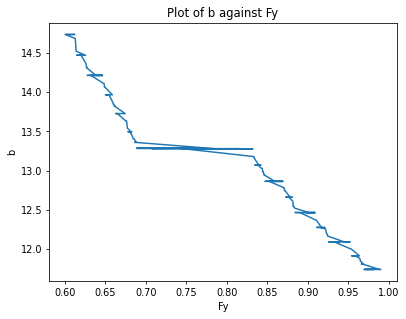

In [21]:
df = data.loc[(data.provNew=="01")&(data.year==1395),:].copy()

df= df.sort_values(by= ['totalPrice'])
df['Fy']= df.weight.cumsum() 
df['Fy']= df.Fy / df.weight.sum() * 100

df.sort_values(by= ['totalPrice'], inplace=True, ascending=False)

df["count"] = df.weight.cumsum()
df["sum"] = df.totalPrice.cumsum()
df["b"] = (df["sum"]/df["count"])/df["totalPrice"]

import matplotlib.pyplot as plt

df["alpha"] = df.b / (df.b - 1)

# df = df.loc[(df["Fy"].isin(np.arange(0,98,1))), :]
df = df.loc[(df["Fy"]<0.99)&(df["Fy"]>0.6), :]

plt.plot(df['Fy'], df['b'])
plt.xlabel('Fy')
plt.ylabel('b')
plt.title('Plot of b against Fy')
plt.show()

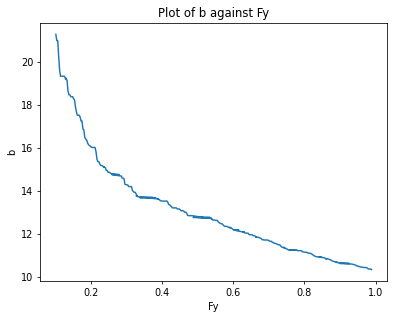

In [22]:
df = expenditureTotal.loc[(expenditureTotal.year==95),:].copy()
df["weight"] =1

df= df.sort_values(by= ['Daramad'])
df['Fy']= df.weight.cumsum() 
df['Fy']= df.Fy / df.weight.sum() * 100

df.sort_values(by= ['Daramad'], inplace=True, ascending=False)

df["D"] = df.Daramad * df.weight
df["count"] = df.weight.cumsum()
df["sum"] = df.D.cumsum()
df["b"] = (df["sum"]/df["count"])/df["Daramad"]

import matplotlib.pyplot as plt

df["alpha"] = df.b / (df.b - 1)

# df = df.loc[(df["Fy"].isin(np.arange(0,98,1))), :]
df = df.loc[(df["Fy"]<0.99)&(df["Fy"]>0.1), :]

plt.plot(df['Fy'], df['b'])
plt.xlabel('Fy')
plt.ylabel('b')
plt.title('Plot of b against Fy')
plt.show()



In [23]:
data["provNew"] = np.nan
data.loc[(data.provinceCode.isin(['23'])), "provNew"] = "01"
data.loc[(data.provinceCode.isin(['30','07','01','03','26','02','25','09'])), "provNew"] = "02"
data.loc[( data["provNew"].isna()) , "provNew"] = "03"

expenditureTotal["provNew"] = np.nan
expenditureTotal.loc[(expenditureTotal.province.isin(['23'])), "provNew"] = "01"
expenditureTotal.loc[(expenditureTotal.province.isin(['30','07','01','03','26','02','25','09'])), "provNew"] = "02"
expenditureTotal.loc[(expenditureTotal["provNew"].isna()), "provNew"] = "03"

In [26]:
expenditureTotal

,Unnamed: 0.1,Unnamed: 0,household,weight,Daramad,GHazineh,tedad,year,urban,rent,ownerType,area,province,realDaramad,realGHazineh,hazinehPerCapita,rand,Fy,FRent,provNew
14998,14998,14998,1230304157,2748.609,83225000.000,52526000.000,4,89,1,30000.000,1.000,170.000,23,250768350.006,158268048.692,250768350.006,0.232,0.351,0.001,01
34318,34318,34318,2230066238,521.069,25800000.000,5323800.000,1,89,0,150000.000,5.000,15.000,23,77738941.786,16041340.243,77738941.786,0.300,0.022,0.001,01
14515,14515,14515,1230202112,2323.962,95304000.000,295415760.000,4,89,1,150000.000,3.000,90.000,23,287164035.193,890128239.123,287164035.193,0.855,0.468,0.001,01
14873,14873,14873,1230277163,2717.561,5800000.000,20339200.000,2,89,1,150000.000,4.000,40.000,23,17476196.215,61284801.736,17476196.215,0.925,0.001,0.002,01
34223,34223,34223,2230046193,136.598,52991976.000,36136952.000,5,89,0,175000.000,1.000,200.000,23,159672098.349,108885597.204,159672098.349,0.908,0.117,0.002,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276242,276242,276242,10409054611,813.258,979840000.000,1007803000.000,4,98,1,57000000.000,3.000,110.000,04,528785752.833,543876416.622,528785752.833,0.530,0.960,1.000,03
292957,292957,292957,11303162320,319.675,1882800000.000,1386028480.000,1,98,1,60000000.000,1.000,500.000,13,1016082029.142,747991624.393,1016082029.142,0.337,0.996,1.000,03
319646,319646,319646,12705332618,900.026,972000000.000,916444000.000,2,98,1,60000000.000,4.000,155.000,27,524554776.039,494573124.663,524554776.039,0.995,0.960,1.000,03
278927,278927,278927,10603071823,2268.319,2240000000.000,1485440000.000,3,98,1,70000000.000,1.000,350.000,06,1208850512.682,801640582.839,1208850512.682,0.603,0.998,1.000,03


In [29]:
expenditureTotal.loc[(expenditureTotal.FRent>0.8) &( expenditureTotal.provNew=="01"),:].head(10) 

,Unnamed: 0.1,Unnamed: 0,household,weight,Daramad,GHazineh,tedad,year,urban,rent,ownerType,area,province,realDaramad,realGHazineh,hazinehPerCapita,rand,Fy,FRent,provNew
13922,13922,13922,1230074214,4647.924,117000000.000,104896800.000,2,89,1,6000000.000,1.000,70.000,23,352537061.589,316068458.479,352537061.589,0.966,0.605,0.800,01
13991,13991,13991,1230090057,2904.952,202679984.000,147842776.000,2,89,1,6000000.000,1.000,50.000,23,610702615.403,445470579.728,610702615.403,0.968,0.863,0.801,01
14323,14323,14323,1230163197,2323.962,237297608.000,143825600.000,4,89,1,6000000.000,1.000,75.000,23,715010268.772,433366276.968,715010268.772,0.973,0.911,0.801,01
14326,14326,14326,1230163206,2323.962,130001860.000,118673460.000,3,89,1,6000000.000,1.000,80.000,23,391713450.645,357579426.299,391713450.645,0.986,0.673,0.802,01
14034,14034,14034,1230100170,2512.268,226970305.000,310190105.000,3,89,1,6000000.000,1.000,99.000,23,683892687.116,934645368.808,683892687.116,0.990,0.899,0.802,01
13948,13948,13948,1230080174,2323.962,244859315.000,209246715.000,10,89,1,6100000.000,3.000,120.000,23,737794730.023,630489077.377,737794730.023,0.230,0.915,0.803,01
13956,13956,13956,1230082213,3873.270,83000000.000,106944944.000,1,89,1,6100000.000,4.000,56.000,23,250090394.118,322239797.517,250090394.118,0.917,0.351,0.804,01
13702,13702,13702,1230022101,3140.336,118800000.000,178541800.000,5,89,1,6200000.000,3.000,120.000,23,357960708.690,537970953.357,357960708.690,0.289,0.613,0.805,01
13927,13927,13927,1230075112,2904.952,110777360.000,131476960.000,2,89,1,6200000.000,4.000,50.000,23,333787393.034,396158129.444,333787393.034,0.683,0.573,0.805,01
14003,14003,14003,1230093065,2323.962,233083372.000,164779272.000,4,89,1,6300000.000,4.000,69.000,23,702312197.180,496502567.193,702312197.180,0.561,0.906,0.806,01


In [25]:

#* construct the empirical CDF that randomly sort observations wiht same values
np.random.seed(1234)  # Set the seed number for replicability

expenditureTotal['rand'] = np.random.rand(len(expenditureTotal))

expenditureTotal.sort_values(by=["year","provNew","hazinehPerCapita","rand"],inplace=True)
# expenditureTotal['Fy'] = expenditureTotal.groupby(['year','provNew'])['weight'].apply(lambda x: x.cumsum() / x.sum())
expenditureTotal['Fy'] = expenditureTotal.groupby(['year','provNew'])['weight'].apply(lambda x: x.cumsum() / x.sum()).reset_index(level=['year', 'provNew'], drop=True)

expenditureTotal.sort_values(by=["year","provNew","rent","rand"], inplace=True)
expenditureTotal['FRent'] = expenditureTotal.groupby(['year','provNew'])['weight'].apply(lambda x: x.cumsum() / x.sum()).reset_index(level=['year', 'provNew'], drop=True)

In [24]:
# # !pip install pyfixest
# import pyfixest as pf

# df = expenditureTotal.loc[(expenditureTotal["provNew"]=="01")&(expenditureTotal["FRent"]>=0.8)&(expenditureTotal.Daramad!=0),:]
# fit = pf.feols("LnHazineh ~ LnRent | year", data=df)
# fit.summary()

# df = expenditureTotal.loc[(expenditureTotal["provNew"]=="02")&(expenditureTotal["FRent"]>=0.8)&(expenditureTotal.Daramad!=0),:]
# fit = pf.feols("LnHazineh ~ LnRent | year", data=df)
# fit.summary()

# df = expenditureTotal.loc[(expenditureTotal["provNew"]=="03")&(expenditureTotal["FRent"]>=0.8)&(expenditureTotal.Daramad!=0),:]
# fit = pf.feols("LnHazineh ~ LnRent | year", data=df)
# fit.summary()

In [62]:
df = expenditureTotal.loc[(expenditureTotal.Daramad!=0)&(expenditureTotal.rent!= 0) ,["LnHazineh","LnRent","year","provNew","Fy","FRent"]]
# df.to_stata("./data/HIES_binsreg.dta")

In [41]:
# province_set=["02","03","01"]
province_set=["01"]


""" Initialize the Output dataframes """
result = np.zeros(shape=(10,1))
result = pd.DataFrame(result, columns=["year"])
result.year = np.arange(1389,1399)

Iran = result.copy()
alpha_beta_Tehran = result.copy()
tau_x0 = result.copy()

share = result.copy()
shareIran = result.copy()
shareTen= result.copy()
shareFive= result.copy()
shareOne= result.copy()
shareTenIran= result.copy()
shareFiveIran= result.copy()
shareOneIran= result.copy()
table= result.copy()


""" Define new vaiables: """ 
expenditureTotal['hazinehPerCapita'] = expenditureTotal.realDaramad #/ expenditureTotal.tedad
# expenditureTotal["weight"] = expenditureTotal.weight * expenditureTotal.tedad

figuresFolder = "Daramad"
expenditureTotal['LnHazineh']= np.log(expenditureTotal.hazinehPerCapita)

# expenditureTotal['rent']= expenditureTotal['rent'] * 12
expenditureTotal['LnRent']= np.log(expenditureTotal.rent) #/expenditureTotal.area)



"""--------------------------------------------------------------------"""
""" LET'S GO """

different_threshold_of_top_HIES = [90] #[85,95,90] 

for tauThreshold in different_threshold_of_top_HIES: 
    
    for year in np.arange(89,99):

        """
            Estimating theta from survey    
        """
        expenditure = expenditureTotal.loc[(expenditureTotal.year==year),:]

        expenditure = expenditure.loc[(expenditure.hazinehPerCapita.notna()) & (expenditure.LnRent.notna())
                                     &(expenditure.weight.notna()) & (expenditure.hazinehPerCapita != 0),:]

        """ calculating empirical cumulative density function """
        # expenditure.sort_values(by=["province","hazinehPerCapita"],inplace=True)
        # expenditure['Fy'] = expenditure.groupby('province')['weight'].apply(lambda x: x.cumsum() / x.sum())
                        
        # expenditure.sort_values(by=["province","rent"],inplace=True)
        # expenditure['FRent'] = expenditure.groupby('province')['weight'].apply(lambda x: x.cumsum() / x.sum())
        
        """-------------------------------------------------"""
        Sample = pd.DataFrame([])

        for flag, prov in enumerate(province_set):
            provName = next(key for key, value in provinceCodeEng.items() if value == prov)

            Tehran= expenditure[expenditure.provNew.isin([prov])]
            Tehran= Tehran.sort_values(by= ['hazinehPerCapita'])
            Tehran['Fy']= Tehran.weight.cumsum() 
            Tehran['Fy']= Tehran.Fy / Tehran.weight.sum()

            # -----------------------------------------
            """ calculating alpha from house price data """
            new = data[(data["provNew"].isin([prov])) & (data['year']==(1300+year) )]

            # define new variables
            new.sort_values(by=["provNew","totalPrice"],inplace=True)
            new['Gy'] = new.groupby('provNew')['weight'].apply(lambda x: x.cumsum() / x.sum()).reset_index(level=['provNew'], drop=True)

            # topCodeRent = new.loc[(new.Gy>0.999),"totalPrice"].min()
            # new.loc[(new.Gy>0.999),"totalPrice"] = topCodeRent

            """ 
                calculating alpha from data for different top share of data
                alpha: top house price data pareto tail index
            """
            # space=np.arange(0.5, 0.99, 0.05)
            # alpha=np.zeros(shape=(19,6))

            # for index,topPercentile in enumerate(space):
                
            #     # Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy>(topPercentile-0.02)) & (Tehran.Fy<(topPercentile+0.02)), "rent"].mean()
            #     # Price_to_Mortgage_Ratio = price_rent_ratio.loc[(price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]
            #     # TopRentmean= Price_to_Mortgage_Ratio * Rent_Top_Incomes_HIES * (100/3) / 10000000 
            #     # N = new[new.totalPrice >= topPercentile]

            #     N=new[new.Gy>=topPercentile]
            #     N.sort_values('totalPrice',inplace=True)
            #     N.reset_index(drop=True, inplace=True)

            #     # new estimation method with Maximum Likelihood ------------------------------
            #     # Fit Pareto distribution to the variable
            #     loc = N.totalPrice.min()
            #     n = N.shape[0]
            #     alpha_N = (n) / (N.LnPrice.sum() - n*np.log(loc))
            #     # ---------------------------------------------------------------------------

            #     N['G2y']=(N.index+1) / (N['totalPrice'].count())  
            #     N.drop(N.tail(1).index,inplace=True)
            #     N['Xvariable']= -np.log(1-N['G2y'])     
            #     """ dropping nan, inf from data to avoid error in regression """
            #     N.replace(np.inf , np.nan,inplace=True)
            #     N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

            #     x=N['Xvariable']
            #     y=N['LnPrice']- np.log(loc)

            #     results = sm.OLS(y,x,missing='drop').fit()
            #     alpha[index,0]=topPercentile
            #     alpha[index,1]= alpha_N #1/results.params[1]
            #     se=results.bse[0]
            #     alpha[index,4]=se
            #     alpha[index,2]= 1/(1/alpha_N + 2*se) 
            #     alpha[index,3]= 1/(1/alpha_N - 2*se)
            #     alpha[index,5]= 1/results.params[0]

            # -----------------------------------------
            """ alpha from new approach: tau -> rent -> house price -> alpha """
            # tau = tauThreshold * 1e7 #* cpi.loc[(cpi.year==year), : ].cpi.values[0]
            # tau = Tehran.loc[(Tehran.Fy>=(tauThreshold/100)),"hazinehPerCapita"].min()
            # lambda_tau = 1 - Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
            
            # Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.Fy> 1-lambda_tau-0.02)&(Tehran.Fy< 1-lambda_tau+0.02), "rent"].mean()
            # Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.hazinehPerCapita>(0.9*tau)) & (Tehran.hazinehPerCapita<(1.1*tau) ), "rent"].mean()
            Rent_Top_Incomes_HIES = Tehran.loc[(Tehran.FRent>= (tauThreshold/100)), "rent"].min()
            tau = Tehran.loc[(Tehran.FRent> (tauThreshold/100)-0.02)&(Tehran.FRent< (tauThreshold/100)+0.02), "hazinehPerCapita"].mean()

            Price_to_Mortgage_Ratio = price_rent_ratio.loc[(price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]
            # Price_to_Mortgage_Ratio = 5

            TopRentmean= Rent_Top_Incomes_HIES * Price_to_Mortgage_Ratio * (100/3) / 10000000
            
            # xx = new.loc[new.totalPrice>TopRentmean, "Gy"].min()
            # print(xx)

            N = new[new.totalPrice>TopRentmean]
            N.sort_values('totalPrice',inplace=True)
            N.reset_index(drop=True, inplace=True)  
            N['G2y'] = N.weight.cumsum()
            N['G2y'] = N.G2y / N.weight.sum()

            # new estimation method with Maximum Likelihood ------------------------------
            # Fit Pareto distribution to the variable
            loc = N.totalPrice.min()
            n = N.shape[0]
            mianeAlpha = (n) / (N.LnPrice.sum() - n*np.log(loc))
            # print(mianeAlpha) 

            # ----------------------------------------------------------------------------
            # dropping nan, inf from data to avoid error in regression            
            N['Xvariable']= -np.log(1-N['G2y'])     
            # N.drop(N.tail(1).index,inplace=True)

            # N['G2y']=(N.index+1) / (N['totalPrice'].count())  
            N.replace(np.inf , np.nan,inplace=True)
            N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)
            x=N['Xvariable']
            y=N['LnPrice'] - np.log(loc)
            results = sm.OLS(y,x,missing='drop').fit()
            mianeAlpha2 = 1/results.params[0]
            seAlpha=results.bse[0]

            # estimate the share of top house residents in the survey
            lambda_house_survey = 1 - Tehran.loc[(Tehran.rent>=Rent_Top_Incomes_HIES),:].FRent.min()
            result.loc[(result.year==(1300+year)) , "lambdaHouseSurv"+prov] = lambda_house_survey *100
            # print(lambda_house_survey *100)

            # ----------------------------------------------------------------------------
            # """ first Approach theta estimated """
            # # top_rent = Tehran.loc[Tehran['hazinehPerCapita']>=tau,:]
            # # top_rent = Tehran.loc[Tehran['Fy']>= 0.7,:]
            # top_rent = Tehran.loc[(Tehran['FRent']>=0.80)&(Tehran.LnHazineh.notna()) & (Tehran.LnRent.notna()) & (Tehran.weight.notna()), :]
            # x=top_rent['LnRent']
            # y=top_rent['LnHazineh']
            # results = mt.reg(top_rent, 'LnHazineh', 'LnRent', addcons=True ,awt_name='weight')
            # mianeBeta = results.beta['LnRent']
            # seBeta = results.se['LnRent']
            # # print(mianeBeta)

            # """ calculating confidence interval for theta second approach """
            # # seBeta = theta_hat.loc[(theta_hat.percentile>=0.80)
            # #          &(theta_hat.percentile<=0.95),"beta_se"].quantile(q=0.5)

            # a=np.random.normal(loc=1/mianeAlpha,scale=seAlpha,size=1000000)

            # b=np.random.normal(loc= mianeBeta, scale=seBeta, size=1000000)
            # d=1/(a*b)
            # d=pd.DataFrame(d)

            # theta_hat2_lower = d.quantile(q=0.05)[0]
            # theta_hat2_upper = d.quantile(q=0.95)[0]   


            # ----------------------------------------------------------------------------
            # estimate a non-linear model
            topPercentile = 0.7
            rentTehran = Tehran.loc[(Tehran['FRent']>=topPercentile) , :].copy()
            # rentTehran["LnRent"] = rentTehran.LnRent - np.log(Rent_Top_Incomes_HIES)
            rentTehran = rentTehran.loc[(rentTehran['LnRent'].notna()) & (rentTehran['LnHazineh'].notna()), :]
            rentTehran["LnRent2"] = rentTehran.LnRent**2
            rentTehran["LnRent3"] = rentTehran.LnRent**3
            
            # Define the dependent variable
            y = rentTehran['LnHazineh']
            X = rentTehran.loc[:, ['LnRent']]
            weights = rentTehran['weight']
            model = sm.WLS(y, sm.add_constant(X), weights=weights)
            results = model.fit()

            # Get the slope, constant, and R-squared
            slope_0 = results.params['const']
            slope_1 = results.params['LnRent'] # 0.787 * (prov=="01") + 0.612 * (prov=="02") + 0.527 * (prov=="03")
            slope_1_year = results.params['LnRent']
            slope_2 = 0 #results.params['LnRent2']
            slope_3 = 0 #results.params['LnRent3']
            # slope_se = results.bse['LnRent']
            r_squared = results.rsquared

            # print(slope_1)

            # ----------------------------------------------------------------------------
            # fig= plt.figure(figsize=(9.5,6))
            # ax1 = fig.add_subplot(1,1,1)
            
            # x_plot=np.linspace(rentTehran.LnRent.min(), rentTehran.LnRent.max(), 200)
            # ax1.plot(x_plot, x_plot*x_plot*slope_2 + x_plot*slope_1 + slope_0 , linewidth=2.9,label="regression line",color="black")
            
            # ax1.scatter(rentTehran['LnRent'], rentTehran['LnHazineh'] , color="gray", label="data")
            # ax1.set_xlabel('house rental value (in log)', fontsize=14,labelpad=10)
            # ax1.set_ylabel('household total income (in log)', fontsize=14,labelpad=10)
            # ax1.grid(axis= 'y',alpha=0.5)
            # ax1.tick_params(labelsize=13)
            # ax1.spines['right'].set_visible(False)
            # ax1.spines['top'].set_visible(False)
            # ax1.text(0.95, 0.02, f'R2= {r_squared:.2f}', transform=ax1.transAxes, verticalalignment='bottom', horizontalalignment='right', fontsize=12)
            # plt.show()

            # ----------------------------------------------------------------------------
            # Gini for the province    
            thetaEstimated = mianeAlpha / slope_1
            
            """ filling the 'alpha_beta_Tehran' output for report """
            alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"alpha"] = mianeAlpha
            alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"beta"] = slope_1
            alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat"] = thetaEstimated
            # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat_lower"] = theta_hat2_lower 
            # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat_upper"] = theta_hat2_upper
            
            # theta["percentile"] = np.round(theta.percentile,decimals=2)
            # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta"] = theta.loc[(theta.percentile==0.94),"theta"].values[0]
            # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_lower"] = theta.loc[(theta.percentile==0.94),"theta_lower"].values[0]
            # alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_upper"] = theta.loc[(theta.percentile==0.94),"theta_upper"].values[0]
           
            """ Filling the 'tau_x0' output data frame """
            tau_x0.loc[tau_x0.year==(1300+year),"tau"] = tau / 1e7
            tau_x0.loc[tau_x0.year==(1300+year),"tau_real"] = (tau / 1e7) * cpi.loc[(cpi.year==year), : ].cpi.values[0]
            tau_x0.loc[tau_x0.year==(1300+year),"R0"]  = Rent_Top_Incomes_HIES * (100/3) / 1e7
            tau_x0.loc[tau_x0.year==(1300+year),"x0"]  = TopRentmean

            # ----------------------------------------------------------------------------
            """ estimating lambda """
            # estimate true share of top house residents
            T = Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),:]
            T= T.sort_values(by= ['rent'])
            T['Gy'] = T.weight.cumsum()
            T['Gy'] = T.Gy / T.weight.sum()
            results = mt.reg( T.loc[(T.Gy>0.9),:], 'Gy', 'rent', addcons=True)
            g1Tau = results.beta['rent']
            del T

            N = new[new.totalPrice>TopRentmean]
            N = N.sort_values(by=['totalPrice'])
            N['totalPrice'] = N.totalPrice * 10000000 / (Price_to_Mortgage_Ratio * (100/3))
            N['Gy'] = N.weight.cumsum()
            N['Gy'] = N.Gy / N.weight.sum()
            results = mt.reg( N.loc[(N.Gy<0.1),:], 'Gy', 'totalPrice', addcons=True)
            g2Tau = results.beta['totalPrice']
            # print(np.log(N.totalPrice.max()))
            # print(np.log(Tehran.rent.max()))

            # g2Tau= mianeAlpha / Rent_Top_Incomes_HIES
            lambda_house = g1Tau / (g1Tau+g2Tau)
            result.loc[(result.year==(1300+year)) , "lambdaHouse"+prov] = lambda_house *100
            # print(lambda_house *100)


            # T = Tehran.loc[(Tehran.hazinehPerCapita< tau), :]
            # T= T.sort_values(by= ['hazinehPerCapita'])
            # T['Fy']= T.Fy / T.weight.sum()
            # T['Fy']= T.weight.cumsum() 
            # results = mt.reg(
            #     T.loc[(T.Fy>0.9),:],      # DataFrame
            #     'Fy',                      # Dependent var (string)
            #     'hazinehPerCapita',        # Independent var(s) (string or list of strings)
            #     addcons=True
            #     )

            # f1Tau= results.beta['hazinehPerCapita']
            # f2Tau= thetaEstimated / tau * 1e7
            # landa= f1Tau / (f1Tau+f2Tau)
            # result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landa *100

            # landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
            # result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100




            # estimate mean income using survey
            # muSurvey = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)

            # ----------------------------------------------------------------------------
            # approach 1 -------------------
        
            # N_sample_size = 100000
            # TopIncomesample = (np.random.pareto(mianeAlpha, N_sample_size) + 1) * Rent_Top_Incomes_HIES 
            # TopIncomesample = pd.DataFrame(TopIncomesample,columns=["rent"])
            # TopIncomesample["LnRent"] = np.log(TopIncomesample.rent) 
            # TopIncomesample["LnRent"] = np.log(TopIncomesample.rent) - np.log(Rent_Top_Incomes_HIES)

            TopIncomesample = new[new.totalPrice>TopRentmean]
            TopIncomesample["LnRent"] = np.log(TopIncomesample.totalPrice * 10000000 / (Price_to_Mortgage_Ratio * (100/3)) )
            TopIncomesample = TopIncomesample[["LnRent"]]
            N_sample_size = TopIncomesample.shape[0]
            # TopIncomesample["LnRent"] = TopIncomesample.LnRent - np.log(Rent_Top_Incomes_HIES)
            
            # TopIncomesample["hazinehPerCapita"] = np.exp(np.log(tau) + slope_1*TopIncomesample.LnRentDev)
            TopIncomesample["hazinehPerCapita"] = np.exp(slope_0 + slope_1*TopIncomesample.LnRent + slope_2*(TopIncomesample.LnRent**2) + slope_3*(TopIncomesample.LnRent**3))
            
            sigma_weight_low_income = Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),:].weight.sum()
            TopIncomesample["weight"] = sigma_weight_low_income / ((1/lambda_house - 1) * N_sample_size)
            TehranSample = pd.concat([TopIncomesample, Tehran.loc[(Tehran.rent<Rent_Top_Incomes_HIES),["weight","hazinehPerCapita"]] ],axis=0)


            # approach 2 -------------------
            # # create the simulated data for the province
            # N_sample_size = 1000000
            # TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
            # TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])
            
            # sigma_weight_low_income = Tehran.loc[(Tehran.hazinehPerCapita<tau),:].weight.sum()
            # TopIncomesample["weight"] = sigma_weight_low_income / ((1/landa - 1) * N_sample_size)
            # TehranSample = pd.concat([TopIncomesample, Tehran.loc[(Tehran.hazinehPerCapita<tau),["weight","hazinehPerCapita"]] ],axis=0)


            # re-weight to balance population distribution
            TehranSample["weight"] = TehranSample["weight"] * np.sum(Tehran.weight) / np.sum(TehranSample.weight)
            
            TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
            TehranSample['Fy']= TehranSample.weight.cumsum() 
            TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()          

            Sample = pd.concat([Sample, TehranSample], axis=0)
            """ Save Simulated Data for Tehran """
            #TehranSample.to_csv(f'../Data/Simulated Sample/Simulated{year}.csv')
            #TehranSample.to_stata(f'../Data/Simulated Sample/Simulated{year}.dta')
            
            # test of income distribution continuity
            # xx = TopIncomesample.hazinehPerCapita.min()
            # yy = TehranSample.loc[TehranSample.hazinehPerCapita>xx,"Fy"].min()

            # print(TehranSample.loc[TehranSample.hazinehPerCapita>1.05*xx,"Fy"].min() - yy)

            # print(yy - TehranSample.loc[TehranSample.hazinehPerCapita>0.95*xx,"Fy"].min())


        # ----------------------------------------------------------------------------
        """ Simulated Data for the whole country """
        
        IranSample = pd.concat([Sample, expenditure.loc[~(expenditure.provNew.isin(province_set)),["weight","hazinehPerCapita"]] ],axis=0)

        IranSample= IranSample.sort_values(by= ['hazinehPerCapita'])
        IranSample['Fy']= IranSample.weight.cumsum()

        IranSample['Fy']= IranSample.Fy / IranSample.weight.sum()
        
        # ----------------------------------------------------------------------------
        """ Filling Iran dataframe calculating empirical cumulative density function """

        # new code as replacement -------------------------------
        IranLandaSurvey = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
        Iran.loc[(Iran.year==(1300+year)),"lambdaSurvey"] = IranLandaSurvey *100

        landaTotal = 1 - IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].Fy.min()
        Iran.loc[(Iran.year==(1300+year)),"lambda"] = landaTotal *100

        muTopIran = np.average(expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight)
        muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
        sTotalIranSurvey = expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight.sum()*muTopIran/(muKol*expenditure.weight.sum())
        Iran.loc[(Iran.year==(1300+year)),"sSurvey"] = sTotalIranSurvey *100

        muTopIranEst = np.average(IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].weight)
        muKolEst = np.average(IranSample.hazinehPerCapita, weights=IranSample.weight)
        sTotalIranSurveyEst = IranSample.loc[(IranSample.hazinehPerCapita>=tau),:].weight.sum()*muTopIranEst/(muKolEst*IranSample.weight.sum())
        Iran.loc[(Iran.year==(1300+year)),"s"] = sTotalIranSurveyEst *100


        GiniIranSurvey = gini(expenditure.hazinehPerCapita, w=expenditure.weight)
        Iran.loc[(Iran.year==(1300+year)),"GiniSurvey"] = GiniIranSurvey *100
        
        GiniIran = gini(IranSample.hazinehPerCapita, w=IranSample.weight)
        Iran.loc[(Iran.year==(1300+year)),"Gini"] = GiniIran *100


        # new code replacement ------------------------------
        landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
        result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100

        landaTehran = 1 - TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].Fy.min()
        result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landaTehran *100

        
        GiniSurvey = gini(Tehran.hazinehPerCapita, w=Tehran.weight)
        result.loc[(result.year==(1300+year)) , "GiniSurvey"+prov]    = GiniSurvey *100

        Gini = gini(TehranSample.hazinehPerCapita, w=TehranSample.weight)
        result.loc[(result.year==(1300+year)) , "Gini"+prov+f"_{tauThreshold}"] = Gini *100


        muTopTehranSurv = np.average(Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].weight)
        muKolTehranSurv = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)
        sTotalTehranSurvey = Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].weight.sum()*muTopTehranSurv/(muKolTehranSurv*Tehran.weight.sum())
        result.loc[(result.year==(1300+year)) , "sSurvey"+prov] = sTotalTehranSurvey *100

        muTopTehranEst = np.average(TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].hazinehPerCapita, weights=TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].weight)
        muKolTehranEst = np.average(TehranSample.hazinehPerCapita, weights=TehranSample.weight)
        sTehran = TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:].weight.sum()*muTopTehranEst/(muKolTehranEst*TehranSample.weight.sum())
        result.loc[(result.year==(1300+year)) , "s"+prov] = sTehran *100


        # ----------------------------------------------------------------------------
        """ estimating each decile share """    
        muTehranEst = np.sum(TehranSample.hazinehPerCapita * TehranSample.weight)

        # Tehran['hazinehPerCapita'] = np.around(Tehran.hazinehPerCapita/10000, decimals=5)
        muSurveyTehran = np.sum(Tehran.hazinehPerCapita * Tehran.weight )        
        
        # decile income share in Tehran
        for i in [1,2,3,4,5,6,7,8,9,10]:
            decile = TehranSample.loc[(TehranSample.Fy<=0.1*i + 0.01*(i==10))&(TehranSample.Fy>0.1*(i-1)), :]
            muDecile = np.sum(decile.hazinehPerCapita * decile.weight)
            share.loc[(share.year==(1300+year)), f"{i}DecileEst"] = 100*muDecile/muTehranEst

            decile = Tehran.loc[(Tehran.Fy<=0.1*i + 0.01*(i==10))&(Tehran.Fy>0.1*(i-1)), :]
            muDecile = np.sum(decile.hazinehPerCapita * decile.weight )
            share.loc[(share.year==(1300+year)), f"{i}DecileSurv"] = 100*muDecile/muSurveyTehran
        
        # quintile income share in Tehran
        for i in [1,2,3,4,5]:
            decile = TehranSample.loc[(TehranSample.Fy<=(0.2*i + 0.01*(i==5))) &(TehranSample.Fy>0.2*(i-1)), :]
            muDecile = np.sum(decile.hazinehPerCapita * decile.weight)
            share.loc[(share.year==(1300+year)), f"{i}est"] = 100*muDecile/muTehranEst
        
        for i in [1,2,3,4,5]:
            decile = Tehran.loc[(Tehran.Fy<=(0.2*i + 0.01*(i==5) )) & (Tehran.Fy>0.2*(i-1)), :]
            muDecile = np.sum(decile.hazinehPerCapita * decile.weight )
            share.loc[(share.year==(1300+year)), f"{i}surv"] = 100*muDecile/muSurveyTehran

        # ----------------------------------------------------------------------------
        #         estimating each 10%    
        for i in np.arange(1,11):
            halfDecile = TehranSample.loc[(TehranSample.Fy<=0.1*i + 0.01*(i==10))&(TehranSample.Fy>0.1*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
            shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

            halfDecile = Tehran.loc[(Tehran.Fy<=0.1*i + 0.01*(i==10))&(Tehran.Fy>0.1*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran
         
        #         estimating each half decile share(each 5%)    
        for i in np.arange(1,21):
            halfDecile = TehranSample.loc[(TehranSample.Fy<=0.05*i + 0.01*(i==20))&(TehranSample.Fy>0.05*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
            shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

            halfDecile = Tehran.loc[(Tehran.Fy<=0.05*i + 0.01*(i==20))&(Tehran.Fy>0.05*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran

        #         estimating each 1 p share(each 1%)    
        for i in np.arange(1,101):
            halfDecile = TehranSample.loc[(TehranSample.Fy<=0.01*i + 0.01*(i==100)) &(TehranSample.Fy>0.01*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muTehranEst
            shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muTehranEst

        for i in np.arange(1,101):
            halfDecile = Tehran.loc[(Tehran.Fy<=0.01*i + 0.01*(i==100)) &(Tehran.Fy>0.01*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muSurveyTehran
              
        # ----------------------------------------------------------------------------
        # estimating each 10%    Iran
        expenditure.sort_values(by="hazinehPerCapita", inplace=True)
        expenditure["Fy"] = expenditure["weight"].cumsum() / expenditure["weight"].sum()
        muIranSurv = np.sum(expenditure.hazinehPerCapita * expenditure.weight)
        muIranEst = np.sum(IranSample.hazinehPerCapita * IranSample.weight)

        # quintile income share in Tehran
        for i in [1,2,3,4,5]:
            decile = IranSample.loc[(IranSample.Fy<=(0.2*i + 0.01*(i==5))) &(IranSample.Fy>0.2*(i-1)), :]
            muDecile = np.sum(decile.hazinehPerCapita * decile.weight)
            shareIran.loc[(share.year==(1300+year)), f"{i}est"] = 100*muDecile/muIranEst
        
        for i in [1,2,3,4,5]:
            decile = expenditure.loc[(expenditure.Fy<=(0.2*i + 0.01*(i==5) )) & (expenditure.Fy>0.2*(i-1)), :]
            muDecile = np.sum(decile.hazinehPerCapita * decile.weight )
            shareIran.loc[(share.year==(1300+year)), f"{i}surv"] = 100*muDecile/muIranSurv


        for i in np.arange(1,11):
            halfDecile = IranSample.loc[(IranSample.Fy<=0.1*i + 0.01*(i==10)) &(IranSample.Fy>0.1*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
            shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst

            halfDecile = expenditure.loc[(expenditure.Fy<=0.1*i + 0.01*(i==10)) &(expenditure.Fy>0.1*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv
         
        #         estimating each half decile share(each 5%)    Iran
        for i in np.arange(1,21):
            halfDecile = IranSample.loc[(IranSample.Fy<=0.05*i + 0.01*(i==20)) &(IranSample.Fy>0.05*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
            shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst

            halfDecile = expenditure.loc[(expenditure.Fy<=0.05*i + 0.01*(i==20)) &(expenditure.Fy>0.05*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv

        #         estimating each 1 p share(each 1%)    Iran
        for i in np.arange(1,101):
            halfDecile = IranSample.loc[(IranSample.Fy<=0.01*i + 0.01*(i==100)) &(IranSample.Fy>0.01*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*muHalfDecile/muIranEst
            shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*muHalfDecile/muIranEst
    
            halfDecile = expenditure.loc[(expenditure.Fy<=0.01*i + 0.01*(i==100)) &(expenditure.Fy>0.01*(i-1)), :]
            muHalfDecile = np.sum(halfDecile.hazinehPerCapita * halfDecile.weight)
            shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*muHalfDecile/muIranSurv
    
        result.loc[(result.year==(1300+year)), f"Gini"] = gini(TehranSample.hazinehPerCapita, w=TehranSample.weight)


        table.loc[(table.year==(1300+year)),"alpha"] = mianeAlpha
        table.loc[(table.year==(1300+year)),"beta"] = slope_1_year

        tau = Tehran.loc[(Tehran.Fy>=0.9),"hazinehPerCapita"].min()
        lambda_sur = 1 - Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
        lambda_est = 1 - TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),"Fy"].min()
        
        table.loc[(table.year==(1300+year)),"lambda_sur"] = lambda_sur
        table.loc[(table.year==(1300+year)),"lambda_est"] = lambda_est

        # tau = expenditure.loc[(expenditure.Fy>=0.9),"hazinehPerCapita"].min()
        # lambda_sur = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
        # lambda_est = 1 - IranSample.loc[(IranSample.hazinehPerCapita>=tau),"Fy"].min()
        
        # table.loc[(table.year==(1300+year)),"lambda_sur_Iran"] = lambda_sur
        # table.loc[(table.year==(1300+year)),"lambda_est_Iran"] = lambda_est

        T = Tehran.loc[(Tehran.hazinehPerCapita>=tau),:]
        theta_surv, loc = pareto_mle(T.weight, T.hazinehPerCapita)
        table.loc[(table.year==(1300+year)),"theta_surv"] = theta_surv

        T=  TehranSample.loc[(TehranSample.hazinehPerCapita>=tau),:]
        theta_est, loc = pareto_mle(T.weight, T.hazinehPerCapita)
        table.loc[(table.year==(1300+year)),"theta_est"] = theta_est




del new
# del Sample
# del Tehran
del N
# del samples
del expenditure
# del topIncome 
# del lowIncome 
# del rent 


In [42]:
pd.DataFrame(alpha)

NameError: name 'alpha' is not defined

In [43]:
table

,year,alpha,beta,lambda_sur,lambda_est,theta_surv,theta_est
0,1389,1.470,0.808,0.099,0.276,2.523,2.004
1,1390,1.488,0.735,0.100,0.290,3.386,2.227
2,1391,1.628,0.738,0.100,0.218,3.290,2.495
3,1392,1.539,0.833,0.100,0.240,3.356,2.037
4,1393,1.749,0.674,0.100,0.255,3.971,2.798
5,1394,1.672,0.707,0.100,0.224,4.619,2.676
6,1395,1.575,0.820,0.100,0.238,3.053,2.115
7,1396,1.473,0.639,0.099,0.268,4.027,2.669
8,1397,1.357,0.783,0.100,0.280,3.604,2.072
9,1398,1.567,0.778,0.099,0.250,3.553,2.296


In [44]:
# pd.DataFrame(alpha)

In [45]:
# TopIncomesample.LnRent.max()

# import seaborn as sns

# import matplotlib.pyplot as plt

# # Select the "hazinehPerCapita" column from the "TehranSample" dataframe
# # hazineh_per_capita = TehranSample.loc[ TehranSample.hazinehPerCapita > 95*1e7 ,'hazinehPerCapita']

# LnRent = TopIncomesample["LnRent"]

# # Plot the kernel density
# sns.kdeplot(data=LnRent)

# # Set the plot title and labels
# plt.title('Kernel Density of LnRent in TehranSample')
# plt.xlabel('LnRent')
# plt.ylabel('Density')

# # Show the plot
# plt.show()


# import seaborn as sns

# import matplotlib.pyplot as plt

# # Select the "hazinehPerCapita" column from the "TehranSample" dataframe
# hazineh_per_capita = TehranSample.loc[ TehranSample.hazinehPerCapita > 95*1e7 ,'hazinehPerCapita']

# # Plot the kernel density
# sns.kdeplot(data=hazineh_per_capita)

# # Set the plot title and labels
# plt.title('Kernel Density of hazinehPerCapita in TehranSample')
# plt.xlabel('hazinehPerCapita')
# plt.ylabel('Density')

# # Show the plot
# plt.show()

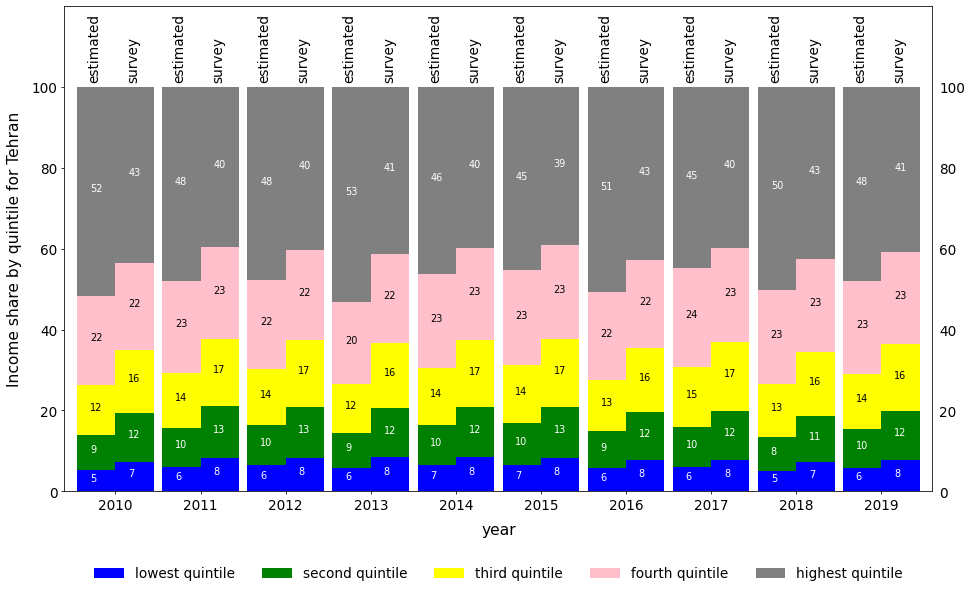

In [46]:
# Tehran
ssh = share.round(decimals=0).astype(int).copy()

## plot gini estimated and gini from survey ##

fig=plt.figure(figsize=(16,9))
ax1=fig.add_subplot(1,1,1)

ax1.bar(share.year+0.225, share["1surv"], label="",color= "blue",width=0.45)
ax1.bar(share.year+0.225, share["2surv"], label="", bottom=share["1surv"],color="green",width=0.45)
ax1.bar(share.year+0.225, share["3surv"], label="", bottom=share["1surv"]+share["2surv"],color="yellow",width=0.45)
ax1.bar(share.year+0.225, share["4surv"], label="", bottom=share["1surv"]+share["2surv"]+share["3surv"],color="pink",width=0.45)
ax1.bar(share.year+0.225, share["5surv"], label="", bottom=share["1surv"]+share["2surv"]+share["3surv"]+share["4surv"],color="gray",width=0.45)
    
tt = "surv"
for year in np.arange(1389,1399): 
    ax1.text(year+0.15,share.loc[(share.year==year),f"1{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"1surv"].values[0],color="white")
    ax1.text(year+0.15,share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"2surv"].values[0],color="white")
    ax1.text(year+0.15, share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0] + share.loc[(share.year==year),f"3{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"3surv"].values[0],color="black")
    ax1.text(year+0.15, share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0] + share.loc[(share.year==year),f"3{tt}"].values[0] + share.loc[(share.year==year),f"4{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"4surv"].values[0],color="black")
    ax1.text(year+0.15, share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0] + share.loc[(share.year==year),f"3{tt}"].values[0] + share.loc[(share.year==year),f"4{tt}"].values[0] + share.loc[(share.year==year),f"5{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"5surv"].values[0],color="w")
    

ax1.bar(share.year-0.225, share["1est"], label="lowest quintile",color= "blue",width=0.45)
ax1.bar(share.year-0.225, share["2est"], label="second quintile", bottom=share["1est"],color="green",width=0.45)
ax1.bar(share.year-0.225, share["3est"], label="third quintile", bottom=share["1est"]+share["2est"],color="yellow",width=0.45)
ax1.bar(share.year-0.225, share["4est"], label="fourth quintile", bottom=share["1est"]+share["2est"]+share["3est"],color="pink",width=0.45)
ax1.bar(share.year-0.225, share["5est"], label="highest quintile", bottom=share["1est"]+share["2est"]+share["3est"]+share["4est"],color="gray",width=0.45)

tt = "est"
for year in np.arange(1389,1399): 
    ax1.text(year-0.3,share.loc[(share.year==year),f"1{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"1est"].values[0],color="white")
    ax1.text(year-0.3,share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"2est"].values[0],color="white")
    ax1.text(year-0.3, share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0] + share.loc[(share.year==year),f"3{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"3est"].values[0],color="black")
    ax1.text(year-0.3, share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0] + share.loc[(share.year==year),f"3{tt}"].values[0] + share.loc[(share.year==year),f"4{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"4est"].values[0],color="black")
    ax1.text(year-0.3, share.loc[(share.year==year),f"1{tt}"].values[0] + share.loc[(share.year==year),f"2{tt}"].values[0] + share.loc[(share.year==year),f"3{tt}"].values[0] + share.loc[(share.year==year),f"4{tt}"].values[0] + share.loc[(share.year==year),f"5{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"5est"].values[0],color="w")
    
    
# ax1.grid(axis='y',alpha=0.4)
# # ax1.set_title(f'year {1300+year}')
ax1.set_xlabel('year', fontsize=16, labelpad=10)
ax1.set_ylabel('Income share by quintile for Tehran', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=14)
ax1.legend(loc='upper center',edgecolor='w',prop={'size':14},ncol=5, handlelength=2.2, bbox_to_anchor=(0.5, -0.13))

ax1.set_xlim(1388.4,1398.6)
# plt.legend(patches, labels, loc="center left",edgecolor='gray',prop={'size':14}
#            , bbox_to_anchor=(1.1, 0.5 ))

# ax1.spines['bottom'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.spines['left'].set_visible(False)
# ax1.spines['right'].set_visible(False)

ax1.set_ylim(-0.00,120)
ax1.set_yticks(np.arange(0.0,110,20))
for year in np.arange(1389,1399):
    ax1.text(year-0.33,102, "estimated" ,color="black", rotation=90,size=14)
    ax1.text(year+0.13,102, "survey" ,color="black", rotation=90,size=14)

plt.tick_params(labelright=True)

plt.show()
# fig.savefig(f'../Figures/Robustness/Income_shares_by_quintile2.pdf',transparent=True,bbox_inches="tight"
# )

# fig.savefig(f'../Figures/Robustness/Income_shares_by_quintile2_new.pdf',transparent=True,bbox_inches="tight")



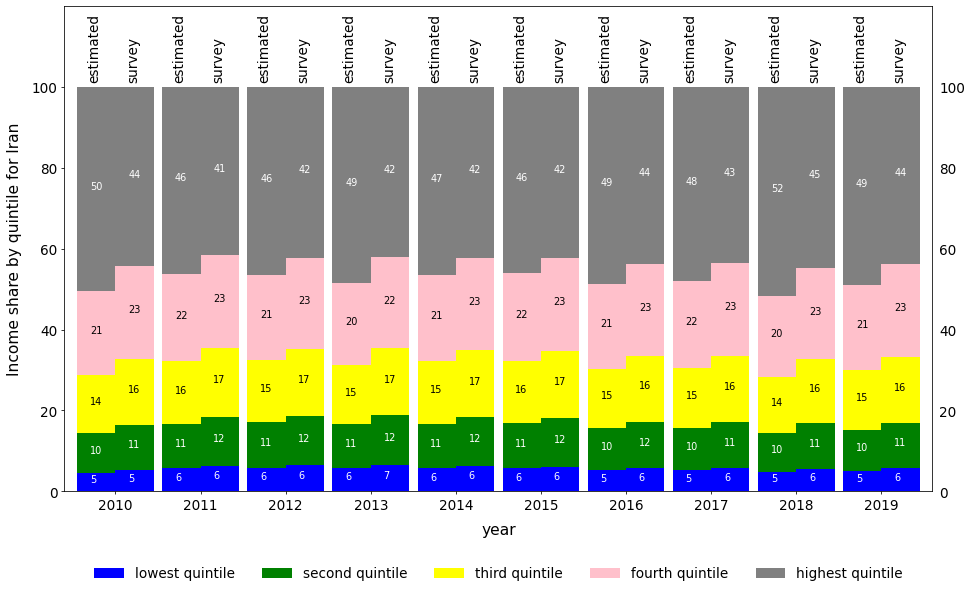

In [47]:
# Iran
ssh = shareIran.round(decimals=0).astype(int).copy()

## plot gini estimated and gini from survey ##

fig=plt.figure(figsize=(16,9))
ax1=fig.add_subplot(1,1,1)

ax1.bar(shareIran.year+0.225, shareIran["1surv"], label="",color= "blue",width=0.45)
ax1.bar(shareIran.year+0.225, shareIran["2surv"], label="", bottom=shareIran["1surv"],color="green",width=0.45)
ax1.bar(shareIran.year+0.225, shareIran["3surv"], label="", bottom=shareIran["1surv"]+shareIran["2surv"],color="yellow",width=0.45)
ax1.bar(shareIran.year+0.225, shareIran["4surv"], label="", bottom=shareIran["1surv"]+shareIran["2surv"]+shareIran["3surv"],color="pink",width=0.45)
ax1.bar(shareIran.year+0.225, shareIran["5surv"], label="", bottom=shareIran["1surv"]+shareIran["2surv"]+shareIran["3surv"]+shareIran["4surv"],color="gray",width=0.45)
    
tt = "surv"
for year in np.arange(1389,1399): 
    ax1.text(year+0.15,shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"1surv"].values[0],color="white")
    ax1.text(year+0.15,shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"2surv"].values[0],color="white")
    ax1.text(year+0.15, shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"3{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"3surv"].values[0],color="black")
    ax1.text(year+0.15, shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"3{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"4{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"4surv"].values[0],color="black")
    ax1.text(year+0.15, shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"3{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"4{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"5{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"5surv"].values[0],color="w")
    

ax1.bar(shareIran.year-0.225, shareIran["1est"], label="lowest quintile",color= "blue",width=0.45)
ax1.bar(shareIran.year-0.225, shareIran["2est"], label="second quintile", bottom=shareIran["1est"],color="green",width=0.45)
ax1.bar(shareIran.year-0.225, shareIran["3est"], label="third quintile", bottom=shareIran["1est"]+shareIran["2est"],color="yellow",width=0.45)
ax1.bar(shareIran.year-0.225, shareIran["4est"], label="fourth quintile", bottom=shareIran["1est"]+shareIran["2est"]+shareIran["3est"],color="pink",width=0.45)
ax1.bar(shareIran.year-0.225, shareIran["5est"], label="highest quintile", bottom=shareIran["1est"]+shareIran["2est"]+shareIran["3est"]+shareIran["4est"],color="gray",width=0.45)

tt = "est"
for year in np.arange(1389,1399): 
    ax1.text(year-0.3,shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"1est"].values[0],color="white")
    ax1.text(year-0.3,shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"2est"].values[0],color="white")
    ax1.text(year-0.3, shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"3{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"3est"].values[0],color="black")
    ax1.text(year-0.3, shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"3{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"4{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"4est"].values[0],color="black")
    ax1.text(year-0.3, shareIran.loc[(shareIran.year==year),f"1{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"2{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"3{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"4{tt}"].values[0] + shareIran.loc[(shareIran.year==year),f"5{tt}"].values[0]/2,
             ssh.loc[(ssh.year==year),"5est"].values[0],color="w")
    

# ax1.grid(axis='y',alpha=0.4)
# # ax1.set_title(f'year {1300+year}')
ax1.set_xlabel('year', fontsize=16, labelpad=10)
ax1.set_ylabel('Income share by quintile for Iran', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=14)
ax1.legend(loc='upper center',edgecolor='w',prop={'size':14},ncol=5, handlelength=2.2, bbox_to_anchor=(0.5, -0.13))

ax1.set_xlim(1388.4,1398.6)
# plt.legend(patches, labels, loc="center left",edgecolor='gray',prop={'size':14}
#            , bbox_to_anchor=(1.1, 0.5 ))

# ax1.spines['bottom'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# ax1.spines['left'].set_visible(False)
# ax1.spines['right'].set_visible(False)

ax1.set_ylim(-0.00,120)
ax1.set_yticks(np.arange(0.0,110,20))
for year in np.arange(1389,1399):
    ax1.text(year-0.33,102, "estimated" ,color="black", rotation=90,size=14)
    ax1.text(year+0.13,102, "survey" ,color="black", rotation=90,size=14)

plt.tick_params(labelright=True)

plt.show()

# fig.savefig(f'../Figures/Robustness/Income_shares_by_quintile2_Iran_new.pdf',transparent=True,bbox_inches="tight")



In [48]:
share["sum_est_decile"] = (share["1DecileEst"]+share["2DecileEst"]+share["3DecileEst"]+share["4DecileEst"]+share["5DecileEst"]+
                   share["6DecileEst"]+share["7DecileEst"]+share["8DecileEst"]+share["9DecileEst"]+share["10DecileEst"])
share["sum_surv"] = (share["1DecileSurv"]+share["2DecileSurv"]+share["3DecileSurv"]+share["4DecileSurv"]+share["5DecileSurv"]+
                   share["6DecileSurv"]+share["7DecileSurv"]+share["8DecileSurv"]+share["9DecileSurv"]+share["10DecileSurv"])

# for i in [1,2,3,4,5]:
#     share[f"{i}est"] = share[f"{i}est"] / share["sum_est"]
#     share[f"{i}surv"] = share[f"{i}surv"] / share["sum_surv"]    


In [49]:
# ## plot 10P estimated and from survey ##

# fig=plt.figure(figsize=(9,6))
# ax1=fig.add_subplot(1,1,1)


# ax1.plot('year', '10DecileSurv', 's-',
#         data= share,
#         color=(0.1,0.1,0.9,0.9),
#         label='Using Only Household Data',
#         marker = markerShape[0],
#         linewidth=1.5,
#         markersize= 8,
#         alpha=0.8)


# ax1.plot("year", f"10DecileEst", 'o-',
#         data= share,
#         color= (0,0.8,0.5,0.8),
#         marker = markerShape[1],
#         label= f"Correcting for Top Incomes",
#         linewidth=1.5,
#         markersize= 8,
#         alpha=0.8)

# ax1.grid(axis='y',alpha=0.4)
# ax1.set_xlabel('Year', fontsize=16, labelpad=10)
# ax1.set_ylabel('Top 10% income share', fontsize=16, labelpad=10)
# ax1.set_xticks(np.arange(1389,1399,1))
# ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
# ax1.tick_params(labelsize=13)
# ax1.set_ylim(0.2,0.4)
# ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)

# plt.show()
# #fig.savefig(f'../Figures/Robustness/Income_shares_by_deciles10.pdf',transparent=True,bbox_inches="tight")


In [50]:
shareTen
# shareFive=shareFive[['year','20HalfDecileEst','20HalfDecileSurv', ]]
shareFive
# shareOne=shareOne[['year','100HalfDecileEst','100HalfDecileSurv']]
shareOne

,year,1HalfDecileEst,1HalfDecileEst_thresh_90,2HalfDecileEst,2HalfDecileEst_thresh_90,3HalfDecileEst,3HalfDecileEst_thresh_90,4HalfDecileEst,4HalfDecileEst_thresh_90,5HalfDecileEst,...,91HalfDecileSurv,92HalfDecileSurv,93HalfDecileSurv,94HalfDecileSurv,95HalfDecileSurv,96HalfDecileSurv,97HalfDecileSurv,98HalfDecileSurv,99HalfDecileSurv,100HalfDecileSurv
0,1389,0.066,0.066,0.116,0.116,0.166,0.166,0.186,0.186,0.205,...,1.722,1.978,2.022,2.185,2.455,2.562,2.820,2.996,3.648,5.615
1,1390,0.098,0.098,0.154,0.154,0.191,0.191,0.223,0.223,0.248,...,1.733,1.753,1.986,1.782,2.054,2.373,2.335,2.768,3.056,4.346
2,1391,0.113,0.113,0.201,0.201,0.227,0.227,0.246,0.246,0.278,...,1.842,1.804,2.076,2.041,2.156,2.482,2.452,2.578,3.306,4.297
3,1392,0.133,0.133,0.182,0.182,0.209,0.209,0.225,0.225,0.246,...,1.816,1.923,1.935,2.067,2.227,2.178,2.616,2.677,3.074,5.400
4,1393,0.138,0.138,0.206,0.206,0.230,0.230,0.268,0.268,0.276,...,1.840,1.907,1.925,1.970,2.050,2.035,2.370,2.583,2.764,4.719
5,1394,0.120,0.120,0.177,0.177,0.229,0.229,0.259,0.259,0.277,...,1.908,1.761,1.969,1.842,2.154,2.125,2.223,2.543,2.603,4.014
6,1395,0.099,0.099,0.166,0.166,0.197,0.197,0.215,0.215,0.237,...,1.948,2.115,2.079,2.418,2.249,2.381,2.719,3.077,3.275,5.380
7,1396,0.116,0.116,0.171,0.171,0.215,0.215,0.231,0.231,0.246,...,1.780,1.912,1.913,2.147,2.055,2.334,2.294,2.768,2.977,3.916
8,1397,0.092,0.092,0.153,0.153,0.170,0.170,0.188,0.188,0.203,...,1.951,2.075,2.000,2.196,2.378,2.436,2.555,2.920,2.843,4.965
9,1398,0.121,0.121,0.177,0.177,0.207,0.207,0.227,0.227,0.239,...,1.799,1.848,1.833,2.074,2.221,2.126,2.522,2.631,2.856,5.466


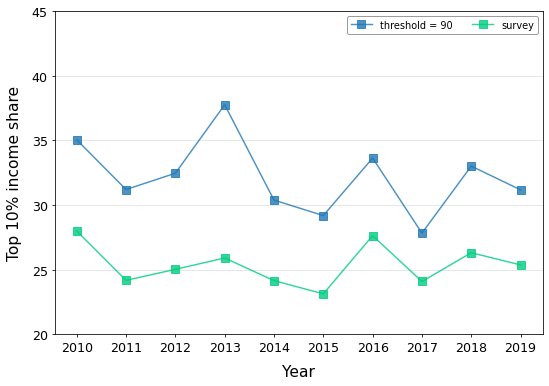

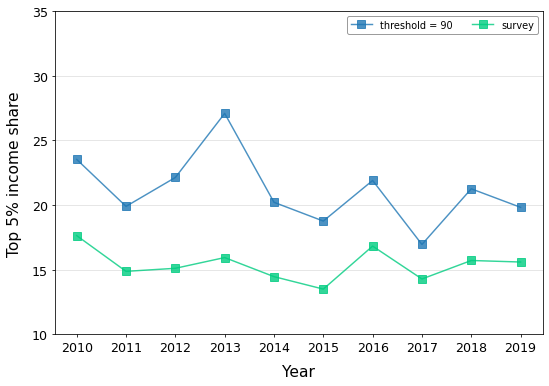

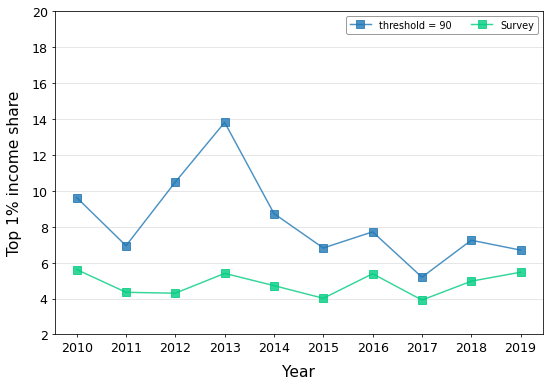

In [51]:
# Tehran

# different_threshold_of_top_HIES = [85,90,95]

# plot 10P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"10HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareTen,
        label=f"threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"10HalfDecileSurv", 'o-',
        data= shareTen,
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"survey",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 10% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(20,45)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2, ncol=2)

plt.show()
# fig.savefig(f'../Figures/Robustness/Income_shares_by_10percent_Tehran_new.pdf',transparent=True,bbox_inches="tight")






# plot 5P estimated and from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"20HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareFive,
        label=f"threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
#        linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"20HalfDecileSurv", 'o-',
        data= shareFive,
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"survey",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 5% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(10,35)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2, ncol=2)

plt.show()
# fig.savefig(f'../Figures/Robustness/Income_shares_by_5percent_Tehran_new.pdf',transparent=True,bbox_inches="tight")



# plot 1P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"100HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareOne,
        label=f"threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
#        linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"100HalfDecileSurv", 'o-',
        data= shareOne,
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Survey",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 1% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(2,20)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2, ncol=2)

plt.show()
# fig.savefig(f'../Figures/Robustness/Income_shares_by_1percent_Tehran_new.pdf',transparent=True,bbox_inches="tight")





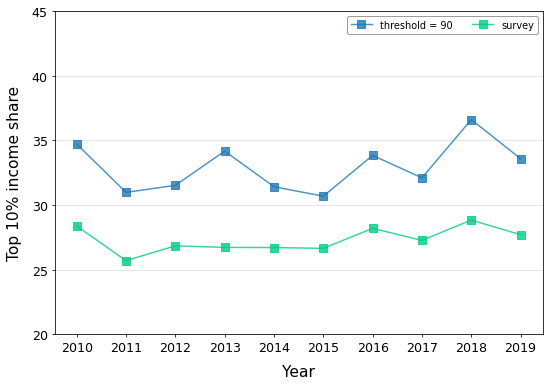

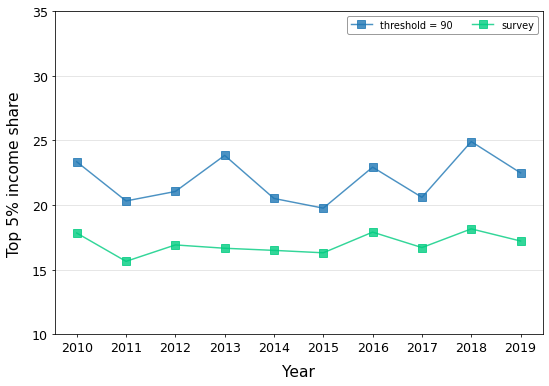

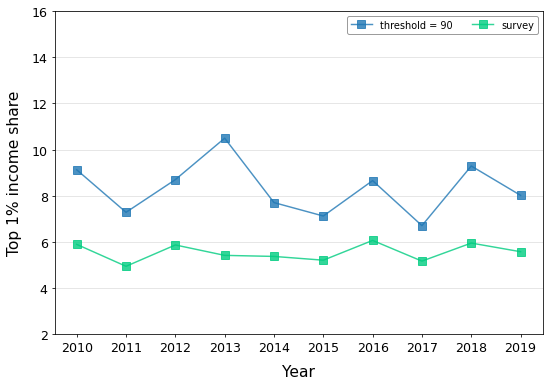

In [52]:
# Iran
# plot 10P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"10HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareTenIran,
        label=f"threshold = {tauThreshold}",
        # marker = markerShape[0],
        marker = markerShape[nmr+1],
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"10HalfDecileSurv", 'o-',
        data= shareTenIran,
        # color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"survey",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 10% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(20,45)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2, ncol=2)

plt.show()
# fig.savefig(f'../Figures/Robustness/Income_shares_by_10percent_Iran_new.pdf',transparent=True,bbox_inches="tight")



# plot 5P estimated and from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"20HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareFiveIran,
        label=f"threshold = {tauThreshold}",
        # marker = markerShape[0],
        marker = markerShape[nmr+1],
        # linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"20HalfDecileSurv", 'o-',
        data= shareFiveIran,
        # color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"survey",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 5% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(10,35)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2, ncol=2)

plt.show()
# fig.savefig(f'../Figures/Robustness/Income_shares_by_5percent_Iran_new.pdf',transparent=True,bbox_inches="tight")


# plot 1P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"100HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareOneIran,
        label=f"threshold = {tauThreshold}",
        # marker = markerShape[0],
        marker = markerShape[nmr+1],
        # linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"100HalfDecileSurv", 'o-',
        data= shareOneIran,
        # color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"survey",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 1% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(2,16)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2, ncol=2)

plt.show()
# fig.savefig(f'../Figures/Robustness/Income_shares_by_1percent_Iran_new.pdf',transparent=True,bbox_inches="tight")

In [53]:
decileEst = share[["year","1DecileEst","2DecileEst","3DecileEst","4DecileEst","5DecileEst",
                   "6DecileEst","7DecileEst","8DecileEst","9DecileEst","10DecileEst"]]

decileEst["year"] = year_list

decileEst["Top5"] = shareFive["20HalfDecileEst"]	
decileEst["Top1"] = shareOne["100HalfDecileEst"]	
summary_statistics = decileEst.round(decimals=3)
summary_statistics["year"] = year_list           
# summary_statistics.to_clipboard(index=False,header=None)

print(summary_statistics.to_latex(header=True,index=False, float_format="{:0.2f}".format))

decileEst["year"] = year_list
decileEst

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
year & 1DecileEst & 2DecileEst & 3DecileEst & 4DecileEst & 5DecileEst & 6DecileEst & 7DecileEst & 8DecileEst & 9DecileEst & 10DecileEst & Top5 & Top1 \\
\midrule
2010 & 1.98 & 3.26 & 4.01 & 4.69 & 5.60 & 6.85 & 9.53 & 12.43 & 16.61 & 35.05 & 23.53 & 9.62 \\
2011 & 2.39 & 3.69 & 4.47 & 5.19 & 6.08 & 7.55 & 9.87 & 12.84 & 16.72 & 31.20 & 19.90 & 6.94 \\
2012 & 2.62 & 3.77 & 4.60 & 5.42 & 6.32 & 7.55 & 9.64 & 12.26 & 15.35 & 32.47 & 22.14 & 10.49 \\
2013 & 2.38 & 3.38 & 4.03 & 4.68 & 5.54 & 6.63 & 8.52 & 11.65 & 15.44 & 37.76 & 27.09 & 13.80 \\
2014 & 2.70 & 3.82 & 4.55 & 5.37 & 6.40 & 7.76 & 9.90 & 13.20 & 15.92 & 30.39 & 20.22 & 8.73 \\
2015 & 2.67 & 3.94 & 4.72 & 5.54 & 6.53 & 7.86 & 10.34 & 13.04 & 16.19 & 29.19 & 18.77 & 6.81 \\
2016 & 2.30 & 3.42 & 4.15 & 4.98 & 5.81 & 6.97 & 8.83 & 12.82 & 17.08 & 33.63 & 21.90 & 7.71 \\
2017 & 2.39 & 3.56 & 4.50 & 5.46 & 6.70 & 8.20 & 10.74 & 13.59 & 17.02 & 27.84 & 16.96 & 5.19 \\
2018 & 1.98 & 2.95 & 3.74 

,year,1DecileEst,2DecileEst,3DecileEst,4DecileEst,5DecileEst,6DecileEst,7DecileEst,8DecileEst,9DecileEst,10DecileEst,Top5,Top1
0,2010,1.976,3.261,4.007,4.689,5.601,6.847,9.533,12.432,16.607,35.048,23.531,9.620
1,2011,2.392,3.687,4.466,5.188,6.083,7.551,9.867,12.844,16.717,31.204,19.902,6.939
2,2012,2.617,3.774,4.596,5.425,6.324,7.548,9.639,12.259,15.354,32.465,22.136,10.489
3,2013,2.375,3.377,4.028,4.678,5.536,6.632,8.520,11.654,15.442,37.758,27.090,13.805
4,2014,2.700,3.819,4.549,5.365,6.402,7.761,9.904,13.195,15.919,30.388,20.218,8.728
5,2015,2.673,3.937,4.716,5.540,6.525,7.855,10.339,13.037,16.189,29.191,18.766,6.813
6,2016,2.300,3.417,4.150,4.978,5.813,6.971,8.833,12.820,17.084,33.635,21.904,7.712
7,2017,2.388,3.564,4.500,5.460,6.701,8.198,10.736,13.591,17.025,27.836,16.958,5.188
8,2018,1.982,2.952,3.736,4.662,5.732,7.506,10.358,12.900,17.154,33.018,21.261,7.245
9,2019,2.345,3.519,4.318,5.218,6.181,7.541,9.795,12.995,16.909,31.178,19.829,6.696


In [54]:
decileSurv = share[["year","1DecileSurv","2DecileSurv","3DecileSurv","4DecileSurv","5DecileSurv",
                   "6DecileSurv","7DecileSurv","8DecileSurv","9DecileSurv","10DecileSurv"]]

decileSurv["year"] = year_list

decileSurv["Top5"] = shareFive["20HalfDecileSurv"]	
decileSurv["Top1"] = shareOne["100HalfDecileSurv"]	

summary_statistics = decileSurv.round(decimals=3)
# summary_statistics.to_clipboard(index=False,header=None)

print(summary_statistics.to_latex(header=True,index=False, float_format="{:0.2f}".format, column_format='ccccccccc'))
decileSurv["year"] = year_list
decileSurv

\begin{tabular}{ccccccccc}
\toprule
year & 1DecileSurv & 2DecileSurv & 3DecileSurv & 4DecileSurv & 5DecileSurv & 6DecileSurv & 7DecileSurv & 8DecileSurv & 9DecileSurv & 10DecileSurv & Top5 & Top1 \\
\midrule
2010 & 2.76 & 4.56 & 5.56 & 6.46 & 7.27 & 8.34 & 9.81 & 11.80 & 15.44 & 28.00 & 17.64 & 5.62 \\
2011 & 3.21 & 5.05 & 5.97 & 6.87 & 7.67 & 8.87 & 10.39 & 12.37 & 15.40 & 24.19 & 14.88 & 4.35 \\
2012 & 3.39 & 4.91 & 5.86 & 6.69 & 7.76 & 8.83 & 10.19 & 12.08 & 15.26 & 25.03 & 15.12 & 4.30 \\
2013 & 3.46 & 4.89 & 5.71 & 6.54 & 7.40 & 8.59 & 10.11 & 12.08 & 15.29 & 25.91 & 15.95 & 5.40 \\
2014 & 3.51 & 4.93 & 5.79 & 6.60 & 7.67 & 8.84 & 10.43 & 12.49 & 15.57 & 24.16 & 14.47 & 4.72 \\
2015 & 3.35 & 4.97 & 5.88 & 6.73 & 7.76 & 8.93 & 10.48 & 12.71 & 16.04 & 23.14 & 13.51 & 4.01 \\
2016 & 3.10 & 4.59 & 5.50 & 6.43 & 7.43 & 8.47 & 9.86 & 11.75 & 15.23 & 27.64 & 16.83 & 5.38 \\
2017 & 3.12 & 4.52 & 5.63 & 6.66 & 7.75 & 9.12 & 10.68 & 12.70 & 15.72 & 24.09 & 14.29 & 3.92 \\
2018 & 2.89 & 4.29

,year,1DecileSurv,2DecileSurv,3DecileSurv,4DecileSurv,5DecileSurv,6DecileSurv,7DecileSurv,8DecileSurv,9DecileSurv,10DecileSurv,Top5,Top1
0,2010,2.761,4.560,5.560,6.455,7.270,8.341,9.810,11.798,15.443,28.003,17.641,5.615
1,2011,3.205,5.053,5.970,6.871,7.674,8.874,10.394,12.368,15.404,24.186,14.879,4.346
2,2012,3.386,4.905,5.861,6.688,7.765,8.831,10.188,12.084,15.258,25.034,15.115,4.297
3,2013,3.464,4.893,5.713,6.540,7.403,8.592,10.109,12.083,15.289,25.913,15.945,5.400
4,2014,3.514,4.928,5.786,6.604,7.674,8.841,10.434,12.486,15.569,24.163,14.471,4.719
5,2015,3.355,4.974,5.885,6.726,7.757,8.931,10.485,12.709,16.038,23.141,13.508,4.014
6,2016,3.101,4.592,5.501,6.427,7.428,8.466,9.859,11.752,15.234,27.641,16.832,5.380
7,2017,3.124,4.524,5.627,6.656,7.747,9.124,10.679,12.704,15.719,24.095,14.289,3.916
8,2018,2.893,4.287,5.210,6.213,7.286,8.653,10.302,12.579,16.257,26.319,15.719,4.965
9,2019,3.144,4.544,5.619,6.539,7.638,8.827,10.300,12.457,15.555,25.375,15.601,5.466


In [55]:
# summary_statistics_total = decileEst.round(decimals=3)*100
# print(summary_statistics_total.to_latex(header=True,index=False, float_format="{:0.2f}".format, column_format='ccccccccc'))
# summary_statistics_total["year"] = year_list
# decileEst*100

In [56]:
Iran

,year,lambdaSurvey,lambda,sSurvey,s,GiniSurvey,Gini
0,1389,11.819,9.997,19.730,34.712,38.752,44.906
1,1390,11.279,7.804,14.398,26.677,34.939,39.968
2,1391,13.462,7.674,16.871,27.027,35.381,39.870
3,1392,13.837,7.106,15.220,28.693,35.113,41.925
4,1393,13.152,7.051,14.546,25.487,35.653,40.090
5,1394,16.223,7.982,17.162,26.673,35.819,39.641
6,1395,9.893,5.348,12.637,23.845,37.682,42.790
7,1396,13.440,7.778,15.232,27.488,37.383,41.915
8,1397,12.979,7.154,14.587,30.497,38.697,45.700
9,1398,13.845,6.835,14.526,27.113,37.764,43.008


In [57]:
result

,year,lambdaHouseSurv01,lambdaHouse01,lambdaSurvey01,lambda01,GiniSurvey01,Gini01_90,sSurvey01,s01,Gini
0,1389,11.355,28.867,11.820,31.031,35.321,46.164,31.276,65.217,0.462
1,1390,10.615,27.648,11.279,30.319,31.107,41.750,26.474,61.121,0.418
2,1391,12.273,26.355,13.462,28.456,31.521,41.429,30.852,58.322,0.414
3,1392,11.903,25.805,13.837,29.495,32.533,47.017,32.474,64.366,0.470
4,1393,10.137,24.625,13.152,29.611,31.224,40.298,29.573,59.105,0.403
5,1394,13.714,25.999,16.223,31.385,30.712,39.077,33.604,60.098,0.391
6,1395,11.355,25.392,9.893,23.777,34.471,44.447,27.420,55.977,0.444
7,1396,10.035,27.860,13.440,32.487,32.116,39.346,30.106,61.557,0.393
8,1397,13.408,32.642,12.979,32.946,35.075,45.365,31.624,66.360,0.454
9,1398,10.876,25.682,13.845,30.428,33.059,42.079,31.933,61.593,0.421


In [58]:
Tehra_output = result[["year","lambdaSurvey01","lambda01","sSurvey01","s01","GiniSurvey01",f"Gini01_{different_threshold_of_top_HIES[0]}"]]
Tehra_output.columns = Iran.columns
# print(Tehra_output.to_latex(header=True,index=False))
Tehra_output

,year,lambdaSurvey,lambda,sSurvey,s,GiniSurvey,Gini
0,1389,11.820,31.031,31.276,65.217,35.321,46.164
1,1390,11.279,30.319,26.474,61.121,31.107,41.750
2,1391,13.462,28.456,30.852,58.322,31.521,41.429
3,1392,13.837,29.495,32.474,64.366,32.533,47.017
4,1393,13.152,29.611,29.573,59.105,31.224,40.298
5,1394,16.223,31.385,33.604,60.098,30.712,39.077
6,1395,9.893,23.777,27.420,55.977,34.471,44.447
7,1396,13.440,32.487,30.106,61.557,32.116,39.346
8,1397,12.979,32.946,31.624,66.360,35.075,45.365
9,1398,13.845,30.428,31.933,61.593,33.059,42.079


In [59]:
Tehra_output["gap"] = Tehra_output.Gini-Tehra_output.GiniSurvey
Tehra_output.gap.mean()

9.983136125027826

In [60]:
Tehra_output

,year,lambdaSurvey,lambda,sSurvey,s,GiniSurvey,Gini,gap
0,1389,11.820,31.031,31.276,65.217,35.321,46.164,10.842
1,1390,11.279,30.319,26.474,61.121,31.107,41.750,10.643
2,1391,13.462,28.456,30.852,58.322,31.521,41.429,9.908
3,1392,13.837,29.495,32.474,64.366,32.533,47.017,14.484
4,1393,13.152,29.611,29.573,59.105,31.224,40.298,9.073
5,1394,16.223,31.385,33.604,60.098,30.712,39.077,8.365
6,1395,9.893,23.777,27.420,55.977,34.471,44.447,9.976
7,1396,13.440,32.487,30.106,61.557,32.116,39.346,7.230
8,1397,12.979,32.946,31.624,66.360,35.075,45.365,10.290
9,1398,13.845,30.428,31.933,61.593,33.059,42.079,9.020


In [465]:
#Iran
# print(Iran.to_latex(header=True,index=False))

In [466]:
Iran["gap"] = Iran.Gini-Iran.GiniSurvey
print(Iran.gap.mean())
Iran.drop(columns=["gap"],inplace=True)

5.523133960595656


In [467]:
""" 
    year landa_survey landa s_survey s
"""
result["dist"] = ""
result_word_report = pd.merge(
    result[["year","lambdaSurvey01","lambda01","sSurvey01","s01", "dist"]]
    ,Iran[["year","lambdaSurvey","lambda","sSurvey","s"]]
    ,on=["year"]
)

result_word_report["year"] = year_list
summary_statistics = result_word_report.round(decimals=2)
summary_statistics.to_clipboard(index=False,header=None)

print(summary_statistics.to_latex(header=True,index=False, float_format="{:0.2f}".format, column_format='ccccccccc'))

result_word_report

\begin{tabular}{ccccccccc}
\toprule
year & lambdaSurvey01 & lambda01 & sSurvey01 & s01 & dist & lambdaSurvey & lambda & sSurvey & s \\
\midrule
2010 & 11.70 & 31.96 & 31.02 & 65.77 &  & 11.70 & 10.16 & 19.55 & 34.97 \\
2011 & 11.48 & 30.43 & 26.79 & 61.01 &  & 11.48 & 7.86 & 14.56 & 26.64 \\
2012 & 11.67 & 30.09 & 27.88 & 60.71 &  & 11.67 & 7.53 & 15.09 & 27.77 \\
2013 & 13.84 & 30.93 & 32.47 & 65.74 &  & 13.84 & 7.36 & 15.22 & 29.43 \\
2014 & 11.71 & 31.34 & 27.15 & 60.98 &  & 11.71 & 7.14 & 13.42 & 26.07 \\
2015 & 16.49 & 34.63 & 34.04 & 64.00 &  & 16.49 & 8.65 & 17.49 & 28.67 \\
2016 & 9.81 & 24.00 & 27.29 & 56.19 &  & 9.81 & 5.38 & 12.57 & 23.92 \\
2017 & 13.75 & 33.15 & 30.51 & 62.32 &  & 13.75 & 8.03 & 15.68 & 28.14 \\
2018 & 12.98 & 33.22 & 31.62 & 66.32 &  & 12.98 & 7.20 & 14.59 & 30.39 \\
2019 & 13.35 & 31.02 & 31.21 & 62.34 &  & 13.35 & 6.88 & 14.13 & 27.42 \\
\bottomrule
\end{tabular}



,year,lambdaSurvey01,lambda01,sSurvey01,s01,dist,lambdaSurvey,lambda,sSurvey,s
0,2010,11.702,31.965,31.018,65.773,,11.700,10.156,19.546,34.966
1,2011,11.481,30.427,26.789,61.009,,11.481,7.856,14.557,26.635
2,2012,11.672,30.087,27.882,60.706,,11.672,7.534,15.087,27.769
3,2013,13.837,30.928,32.474,65.743,,13.837,7.357,15.220,29.431
4,2014,11.712,31.339,27.148,60.979,,11.712,7.144,13.420,26.070
5,2015,16.492,34.632,34.035,64.002,,16.492,8.646,17.488,28.675
6,2016,9.815,23.997,27.288,56.194,,9.815,5.377,12.574,23.921
7,2017,13.752,33.155,30.506,62.316,,13.752,8.026,15.676,28.141
8,2018,12.979,33.216,31.624,66.316,,12.979,7.202,14.587,30.389
9,2019,13.349,31.019,31.207,62.338,,13.349,6.880,14.133,27.418


In [468]:
Gini_House_Price = result[["year","GiniSurvey01",f"Gini01_{different_threshold_of_top_HIES[0]}"]]
Gini_House_Price.columns = ["year","Gini_{Survey}","Gini"]
Gini_House_Price["Gap"] = Gini_House_Price["Gini"] - Gini_House_Price["Gini_{Survey}"] 
Gini_House_Price["dist"] = ""

Gini_House_Price = pd.merge(Gini_House_Price,Iran[["year","GiniSurvey","Gini"]],on=["year"])
Gini_House_Price["GapIran"] = Gini_House_Price["Gini_y"] - Gini_House_Price["GiniSurvey"] 

Gini_House_Price = Gini_House_Price.round(decimals=2)
Gini_House_Price["year"] = year_list
print(Gini_House_Price.to_latex(header=True,index=False, float_format="{:0.2f}".format, column_format='cccccc'))

Gini_House_Price.to_clipboard(index=False,header=None)

Gini_House_Price

\begin{tabular}{cccccc}
\toprule
year & Gini_{Survey} & Gini_x & Gap & dist & GiniSurvey & Gini_y & GapIran \\
\midrule
2010 & 35.32 & 44.44 & 9.12 &  & 38.75 & 44.92 & 6.17 \\
2011 & 31.11 & 40.33 & 9.22 &  & 34.94 & 39.83 & 4.89 \\
2012 & 31.52 & 40.44 & 8.92 &  & 35.38 & 40.98 & 5.60 \\
2013 & 32.53 & 46.31 & 13.78 &  & 35.11 & 42.17 & 7.05 \\
2014 & 31.22 & 38.53 & 7.31 &  & 35.65 & 40.56 & 4.90 \\
2015 & 30.71 & 37.72 & 7.00 &  & 35.82 & 40.32 & 4.50 \\
2016 & 34.47 & 43.78 & 9.31 &  & 37.68 & 42.82 & 5.13 \\
2017 & 32.12 & 38.90 & 6.78 &  & 37.38 & 42.02 & 4.64 \\
2018 & 35.08 & 44.49 & 9.42 &  & 38.70 & 45.55 & 6.85 \\
2019 & 33.06 & 41.78 & 8.72 &  & 37.76 & 43.25 & 5.48 \\
\bottomrule
\end{tabular}



,year,Gini_{Survey},Gini_x,Gap,dist,GiniSurvey,Gini_y,GapIran
0,2010,35.320,44.440,9.120,,38.750,44.920,6.170
1,2011,31.110,40.330,9.220,,34.940,39.830,4.890
2,2012,31.520,40.440,8.920,,35.380,40.980,5.600
3,2013,32.530,46.310,13.780,,35.110,42.170,7.050
4,2014,31.220,38.530,7.310,,35.650,40.560,4.900
5,2015,30.710,37.720,7.000,,35.820,40.320,4.500
6,2016,34.470,43.780,9.310,,37.680,42.820,5.130
7,2017,32.120,38.900,6.780,,37.380,42.020,4.640
8,2018,35.080,44.490,9.420,,38.700,45.550,6.850
9,2019,33.060,41.780,8.720,,37.760,43.250,5.480


In [270]:
# table = table.round(decimals=2)
table.drop('lambda_sur', axis=1, inplace=True)
# table.columns = ["year","$\alpha$","$\beta$", "$\lambda$", "$\theta$_{surv}", "$\theta$_{est}"]
table["year"] = year_list
print(table.to_latex(header=True,index=False, float_format="{:0.2f}".format, column_format='cccccc'))


\begin{tabular}{cccccc}
\toprule
year & alpha & beta & lambda_est & theta_surv & theta_est \\
\midrule
2010 & 1.30 & 0.82 & 0.25 & 2.52 & 1.66 \\
2011 & 1.32 & 0.73 & 0.22 & 3.39 & 1.68 \\
2012 & 1.36 & 0.81 & 0.23 & 3.29 & 1.73 \\
2013 & 1.46 & 0.84 & 0.22 & 3.36 & 1.86 \\
2014 & 1.56 & 0.64 & 0.21 & 3.97 & 1.98 \\
2015 & 1.57 & 0.73 & 0.21 & 4.62 & 2.00 \\
2016 & 1.58 & 0.92 & 0.22 & 3.05 & 2.00 \\
2017 & 1.37 & 0.73 & 0.24 & 4.03 & 1.75 \\
2018 & 1.33 & 0.83 & 0.24 & 3.60 & 1.69 \\
2019 & 1.49 & 0.79 & 0.23 & 3.55 & 1.90 \\
\bottomrule
\end{tabular}



the output for microsoft final word report

In [271]:
tau_x0

,year,tau,tau_real,R0,x0
0,1389,68.700,22.800,24.292,68.182
1,1390,68.969,27.809,31.468,90.129
2,1391,73.077,38.464,44.656,150.687
3,1392,70.506,50.000,71.479,269.461
4,1393,70.096,57.442,73.185,313.740
5,1394,71.693,65.753,81.300,327.530
6,1395,80.980,80.980,101.267,332.795
7,1396,83.577,91.600,99.872,310.464
8,1397,86.456,118.704,128.429,523.652
9,1398,77.598,143.788,178.718,987.067


In [272]:
""" 
    year alpha beta theta_hat theta
"""
summary_statistics = alpha_beta_Tehran.round(decimals=2)
summary_statistics.to_clipboard(index=False,header=None)
alpha_beta_Tehran

,year,alpha,beta,theta_hat
0,1389,1.303,0.787,1.655
1,1390,1.318,0.787,1.675
2,1391,1.359,0.787,1.727
3,1392,1.463,0.787,1.859
4,1393,1.558,0.787,1.979
5,1394,1.571,0.787,1.997
6,1395,1.579,0.787,2.007
7,1396,1.375,0.787,1.747
8,1397,1.329,0.787,1.689
9,1398,1.494,0.787,1.898


In [273]:
summary_statistics = summary_statistics.round(decimals=2)
summary_statistics["year"] = year_list
print(summary_statistics.to_latex(header=True,index=False, float_format="{:0.2f}".format, column_format='cccccc'))

summary_statistics.to_clipboard(index=False,header=None)

\begin{tabular}{cccccc}
\toprule
year & alpha & beta & theta_hat \\
\midrule
2010 & 1.30 & 0.79 & 1.66 \\
2011 & 1.32 & 0.79 & 1.68 \\
2012 & 1.36 & 0.79 & 1.73 \\
2013 & 1.46 & 0.79 & 1.86 \\
2014 & 1.56 & 0.79 & 1.98 \\
2015 & 1.57 & 0.79 & 2.00 \\
2016 & 1.58 & 0.79 & 2.01 \\
2017 & 1.37 & 0.79 & 1.75 \\
2018 & 1.33 & 0.79 & 1.69 \\
2019 & 1.49 & 0.79 & 1.90 \\
\bottomrule
\end{tabular}



In [274]:
""" 
    year landa_survey landa s_survey s
"""
result_word_report = pd.merge(
    result[["year","lambdaSurvey01","lambda01","sSurvey01","s01"]]
    ,Iran[["year","lambdaSurvey","lambda","sSurvey","s"]]
    ,on=["year"]
)

summary_statistics = result_word_report.round(decimals=2)
summary_statistics.to_clipboard(index=False,header=None)

print(summary_statistics.to_latex(header=True,index=False, float_format="{:0.2f}".format, column_format='cccccc'))

result_word_report

\begin{tabular}{cccccc}
\toprule
year & lambdaSurvey01 & lambda01 & sSurvey01 & s01 & lambdaSurvey & lambda & sSurvey & s \\
\midrule
1389 & 9.92 & 24.95 & 28.00 & 65.06 & 9.92 & 17.32 & 17.28 & 54.20 \\
1390 & 9.99 & 21.61 & 24.19 & 58.62 & 9.99 & 19.13 & 13.46 & 55.59 \\
1391 & 9.97 & 22.90 & 25.03 & 59.95 & 9.97 & 15.32 & 13.26 & 48.48 \\
1392 & 9.96 & 21.87 & 25.91 & 56.79 & 9.96 & 14.09 & 11.61 & 46.19 \\
1393 & 9.99 & 20.63 & 24.16 & 52.46 & 9.99 & 13.41 & 11.81 & 42.66 \\
1394 & 9.98 & 20.53 & 23.14 & 52.08 & 9.98 & 14.97 & 12.18 & 46.01 \\
1395 & 9.96 & 22.30 & 27.64 & 57.14 & 9.96 & 16.10 & 12.72 & 53.64 \\
1396 & 9.92 & 23.84 & 24.10 & 61.20 & 9.92 & 17.82 & 11.76 & 56.89 \\
1397 & 9.97 & 24.46 & 26.32 & 64.89 & 9.97 & 12.53 & 11.82 & 45.24 \\
1398 & 9.93 & 23.19 & 25.38 & 58.24 & 9.93 & 13.20 & 11.00 & 44.83 \\
\bottomrule
\end{tabular}



,year,lambdaSurvey01,lambda01,sSurvey01,s01,lambdaSurvey,lambda,sSurvey,s
0,1389,9.922,24.953,28.003,65.057,9.921,17.323,17.283,54.199
1,1390,9.987,21.611,24.186,58.621,9.987,19.128,13.462,55.587
2,1391,9.972,22.897,25.034,59.955,9.972,15.320,13.257,48.480
3,1392,9.963,21.870,25.913,56.791,9.963,14.091,11.611,46.191
4,1393,9.992,20.631,24.163,52.457,9.992,13.406,11.810,42.663
5,1394,9.983,20.528,23.141,52.081,9.983,14.975,12.178,46.005
6,1395,9.964,22.303,27.641,57.141,9.964,16.104,12.718,53.641
7,1396,9.921,23.840,24.095,61.198,9.921,17.824,11.757,56.889
8,1397,9.975,24.462,26.319,64.890,9.975,12.533,11.823,45.244
9,1398,9.931,23.186,25.375,58.239,9.931,13.198,11.000,44.831


Gini coefficient of whole country

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

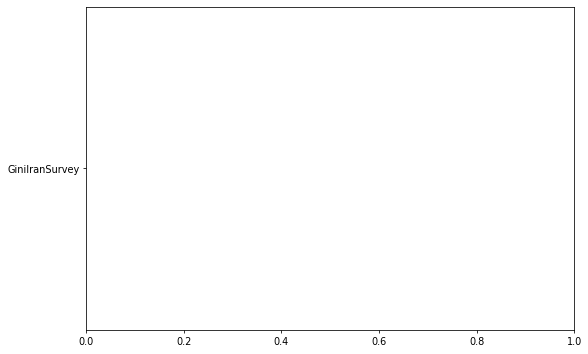

In [141]:
## plot gini estimated and gini from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)


ax1.plot('year', 'GiniIranSurvey', 's-',
        data= result,
        color=(0.1,0.1,0.9,0.9),
        label='Gini_Survey',
        marker = markerShape[0],
        linewidth=1,
        alpha=0.8)


ax1.plot("year", f"GiniIran_{tauThreshold}", 'o-',
        data= result,
        color= (0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Gini_Estimated",
        linewidth=1,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
# ax1.set_title(f'year {1300+year}')
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Gini Index',
               fontsize=16, labelpad=10)
ax1.legend(loc='best')
# ax1.set_ylim(0.314,0.445)
# ax1.set_yticks(np.arange(0.32,0.45,0.02))
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.show()
#fig.savefig(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Reports/LaTex/Topincomes/Figures/General/Gini_Iran_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")
# fig.savefig(f'Figures/{figuresFolder}/Gini_Iran_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")


In [253]:
ll = ["dashed","dotted","dashdot"]

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

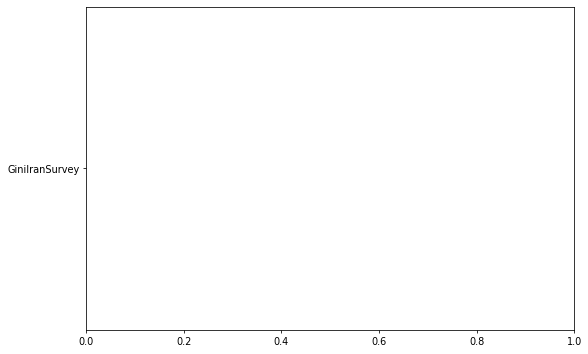

In [254]:
## plot gini estimated and gini from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)


ax1.plot('year', 'GiniIranSurvey', 's-',
        data= result,
        color=(0.1,0.1,0.9,0.9),
        label='Gini_Survey',
        marker = markerShape[0],
        linewidth=1,
        alpha=0.8)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"GiniIran_{tauThreshold}", 'o-',
            data= result,
            # color= (0,0.8,0.5,0.8),
            marker = markerShape[nmr+1],
            label= f"Gini estimated threshold = {tauThreshold}",
            linewidth=2,
            linestyle=ll[nmr] ,
            alpha=0.8)

# ax1.fill_between('year', 'Gini_lower', 'Gini_upper'
#                  ,data= result
#                  ,color=(0,0.8,0.5,0.15)
#                  ,linewidth= 1)

ax1.grid(axis='y',alpha=0.4)
# ax1.set_title(f'year {1300+year}')
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Gini Index',
               fontsize=16, labelpad=10)
ax1.legend(loc='best')
# ax1.set_ylim(0.314,0.445)
# ax1.set_yticks(np.arange(0.32,0.45,0.02))
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=4.2)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim(34,42)
plt.show()
#fig.savefig(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Reports/LaTex/Topincomes V3/Figures/General/sensitivity_tau_Gini_Iran_Daramad_98.pdf',transparent=True,bbox_inches="tight")

#fig.savefig(f'../Figures/Robustness/sensitivity_tau_Gini_Iran_{figuresFolder}_{year-1300}.pdf',transparent=True,bbox_inches="tight")


Gini coefficient of Tehran Province

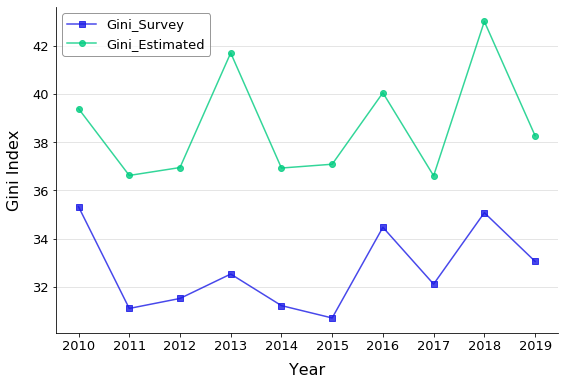

In [108]:
## plot gini estimated and gini from survey ##
prov = "23"

for prov in province_set:
    provName = next(key for key, value in provinceCodeEng.items() if value == prov)
    
    fig=plt.figure(figsize=(9,6))
    ax1=fig.add_subplot(1,1,1)


    ax1.plot('year', 'GiniSurvey'+prov, 's-',
            data= result,
            color=(0.1,0.1,0.9,0.9),
            label='Gini_Survey',
            alpha=0.8)

    ax1.plot("year", "Gini"+prov+f"_{different_threshold_of_top_HIES[0]}", 'o-',
            data= result,
            color= (0,0.8,0.5,0.8),
            label= "Gini_Estimated",
            alpha=0.8)

#     ax1.fill_between('year', 'Gini_lower', 'Gini_upper'
#                      ,data= result
#                      ,color=(0,0.8,0.5,0.15)
#                      ,linewidth= 1)

    ax1.grid(axis='y',alpha=0.4)
    # ax1.set_title(f'year {1300+year}')
    ax1.set_xlabel('Year', fontsize=16, labelpad=10)
    ax1.set_ylabel('Gini Index',
                   fontsize=16, labelpad=10)
    ax1.legend(loc='best')
    # ax1.set_ylim(0.314,0.445)
    # ax1.set_yticks(np.arange(0.32,0.45,0.02))
    ax1.set_xticks(np.arange(1389,1399,1))
    ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
    # ax1.set_title(provName)
    ax1.tick_params(labelsize=13)
    ax1.legend(loc='best',edgecolor='gray',prop={'size':13}, handlelength=2.2)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    plt.show()
#fig.savefig(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Reports/LaTex/Topincomes/Figures/General/Gini_Tehran_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")
    
# fig.savefig(f'Figures/{figuresFolder}/Gini_Tehran_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")


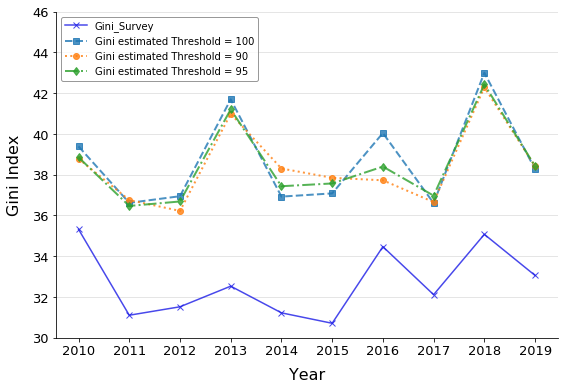

In [109]:
## plot gini estimated and gini from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)


ax1.plot('year', 'GiniSurvey23', 's-',
        data= result,
        color=(0.1,0.1,0.9,0.9),
        label='Gini_Survey',
        marker = markerShape[0],
#         linewidth=1,
        alpha=0.8)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"Gini23_{tauThreshold}", 'o-',
            data= result,
#             color= (0,0.8,0.5,0.8),
            marker = markerShape[nmr+1],
             linestyle=ll[nmr] ,
            label= f"Gini estimated Threshold = {tauThreshold}",
            linewidth=2,
            alpha=0.8)

# ax1.fill_between('year', 'Gini_lower', 'Gini_upper'
#                  ,data= result
#                  ,color=(0,0.8,0.5,0.15)
#                  ,linewidth= 1)

ax1.grid(axis='y',alpha=0.4)
# ax1.set_title(f'year {1300+year}')
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Gini Index',
               fontsize=16, labelpad=10)
ax1.legend(loc='best')
# ax1.set_ylim(0.314,0.445)
# ax1.set_yticks(np.arange(0.32,0.45,0.02))
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim(30,46)

plt.show()
#fig.savefig(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Reports/LaTex/Topincomes V3/Figures/General/sensitivity_tau_Gini_Tehran_Daramad_98.pdf',transparent=True,bbox_inches="tight")

#fig.savefig(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Figures/Robustness/sensitivity_tau_Gini_Tehran_Daramad_98.pdf',transparent=True,bbox_inches="tight")


In [110]:
# ## plot top 20 share  ##

# fig=plt.figure(figsize=(9,6))
# ax1=fig.add_subplot(1,1,1)


# ax1.plot('year', 'Top20ShareSurvey', 's-',
#         data= result,
#         color=(0.1,0.1,0.9,0.9),
#         label='Top 20  share - Suvey',
#         alpha=0.8)

# ax1.plot("year", "Top20Share", 'o-',
#         data= result,
#         color= (0,0.8,0.5,0.8),
#         label= "Top 20 share - Estimated",
#         alpha=0.8)

# ax1.grid(axis='y',alpha=0.4)
# # ax1.set_title(f'year {1300+year}')
# ax1.set_xlabel('Year', fontsize=14, labelpad=10)
# ax1.set_ylabel('Top 20 share of total',
#                fontsize=13, labelpad=10)
# ax1.legend(loc='best')
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# # ax1.set_ylim(0.405,0.495)
# # ax1.set_yticks(np.arange(0.41,0.49,0.01))
# ax1.set_xticks(np.arange(1389,1399,1))
# #ax1.set_xticklabels(np.arange(0.8,0.98,0.02)*100)
# # ax1.tick_params(labelsize=13)
# # ax1.legend(loc='upper left')
# plt.show()
# # fig.savefig('figures/Tehran(89-95)/Hazineh/Top20ShareTehranUrban(89-95).pdf',transparent=True)
# # fig.savefig('figures/top20.pdf',transparent=True,bbox_inches="tight")

In [111]:
# ## plot top 20 to low 20  ##

# fig=plt.figure(figsize=(9,6))
# ax1=fig.add_subplot(1,1,1)


# ax1.plot('year', 'Top20toLow20Survey', 's-',
#         data= result,
#         color=(0.1,0.1,0.9,0.9),
#         label='20:20 ratio Survey',
#         alpha=0.8)

# ax1.plot("year", "Top20toLow20", 'o-',
#         data= result,
#         color= (0,0.8,0.5,0.8),
#         label= "20:20 ratio Estimated",
#         alpha=0.8)

# ax1.grid(axis='y',alpha=0.4)
# # ax1.set_title(f'year {1300+year}')
# ax1.set_xlabel('Year', fontsize=14, labelpad=10)
# ax1.set_ylabel('Top 20 to Low 20 share',
#                fontsize=13, labelpad=10)
# ax1.legend(loc='best')
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)
# # ax1.set_ylim(4.8,8.6)
# # ax1.set_yticks(np.arange(5,8.6,0.5))
# ax1.set_xticks(np.arange(1389,1399,1))
# #ax1.set_xticklabels(np.arange(0.8,0.98,0.02)*100)
# # ax1.tick_params(labelsize=13)
# # ax1.legend(loc='upper left')
# plt.show()
# # fig.savefig('figures/Tehran(89-95)/Hazineh/Top20toLow20TehranUrbanDaramad(89-95).pdf',transparent=True)
# # fig.savefig('figures/2020.pdf',transparent=True,bbox_inches="tight")

In [112]:
# hatch=['xx', '//', '++', '..', '||','--']

# fig=plt.figure(figsize=(7,6))
# ax1 = fig.add_subplot(111)


# for index, decile in enumerate([1,2,3,4,5]):
#      ax1.bar(share.year,share[f"{decile}"],
#             label= f"{decile}" ,
#             width=0.9, 
# #             color='w', 
# #             hatch=hatch[index],
#             bottom=share.iloc[:,np.arange(1,decile)].sum(axis=1),
#             alpha=0.6)       

# # ax1.set_title(f'{gender} born in {cohort}',fontsize=17)
# ax1.set_xlabel('year',fontsize=13)
# ax1.set_ylabel('share of each fifth',fontsize=13)
# ax1.set_xticks(np.arange(1389,1399,1))
# # ax1.set_xlim(17.4,40.6)
# # ax1.set_yticks(np.arange(0,1.001,0.1))#,fontweight='bold')
# lgd=ax1.legend(loc='center left',edgecolor='black',prop={'size':12}
#           , bbox_to_anchor=(1, 0.5),ncol=1, handlelength=2.5,handleheight=1.5)


# plt.show()
# #fig.savefig('figures/Tehran(89-95)/Share(89-95).pdf',transparent=True)

# Robustness: House Rent

In [67]:


""" welfare criterion considered for measuring inequality indices """
criterion = 0
"""
    If 0 : Daramad
    If 1 : GHazineh / np.sqrt(tedad)
    If 2 : GHazineh
"""
""" Initialize the Output dataframes """
result = np.zeros(shape=(10,1))
result = pd.DataFrame(result, columns=["year"])
result.year = np.arange(1389,1399)

Iran = result.copy()
alpha_beta_Tehran = result.copy()
tau_x0 = result.copy()

share = np.zeros(shape=(10,6))
share = pd.DataFrame(result, columns=["year","1","2","3","4","5"])
share.year = np.arange(1389,1399)


shareTen=np.zeros(shape=(10,10))
shareTen=pd.DataFrame(result, columns=["year"])
shareTen.year = np.arange(1389,1399)

shareFive=np.zeros(shape=(10,10))
shareFive=pd.DataFrame(result, columns=["year"])
shareFive.year = np.arange(1389,1399)

shareOne=np.zeros(shape=(10,10))
shareOne=pd.DataFrame(result, columns=["year"])
shareOne.year = np.arange(1389,1399)

shareTenIran=np.zeros(shape=(10,10))
shareTenIran=pd.DataFrame(result, columns=["year"])
shareTenIran.year = np.arange(1389,1399)

shareFiveIran=np.zeros(shape=(10,10))
shareFiveIran=pd.DataFrame(result, columns=["year"])
shareFiveIran.year = np.arange(1389,1399)

shareOneIran=np.zeros(shape=(10,10))
shareOneIran=pd.DataFrame(result, columns=["year"])
shareOneIran.year = np.arange(1389,1399)

""" Define new vaiables: """
if   criterion == 0 :
    expenditureTotal['hazinehPerCapita'] = expenditureTotal.realDaramad #/ expenditureTotal.tedad
#     expenditureTotal["weight"] = expenditureTotal.weight * expenditureTotal.tedad

    figuresFolder = "Daramad"

    # elif criterion == 1 :
#     expenditureTotal['hazinehPerCapita'] = expenditureTotal.GHazineh/np.sqrt(expenditureTotal.tedad)
#     figuresFolder = "GHazinehPerCapita"
# elif criterion == 2 :
#     expenditureTotal['hazinehPerCapita'] = expenditureTotal.GHazineh
    
expenditureTotal['LnHazineh']= np.log(expenditureTotal.hazinehPerCapita)

# expenditureTotal['rent']= expenditureTotal['rent'] * 12
expenditureTotal['LnRent']= np.log(expenditureTotal.rent)#/expenditureTotal.area)

"""--------------------------------------------------------------------"""
""" LET'S GO """

different_threshold_of_top_HIES = [100,90,95] #[95]

for tauThreshold in different_threshold_of_top_HIES: 
    for year in np.arange(89,99):

        """
            Estimating theta from survey    
        """
        expenditure = expenditureTotal.loc[(expenditureTotal.year==year),:]

        expenditure = expenditure.loc[(expenditure.hazinehPerCapita.notna())
                                     &(expenditure.weight.notna()),:]

        """ calculating empirical cumulative density function """
        expenditure.sort_values(by=["province","hazinehPerCapita"],inplace=True)
        expenditure['Fy'] = expenditure.groupby('province')['weight'].transform(pd.Series.cumsum)
        expenditure['countProv']=expenditure.groupby('province')['weight'].transform(pd.Series.sum)
        expenditure['Fy'] = expenditure.Fy/expenditure.countProv
        expenditure.drop(columns=["countProv"], inplace=True)

        """-------------------------------------------------"""
        PTotal = 0
        sTotal = 0
        landaTotal = 0
        Sample = pd.DataFrame([])

        for flag, prov in enumerate(province_set):
            provName = next(key for key, value in provinceCodeEng.items() if value == prov)

            Tehran= expenditure[expenditure.province == prov]
            
            
            """-----------------------------------------
                             Theta    
            -----------------------------------------"""
            '''
                calculating theta from data ##
                theta: top income pareto tail index
                for different top share of data
            '''
            space=np.arange(0.8, 0.99, 0.01)
            theta=np.zeros(shape=(19,6))

            if Tehran.shape[0]==0:
                break

            for index,topPercentile in enumerate(space):


                T= Tehran[Tehran.Fy> topPercentile]

                if T.shape[0]==0:
                    break

                T= T.sort_values(by= ['hazinehPerCapita'])
                T.reset_index(inplace=True, drop=True)
                T['F2y']=T.weight.cumsum() 
                T['F2y']=T.F2y / T.weight.sum()
                T.drop(T.tail(1).index,inplace=True)
                T['Xvariable']= -np.log(1-T['F2y'])        

                """-------------------------------------------------"""
                results = mt.reg(
                T,                     # DataFrame
                'LnHazineh',           # Dependent var (string)
                'Xvariable',           # Independent var(s) (string or list of strings)
                addcons=True,
                awt_name='weight'     # Sample weights
                )

                """ save the coefficient to the data frame """
                theta[index,0]=topPercentile
                theta[index,1]= 1/results.beta['Xvariable']
                se=results.se['Xvariable']
                theta[index,4]= se

                theta[index,2]= 1/(results.beta['Xvariable']+ 1.6*se)
                theta[index,3]= 1/(results.beta['Xvariable']- 1.6*se) 
                
                theta[index,5]= T.hazinehPerCapita.min()/1e7

            

            """ plot theta for different top share """ 
            # fig=plt.figure(figsize=(9,6))
            # ax1=fig.add_subplot(1,1,1)
            # ax1.plot(theta[:,0], theta[:,1], color=(0,0,0,1))
            # # hline=ax1.hlines(theta[:,1].mean(), space[0], space[-1] , linestyles='--', color=(0, 0.4 ,1, 0.9))
            # ax1.fill_between(theta[:,0], theta[:,2],theta[:,3], color=(0,0,0,0.192)
            #                 ,linewidth= 1)
            # ax1.grid(axis='y')
            # # ax1.set_title(f'Figure 2:  Pareto tail index estimates for household expenditure per capita in Tehran')
            # ax1.set_xlabel(r'Percentile', fontsize=14,labelpad=10)
            # ax1.set_ylabel(r'$ \theta $ (from survey)' , fontsize=14,labelpad=10)
            # ax1.tick_params(labelsize=13)
            # plt.show()
            # #fig.savefig('figures/khousheh/theta_khousheh2D7.pdf',transparent=True)



            """-----------------------------------------
                calculating alpha from house price data    
            -----------------------------------------"""
    
            new = HouseRentTotal.loc[HouseRentTotal.year==(1300+year),:]
#             HouseRent = HouseRent.loc[(HouseRent.prov=="تهران")]

            new["weight"] = 1
        

            """ define new variables """
            new["LnPrice"] = np.log(new.FullMortgage)
            
            # new.sort_values(by=["prov","FullMortgage"],inplace=True)
            # new['Gy'] = new.groupby('prov')['weight'].transform(pd.Series.cumsum)
            # new['countProv']=new.groupby('prov')['weight'].transform(pd.Series.sum)
            # new['Gy'] = new.Gy/new.countProv
            # new.drop(columns=["countProv"],inplace=True)

            # new = new[new.Gy<=0.9995]
            

            """ 
                calculating alpha from data 
                alpha: top house price data pareto tail index
                for different top share of data
            """
            space=np.arange(0.8, 0.99, 0.01)
            alpha=np.zeros(shape=(19,5))

            for index,topPercentile in enumerate(space):
                
                Rent_Top_Incomes_HIES = Tehran.loc[
                     (Tehran.Fy> (topPercentile-0.02) )
                    &(Tehran.Fy< (topPercentile+0.02) ), "rent"].mean()
            
                # Price_to_Mortgage_Ratio = price_rent_ratio.loc[
                #     (price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]
                TopRentmean=  Rent_Top_Incomes_HIES * (100/3) / 10000000 
            
                # N=new[new.Gy>topPercentile]
                N = new[new.FullMortgage >= TopRentmean]
                N.sort_values('FullMortgage',inplace=True)
                N.reset_index(drop=True, inplace=True)

                N['G2y']=(N.index+1) / (N['FullMortgage'].count())  
                N.drop(N.tail(1).index,inplace=True)
                N['Xvariable']= -np.log(1-N['G2y'])     
                """ dropping nan, inf from data to avoid error in regression """
                N.replace(np.inf , np.nan,inplace=True)
                N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

                x=N['Xvariable']
                y=N['LnPrice']

                results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
                alpha[index,0]=topPercentile
                alpha[index,1]= 1/results.params[1]
                se=results.bse[1]
                alpha[index,4]=se
                alpha[index,2]= 1/(results.params[1]+ 1.6*se)
                alpha[index,3]= 1/(results.params[1]- 1.6*se)



            """-----------------------------------------
                    calculating beta from survey    
            -----------------------------------------"""

            space=np.arange(0.8, 0.99, 0.01)
            beta=np.zeros(shape=(19,5))

            for index,topPercentile in enumerate(space):
                
                Rent_Top_Incomes_HIES = Tehran.loc[
                     (Tehran.Fy> (topPercentile-0.02) )
                    &(Tehran.Fy< (topPercentile+0.02) ), "rent"].mean()
                
                top_rent = Tehran[Tehran['rent']>=Rent_Top_Incomes_HIES]
                
                ###### droping 5 highest rent in data 
#                 top_rent.sort_values(by=["rent"], inplace=True)
#                 top_rent.reset_index(inplace=True)
#                 top_rent = top_rent.iloc[0:-6, :]
                
                x=top_rent['LnRent']
                y=top_rent['LnHazineh']

                results = mt.reg(
                top_rent,                 # DataFrame
                'LnHazineh',                 # Dependent var (string)
                'LnRent',                    # Independent var(s) (string or list of strings)
                addcons=True
                ,awt_name='weight'           # Sample weights
                )


                #results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
                beta[index,0]=topPercentile
                beta[index,1]= results.beta['LnRent']

                se= results.se['LnRent']
                beta[index,4]=se

                beta[index,2]= (results.beta['LnRent']+ 1.6*se)
                beta[index,3]= (results.beta['LnRent']- 1.6*se)



            """-----------------------------------------
                            theta     
            -----------------------------------------"""
            
            theta=pd.DataFrame(data=theta,columns=
                               ['percentile','theta','theta_lower','theta_upper'
                                ,'theta_se','tau'])

            beta=pd.DataFrame(data=beta,columns=
                              ['percentile','beta','beta_lower','beta_upper','beta_se'])
            beta["tau"] = theta["tau"]
            alpha=pd.DataFrame(data=alpha,columns=
                               ['percentile','alpha','alpha_lower','alpha_upper','alpha_se'])
            alpha["tau"] = theta["tau"]
            
            theta_hat=pd.merge(beta,alpha,on=['percentile'])
            theta_hat['theta_hat']=theta_hat.alpha/ theta_hat.beta
            
            theta_hat["tau"] = theta["tau"]

            for i in np.arange(0,len(theta_hat)):
                a=np.random.normal(loc=1/theta_hat.loc[i,'alpha'],scale=theta_hat.loc[i,'alpha_se'],size=1000000)

                b=np.random.normal(loc=theta_hat.loc[i,'beta'],scale=theta_hat.loc[i,'beta_se'],size=1000000)
                d=1/(a*b)
                d=pd.DataFrame(d)

                theta_hat.loc[i,'thetahat_lower']= d.quantile(q=0.05)[0]
                theta_hat.loc[i,'thetahat_upper']= d.quantile(q=0.95)[0]   

                """ thetahat__ : mean e oon thetahat e k ba bootstrap sakhtim!! """
                # theta_hat.loc[i,'thetahat__']= d.mean()[0]




            """
                alpha from new approach: tau -> rent -> house price -> alpha
            """
            tau = tauThreshold * 1e7 #* cpi.loc[(cpi.year==year), : ].cpi.values[0]
            
            lambda_tau = 1 - Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
            
#             Rent_Top_Incomes_HIES = Tehran.loc[
#                  (Tehran.Fy> 1-lambda_tau-0.02)
#                 &(Tehran.Fy< 1-lambda_tau+0.02), "rent"].mean()
            
            Rent_Top_Incomes_HIES = Tehran.loc[
                 (Tehran.hazinehPerCapita> (0.9*tau) )
                &(Tehran.hazinehPerCapita< (1.1*tau) ), "rent"].mean()

            TopRentmean=  Rent_Top_Incomes_HIES * (100/3) / 10000000 
            
            N = new[new.FullMortgage > TopRentmean]
            N["FullMortgage"] = N.FullMortgage / N.area #***************************************
            N["LnPrice"] = np.log(N.FullMortgage)     #***************************************
            N.sort_values('FullMortgage',inplace=True)
            N.reset_index(drop=True, inplace=True)

            N['G2y']=(N.index+1) / (N['FullMortgage'].count())  
            N.drop(N.tail(1).index,inplace=True)
            N['Xvariable']= -np.log(1-N['G2y'])     
            """ dropping nan, inf from data to avoid error in regression """
            N.replace(np.inf , np.nan,inplace=True)
            N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

            x=N['Xvariable']
            y=N['LnPrice']

            results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()

            mianeAlpha = 1/results.params[1]
            seAlpha=results.bse[1]


            """ first Approch theta estimated """
            # miane = theta_hat.loc[(theta_hat.percentile>=0.82)
            #          &(theta_hat.percentile<=0.92),"theta_hat"].quantile(q=0.5)
            top_rent = Tehran.loc[Tehran['FRent']>=0.7,:]

            x=top_rent['LnRent']
            y=top_rent['LnHazineh']

            results = mt.reg(
            top_rent,                 # DataFrame
            'LnHazineh',                 # Dependent var (string)
            'LnRent',                    # Independent var(s) (string or list of strings)
            addcons=True
            ,awt_name='weight'           # Sample weights
            )

            mianeBeta = results.beta['LnRent']
            seBeta = results.se['LnRent']
            
            
            # mianeBeta =  theta_hat.loc[(theta_hat.percentile>=0.80)
            #          &(theta_hat.percentile<=0.95),"beta"].quantile(q=0.5)

            # """ calculating confidence interval for theta second approach """
            # seBeta = theta_hat.loc[(theta_hat.percentile>=0.80)
            #          &(theta_hat.percentile<=0.95),"beta_se"].quantile(q=0.5)

            
            a=np.random.normal(loc=1/mianeAlpha,scale=seAlpha,size=1000000)

            b=np.random.normal(loc= mianeBeta, scale=seBeta, size=1000000)
            d=1/(a*b)
            d=pd.DataFrame(d)

            theta_hat2_lower = d.quantile(q=0.05)[0]
            theta_hat2_upper = d.quantile(q=0.95)[0]   


            """
                Graph Alpha and Beta together
            """
            # fig=plt.figure(figsize=(9,6))

            # ax1=fig.add_subplot(1,1,1)
            # ax1.plot("tau","alpha",data =alpha ,label='alpha',color=(0.0,0.4,0.5))
            # ax1.fill_between(alpha.tau, alpha.alpha_lower,alpha.alpha_upper,label='%90 CI',color=(0.0,0.4,0.5) )

            # ax1.plot("tau","beta",data=beta, color=(0,0,0,1),label="beta")

            # ax1.fill_between(beta.tau, beta.beta_lower,beta.beta_upper, color=(0,0,0,0.192)
            #                 ,linewidth= 1, label="%90 CI")

            # ax1.grid(axis='y',alpha=0.5)
            # ax1.set_xlabel('threshold tau', fontsize=14,labelpad=10)
            # ax1.set_ylabel('coefficient alpha and beta' , fontsize=14,labelpad=10)
            # ax1.tick_params(labelsize=13)
            # # ax1.set_xticks(np.arange(0.8,0.99,0.02))
            # ax1.spines['right'].set_visible(False)
            # ax1.spines['top'].set_visible(False)
            # plt.legend(loc=2,edgecolor='gray',prop={'size':12}, handlelength=2)
            # plt.show()
            # # fig.savefig(f'Figures/{figuresFolder}/Alpha_beta_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")


            """
                Graph Theta and Theta_hat together
            """    
#             fig=plt.figure(figsize=(9,6))
#             ax1=fig.add_subplot(1,1,1)
#             ax1.plot("tau", "theta"
#                     ,data = theta[theta.percentile<=0.99]
#                     ,color=(0.1,0.1,0.9,0.9)
#                     ,label='theta survey')
#             ax1.fill_between('tau', 'theta_lower', 'theta_upper'
#                             ,data = theta[theta.percentile<=0.99]
#                             ,color=(0.1,0.1,0.9,0.1)
#                             ,linewidth= 1)

#             ax1.plot('tau', 'theta_hat',
#                     data=theta_hat[theta_hat.percentile<=0.99],
#                     color=(0,0.8,0.5,0.8),
#                     label='theta estimated')
#             ax1.fill_between('tau', 'thetahat_lower', 'thetahat_upper'
#                              ,data=theta_hat[theta_hat.percentile<=0.99]
#                              ,color=(0,0.8,0.5,0.15)
#                              ,linewidth= 1)
#             ax1.grid(axis='y',alpha=0.5)
#             ax1.set_ylabel(rf'coefficient theta',
#                            fontsize=15, labelpad=10)
#             ax1.set_xlabel('threshold tau', fontsize=15, labelpad=10)
#             plt.legend(loc='best',edgecolor='gray',prop={'size':12}, handlelength=2.2)
#             ax1.set_ylim(1,5)
#             ax1.set_xlim(80,105)
#             # ax1.set_title(provName+f" {1300+year}")
#             ax1.tick_params(labelsize=13)
#             ax1.spines['right'].set_visible(False)
#             ax1.spines['top'].set_visible(False)
#             plt.show()
#             # fig.savefig(f'Figures/{figuresFolder}/theta_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")


            """-----------------------------------------
                    gini for the province    
            -----------------------------------------"""
            """ inputs: """
            thetaEstimated = mianeAlpha / mianeBeta
            
            """
             filling the 'alpha_beta_Tehran' output for report
            """
            alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"alpha"] = mianeAlpha
            alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"beta"] = mianeBeta
            alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat"] = thetaEstimated
            
            theta["percentile"] = np.round(theta.percentile,decimals=2)
            alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta"] = theta.loc[
                (theta.percentile==0.94),"theta"
            ].values[0]


            
#             if flag == 0 :
#                 tau = tauThreshold #Tehran.loc[(Tehran.Fy>=tauThreshold), "hazinehPerCapita"].min()    
#                 result.loc[(result.year==(1300+year)) , "thresholdTau"]   = tau

            
            """
                Filling the 'tau_x0' ouptut data frame
            """
            tau_x0.loc[tau_x0.year==(1300+year),"tau"] = tau / 1e7
            tau_x0.loc[tau_x0.year==(1300+year),"tau_real"] = (tau / 1e7) * cpi.loc[(cpi.year==year), : ].cpi.values[0]
            tau_x0.loc[tau_x0.year==(1300+year),"R0"]  = Rent_Top_Incomes_HIES * (100/3) / 1e7
            # tau_x0.loc[tau_x0.year==(1300+year),"x0"]  = TopRentmean
            
            
            """ estimating landa """
            T = Tehran.loc[(Tehran.hazinehPerCapita< tau), :]
            T= T.sort_values(by= ['hazinehPerCapita'])
            T['Fy']= T.weight.cumsum() 
            T['Fy']= T.Fy / T.weight.sum()
            results = mt.reg(
                T.loc[(T.Fy>0.95),:],      # DataFrame
                'Fy',                      # Dependent var (string)
                'hazinehPerCapita',        # Independent var(s) (string or list of strings)
                addcons=True
                )

            f1Tau= results.beta['hazinehPerCapita']
            f2Tau= thetaEstimated / tau
            landa= f1Tau / (f1Tau+f2Tau)
            result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landa *100

            landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
            result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100


            """ estimating s """

            lowIncome=Tehran.loc[(Tehran.hazinehPerCapita < tau ), :]
            topIncome=Tehran.loc[(Tehran.hazinehPerCapita > tau ), :]

            mu1 = np.average(lowIncome.hazinehPerCapita, weights=lowIncome.weight)
            mu2 = (thetaEstimated/(thetaEstimated-1)) * tau

            mu2Survey = np.average(topIncome.hazinehPerCapita, weights=topIncome.weight)

            mu = landa*mu2 + (1-landa)*mu1

            s = landa*mu2/mu
            result.loc[(result.year==(1300+year)) , "s"+prov]             = s *100

            """ s calculated from survey """
            muSurvey = landaSurvey*mu2Survey + (1-landaSurvey)*mu1
            sSurvey = landaSurvey*mu2Survey/muSurvey
            result.loc[(result.year==(1300+year)) , "sSurvey"+prov]       = sSurvey *100


            GiniSurvey = gini(Tehran.hazinehPerCapita, w=Tehran.weight)
            result.loc[(result.year==(1300+year)) , "GiniSurvey"+prov]    = GiniSurvey *100

            Gini1 = gini(lowIncome.hazinehPerCapita, w=lowIncome.weight)
            Gini2 = 1 / (2*thetaEstimated-1)

            Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
            result.loc[(result.year==(1300+year)) , "Gini"+prov+f"_{tauThreshold}"]          = Gini *100


            samples = (np.random.pareto(thetaEstimated, 100000) + 1) * tau
           
            """-----------------------------------------
                    Gini for the whole country    
            -----------------------------------------"""
            if flag == 0:
                GiniIranSurvey =  gini(expenditure.loc[(expenditure.hazinehPerCapita.notna()),:].hazinehPerCapita,
                                       w=expenditure.loc[(expenditure.hazinehPerCapita.notna()),:].weight)
                result.loc[(result.year==(1300+year)) , "GiniIranSurvey"]  = GiniIranSurvey *100


            P = Tehran.weight.sum()/expenditure.weight.sum()
            result.loc[(result.year==(1300+year)) , "P"+prov]  = P #*100

            samples = pd.DataFrame(samples,columns=["hazinehPerCapita"])
            samples["weight"] = P*landa
            Sample = pd.concat([Sample,samples],axis=0)

            PTotal = PTotal + P

            muOstan = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)
            muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
            provShareIncome = Tehran.weight.sum()*muOstan/(muKol*expenditure.weight.sum())

            sTotal = sTotal + provShareIncome*s
            landaTotal = landaTotal + landa*P



            """-----------------------------------------
                    estimating confidence interval for gini second approach    
            -----------------------------------------"""
            # thetaEstimated = theta_hat2_upper 
            # tau = Tehran.loc[(Tehran.Fy>=0.94), "hazinehPerCapita"].min()
            # f2Tau= thetaEstimated / tau
            # landa= f1Tau / (f1Tau+f2Tau)
            # ## estimating s ##
            # mu2 = (thetaEstimated/(thetaEstimated-1)) * tau
            # mu = landa*mu2 + (1-landa)*mu1
            # s = landa*mu2/mu
            # Gini2 = 1 / (2*thetaEstimated-1)
            # Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
            # result.loc[(result.year==(1300+year)) , "Gini_upper"]          = Gini *100

            # thetaEstimated = theta_hat2_lower 
            # tau = Tehran.loc[(Tehran.Fy>=0.94), "hazinehPerCapita"].min()
            # f2Tau= thetaEstimated / tau
            # landa= f1Tau / (f1Tau+f2Tau)
            # ## estimating s ##
            # mu2 = (thetaEstimated/(thetaEstimated-1)) * tau
            # mu = landa*mu2 + (1-landa)*mu1
            # s = landa*mu2/mu
            # Gini2 = 1 / (2*thetaEstimated-1)
            # Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
            # result.loc[(result.year==(1300+year)) , "Gini_lower"]          = Gini *100
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

       
    #added
  
            """-----------------------------------------
                estimating each decile share    
            -----------------------------------------"""
            N_sample_size = 100000
            TopIncomesample = (np.random.pareto(thetaEstimated, N_sample_size) + 1) * tau
            TopIncomesample = pd.DataFrame(TopIncomesample,columns=["hazinehPerCapita"])

            sigma_weight_low_income = Tehran.loc[(Tehran.hazinehPerCapita<tau),:].weight.sum()
            TopIncomesample["weight"] = sigma_weight_low_income / ((1/landa - 1) * N_sample_size)

            TehranSample = pd.concat([TopIncomesample, 
                                         Tehran.loc[(Tehran.hazinehPerCapita<tau),["weight","hazinehPerCapita"]] ],axis=0)

            TehranSample= TehranSample.sort_values(by= ['hazinehPerCapita'])
            TehranSample['Fy']= TehranSample.weight.cumsum() 
            TehranSample['Fy']= TehranSample.Fy / TehranSample.weight.sum()
        

    
            """
            ## Save Simulated Data for Tehran
            ###########################################################
            """
            #TehranSample.to_csv(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Data/Simulated Sample/Simulated{year}.csv')
            #TehranSample.to_stata(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Data/Simulated Sample/Simulated{year}.dta')



            
        """
        ## Simulated Data for the whole country
        ###########################################################
        """
        IranSample = pd.concat([TehranSample, 
                                     expenditure.loc[(expenditure.province != 23),["weight","hazinehPerCapita"]] ],axis=0)


        IranSample= IranSample.sort_values(by= ['hazinehPerCapita'])
        IranSample['Fy']= IranSample.weight.cumsum() 
        IranSample['Fy']= IranSample.Fy / IranSample.weight.sum()
  

    

        """
        ## Gini for the whole country
        ###########################################################
        #### Gini ####
        """
        zireTau = expenditure.loc[(expenditure.hazinehPerCapita<tau),:]
        Gini1 = gini(zireTau.hazinehPerCapita, w=zireTau.weight)
        otherProvinces = expenditure.loc[~(expenditure.province.isin(province_set)),:]
        landaOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight.sum()/otherProvinces.weight.sum()
        muOtherProvincesTop   = np.average(otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].hazinehPerCapita, 
                                           weights=otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight)
        muOtherProvinces = np.average(otherProvinces.hazinehPerCapita, weights=otherProvinces.weight)
        sOther =landaOther*muOtherProvincesTop/muOtherProvinces

        topIncomeOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),["hazinehPerCapita","weight"]]
        topIncomeOther["weight"] = landaOther*(1-PTotal)
        Sample = pd.concat([Sample,topIncomeOther],axis=0)
        Gini2 = gini(Sample.hazinehPerCapita, w=Sample.weight)


        muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
        otherShare = otherProvinces.weight.sum()*muOtherProvinces/(muKol*expenditure.weight.sum())

        landaTotal = landaTotal + (1-PTotal)*landaOther
        sTotal = sTotal + otherShare*sOther
        GiniIran = ( 
                    (1-landaTotal)*(1-sTotal)*Gini1 
                     + (sTotal)   
                     + landaTotal*sTotal*Gini2
                     - landaTotal
                   )
        result.loc[(result.year==(1300+year)) , f"GiniIran{tauThreshold}"]  = GiniIran *100

        """
            Filling Iran dataframe
        
            calculating empirical cumulative density function
        """
        expenditure["constant"] = 1
        expenditure.sort_values(by=["constant","hazinehPerCapita"],inplace=True)
        expenditure['Fy'] = expenditure.groupby('constant')['weight'].transform(pd.Series.cumsum)
        expenditure['countProv']=expenditure.groupby('constant')['weight'].transform(pd.Series.sum)
        expenditure['Fy'] = expenditure.Fy/expenditure.countProv
        expenditure.drop(columns=["countProv","constant"], inplace=True)


        IranLandaSurvey = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
        Iran.loc[(Iran.year==(1300+year)),"lambdaSurvey"] = IranLandaSurvey *100
        Iran.loc[(Iran.year==(1300+year)),"lambda"] = landaTotal *100

        muTopIran = np.average(expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].hazinehPerCapita,
                               weights=expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight)
        sTotalIranSurvey = expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight.sum()*muTopIran/(muKol*expenditure.weight.sum())
        Iran.loc[(Iran.year==(1300+year)),"sSurvey"] = sTotalIranSurvey *100
        Iran.loc[(Iran.year==(1300+year)),"s"] = sTotal *100

        Iran.loc[(Iran.year==(1300+year)),"GiniSurvey"] = GiniIranSurvey *100
        Iran.loc[(Iran.year==(1300+year)),"Gini"] = GiniIran *100



            # print("\n \n GiniTehran     = ",GiniTehran,
            #      "\n GiniOtherProvinces = ",GiniOtherProvinces,
            #      "\n muOtherProvinces   = ", muOtherProvinces,
            #      "\n muTehran           = ",muTehran,
            #      "\n muIran             = ",muIran,
            #      "\n S                  = ", S,
            #      "\n GiniIranSurvey     = ",GiniIranSurvey,
            #      "\n GiniIran           = ", GiniIran)







            ###########################################################
            ## calculating other indices
            ###########################################################
            # otherTopIncome = Tehran.loc[(Tehran.Fy>=0.8)&(Tehran.Fy<(1-landa)),:]
            # muOther = np.average(otherTopIncome.hazinehPerCapita, weights= otherTopIncome.weight)

            # muTop20 = (landa*mu2 + (0.2-landa)*muOther)/0.2

            # muLow20 = np.average(Tehran.loc[(Tehran.Fy<0.2),:].hazinehPerCapita,
            #                      weights= Tehran.loc[(Tehran.Fy<0.2),:].weight)

            # Top20toLow20 = muTop20/muLow20
            # result.loc[(result.year==(1300+year)) , "Top20toLow20"] = Top20toLow20

            # muTop20Survey = np.average(Tehran.loc[(Tehran.Fy>=0.8),:].hazinehPerCapita,
            #                      weights= Tehran.loc[(Tehran.Fy>=0.8),:].weight)

            # Top20toLow20Survey = muTop20Survey/muLow20
            # result.loc[(result.year==(1300+year)) , "Top20toLow20Survey"] = Top20toLow20Survey

            # Top20Share = 0.2 * muTop20 / mu
            # result.loc[(result.year==(1300+year)) , "Top20Share"]    = Top20Share

            # Top20ShareSurvey = 0.2*muTop20Survey/ muSurvey
            # result.loc[(result.year==(1300+year)) , "Top20ShareSurvey"] = Top20ShareSurvey



            # ## calculate each 2 deciles share ##
            # ## and fill the sahre data frame ##

            # share.loc[(share.year==(1300+year)),"5"] = Top20Share

            # for i in [1,2,3,4]:
            #     decile = Tehran.loc[(Tehran.Fy<0.2*i)
            #                        &(Tehran.Fy>=0.2*(i-1)), :]
            #     muDecile = np.average(decile.hazinehPerCapita,
            #                          weights= decile.weight)
            #     share.loc[(share.year==(1300+year)), f"{i}"] = 0.2*muDecile/mu




            
            
##added 
        muTehranEst = np.average(TehranSample.hazinehPerCapita, weights= TehranSample.weight)             
              
#          """------------------------------------------------
#                 estimating each 10%    
#         ------------------------------------------------"""
                  
    
        for i in np.arange(1,11):
                halfDecile = TehranSample.loc[(TehranSample.Fy<0.1*i)
                                   &(TehranSample.Fy>=0.1*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst"] = 100*0.1*muHalfDecile/muTehranEst
                shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*0.1*muHalfDecile/muTehranEst
    
 


        for i in np.arange(1,11):
                halfDecile = Tehran.loc[(Tehran.Fy<0.1*i)
                                   &(Tehran.Fy>=0.1*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareTen.loc[(shareTen.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*0.1*muHalfDecile/muSurvey

 
         
#         """------------------------------------------------
#                 estimating each half decile share(each 5%)    
#         ------------------------------------------------"""
                  
    
        for i in np.arange(1,21):
                halfDecile = TehranSample.loc[(TehranSample.Fy<0.05*i)
                                   &(TehranSample.Fy>=0.05*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst"] = 100*0.05*muHalfDecile/muTehranEst
                shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*0.05*muHalfDecile/muTehranEst
    
 


        for i in np.arange(1,21):
                halfDecile = Tehran.loc[(Tehran.Fy<0.05*i)
                                   &(Tehran.Fy>=0.05*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareFive.loc[(shareFive.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*0.05*muHalfDecile/muSurvey

 
     
#         """------------------------------------------------
#                 estimating each 1 p share(each 1%)    
#         ------------------------------------------------"""

   
        for i in np.arange(1,101):
                halfDecile = TehranSample.loc[(TehranSample.Fy<0.01*i)
                                   &(TehranSample.Fy>=0.01*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst"] = 100*0.01*muHalfDecile/muTehranEst
                shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*0.01*muHalfDecile/muTehranEst
    

        for i in np.arange(1,101):
                halfDecile = Tehran.loc[(Tehran.Fy<0.01*i)
                                   &(Tehran.Fy>=0.01*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareOne.loc[(shareOne.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*0.01*muHalfDecile/muSurvey

 


              
#          """------------------------------------------------
#                 estimating each 10%    Iran
#         ------------------------------------------------"""
                  
    
        for i in np.arange(1,11):
                halfDecile = IranSample.loc[(IranSample.Fy<0.1*i)
                                   &(IranSample.Fy>=0.1*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*0.1*muHalfDecile/muTehranEst
                shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*0.1*muHalfDecile/muTehranEst
    
 


        for i in np.arange(1,11):
                halfDecile = expenditure.loc[(expenditure.Fy<0.1*i)
                                   &(expenditure.Fy>=0.1*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareTenIran.loc[(shareTenIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*0.1*muHalfDecile/muSurvey

 
         
#         """------------------------------------------------
#                 estimating each half decile share(each 5%)    Iran
#         ------------------------------------------------"""
                  
    
        for i in np.arange(1,21):
                halfDecile = IranSample.loc[(IranSample.Fy<0.05*i)
                                   &(IranSample.Fy>=0.05*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*0.05*muHalfDecile/muTehranEst
                shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*0.05*muHalfDecile/muTehranEst
    
 


        for i in np.arange(1,21):
                halfDecile = expenditure.loc[(expenditure.Fy<0.05*i)
                                   &(expenditure.Fy>=0.05*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareFiveIran.loc[(shareFiveIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*0.05*muHalfDecile/muSurvey

 
     
#         """------------------------------------------------
#                 estimating each 1 p share(each 1%)    Iran
#         ------------------------------------------------"""

   
        for i in np.arange(1,101):
                halfDecile = IranSample.loc[(IranSample.Fy<0.01*i)
                                   &(IranSample.Fy>=0.01*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst"] = 100*0.01*muHalfDecile/muTehranEst
                shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileEst_thresh_{tauThreshold}"] = 100*0.01*muHalfDecile/muTehranEst
    

        for i in np.arange(1,101):
                halfDecile = expenditure.loc[(expenditure.Fy<0.01*i)
                                   &(expenditure.Fy>=0.01*(i-1)), :]
                muHalfDecile = np.average(halfDecile.hazinehPerCapita,
                                     weights= halfDecile.weight)
                shareOneIran.loc[(shareOneIran.year==(1300+year)), f"{i}HalfDecileSurv"] = 100*0.01*muHalfDecile/muSurvey


      
    
    
    
    
    
    
    
            

new = []
Sample = []
Tehran = []
T = []
N = []
samples = []
expenditure = []
topIncome = []
lowIncome = []
rent = []





In [68]:


# """ welfare criterion considered for measuring inequality indices """
# criterion = 0
# """
#     If 0 : Daramad
#     If 1 : GHazineh / np.sqrt(tedad)
#     If 2 : GHazineh
# """
# """ Initialize the Output dataframes """
# result = np.zeros(shape=(10,1))
# result = pd.DataFrame(result, columns=["year"])
# result.year = np.arange(1389,1399)

# Iran = result.copy()
# alpha_beta_Tehran = result.copy()
# tau_x0 = result.copy()

# share = np.zeros(shape=(10,6))
# share = pd.DataFrame(result, columns=["year","1","2","3","4","5"])
# share.year = np.arange(1389,1399)


# """ Define new vaiables: """
# if   criterion == 0 :
#     expenditureTotal['hazinehPerCapita'] = expenditureTotal.Daramad 
#     figuresFolder = "Daramad"
# elif criterion == 1 :
#     expenditureTotal['hazinehPerCapita'] = expenditureTotal.GHazineh/np.sqrt(expenditureTotal.tedad)
#     figuresFolder = "GHazinehPerCapita"
# elif criterion == 2 :
#     expenditureTotal['hazinehPerCapita'] = expenditureTotal.GHazineh
    
# expenditureTotal['LnHazineh']= np.log(expenditureTotal.hazinehPerCapita)

# # expenditureTotal['rent']= expenditureTotal['rent'] * 12
# expenditureTotal['LnRent']= np.log(expenditureTotal.rent)

# """--------------------------------------------------------------------"""
# """ LET'S GO """

# different_threshold_of_top_HIES = [0.94] #[0.9, 0.92, 0.94]

# for tauThreshold in different_threshold_of_top_HIES: 
#     for year in np.arange(89,99):

#         """
#             Estimating theta from survey    
#         """
#         expenditure = expenditureTotal.loc[(expenditureTotal.year==year),:]

#         expenditure = expenditure.loc[(expenditure.hazinehPerCapita.notna())
#                                      &(expenditure.weight.notna()),:]

#         """ calculating empirical cumulative density function """
#         expenditure.sort_values(by=["province","hazinehPerCapita"],inplace=True)
#         expenditure['Fy'] = expenditure.groupby('province')['weight'].transform(pd.Series.cumsum)
#         expenditure['countProv']=expenditure.groupby('province')['weight'].transform(pd.Series.sum)
#         expenditure['Fy'] = expenditure.Fy/expenditure.countProv
#         expenditure.drop(columns=["countProv"], inplace=True)

#         """-------------------------------------------------"""
#         PTotal = 0
#         sTotal = 0
#         landaTotal = 0
#         Sample = pd.DataFrame([])

#         for flag, prov in enumerate(province_set):
#             provName = next(key for key, value in provinceCodeEng.items() if value == prov)

#             Tehran= expenditure[expenditure.province == prov]
            
            
#             """-----------------------------------------
#                              Theta    
#             -----------------------------------------"""
#             '''
#                 calculating theta from data ##
#                 theta: top income pareto tail index
#                 for different top share of data
#             '''
#             space=np.arange(0.8, 0.99, 0.01)
#             theta=np.zeros(shape=(19,6))

#             if Tehran.shape[0]==0:
#                 break

#             for index,topPercentile in enumerate(space):


#                 T= Tehran[Tehran.Fy> topPercentile]

#                 if T.shape[0]==0:
#                     break

#                 T= T.sort_values(by= ['hazinehPerCapita'])
#                 T.reset_index(inplace=True, drop=True)
#                 T['F2y']=T.weight.cumsum() 
#                 T['F2y']=T.F2y / T.weight.sum()
#                 T.drop(T.tail(1).index,inplace=True)
#                 T['Xvariable']= -np.log(1-T['F2y'])        

#                 """-------------------------------------------------"""
#                 results = mt.reg(
#                 T,                     # DataFrame
#                 'LnHazineh',           # Dependent var (string)
#                 'Xvariable',           # Independent var(s) (string or list of strings)
#                 addcons=True,
#                 awt_name='weight'     # Sample weights
#                 )

#                 """ save the coefficient to the data frame """
#                 theta[index,0]=topPercentile
#                 theta[index,1]= 1/results.beta['Xvariable']
#                 se=results.se['Xvariable']
#                 theta[index,4]= se

#                 theta[index,2]= 1/(results.beta['Xvariable']+ 1.6*se)
#                 theta[index,3]= 1/(results.beta['Xvariable']- 1.6*se) 
                
#                 theta[index,5]= T.hazinehPerCapita.min()/1e7

            

#             """ plot theta for different top share """ 
#             # fig=plt.figure(figsize=(9,6))
#             # ax1=fig.add_subplot(1,1,1)
#             # ax1.plot(theta[:,0], theta[:,1], color=(0,0,0,1))
#             # # hline=ax1.hlines(theta[:,1].mean(), space[0], space[-1] , linestyles='--', color=(0, 0.4 ,1, 0.9))
#             # ax1.fill_between(theta[:,0], theta[:,2],theta[:,3], color=(0,0,0,0.192)
#             #                 ,linewidth= 1)
#             # ax1.grid(axis='y')
#             # # ax1.set_title(f'Figure 2:  Pareto tail index estimates for household expenditure per capita in Tehran')
#             # ax1.set_xlabel(r'Percentile', fontsize=14,labelpad=10)
#             # ax1.set_ylabel(r'$ \theta $ (from survey)' , fontsize=14,labelpad=10)
#             # ax1.tick_params(labelsize=13)
#             # plt.show()
#             # #fig.savefig('figures/khousheh/theta_khousheh2D7.pdf',transparent=True)



#             """-----------------------------------------
#                 calculating alpha from house price data    
#             -----------------------------------------"""
    
#             new = HouseRentTotal.loc[HouseRentTotal.year==(1300+year),:]
# #             HouseRent = HouseRent.loc[(HouseRent.prov=="تهران")]

#             new["weight"] = 1

#             """ define new variables """
#             new["LnPrice"] = np.log(new.FullMortgage)
            
#             # new.sort_values(by=["prov","FullMortgage"],inplace=True)
#             # new['Gy'] = new.groupby('prov')['weight'].transform(pd.Series.cumsum)
#             # new['countProv']=new.groupby('prov')['weight'].transform(pd.Series.sum)
#             # new['Gy'] = new.Gy/new.countProv
#             # new.drop(columns=["countProv"],inplace=True)

#             # new = new[new.Gy<=0.9995]
            

#             """ 
#                 calculating alpha from data 
#                 alpha: top house price data pareto tail index
#                 for different top share of data
#             """
#             space=np.arange(0.8, 0.99, 0.01)
#             alpha=np.zeros(shape=(19,5))

#             for index,topPercentile in enumerate(space):
                
#                 Rent_Top_Incomes_HIES = Tehran.loc[
#                      (Tehran.Fy> (topPercentile-0.02) )
#                     &(Tehran.Fy< (topPercentile+0.02) ), "rent"].mean()
            
#                 # Price_to_Mortgage_Ratio = price_rent_ratio.loc[
#                 #     (price_rent_ratio.year==(1300+year)),"ratio_mean"].values[0]
#                 TopRentmean=  Rent_Top_Incomes_HIES * (100/3) / 10000000 
            
#                 # N=new[new.Gy>topPercentile]
#                 N = new[new.FullMortgage >= TopRentmean]
#                 N.sort_values('FullMortgage',inplace=True)
#                 N.reset_index(drop=True, inplace=True)

#                 N['G2y']=(N.index+1) / (N['FullMortgage'].count())  
#                 N.drop(N.tail(1).index,inplace=True)
#                 N['Xvariable']= -np.log(1-N['G2y'])     
#                 """ dropping nan, inf from data to avoid error in regression """
#                 N.replace(np.inf , np.nan,inplace=True)
#                 N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

#                 x=N['Xvariable']
#                 y=N['LnPrice']

#                 results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
#                 alpha[index,0]=topPercentile
#                 alpha[index,1]= 1/results.params[1]
#                 se=results.bse[1]
#                 alpha[index,4]=se
#                 alpha[index,2]= 1/(results.params[1]+ 1.6*se)
#                 alpha[index,3]= 1/(results.params[1]- 1.6*se)



#             """-----------------------------------------
#                     calculating beta from survey    
#             -----------------------------------------"""

#             space=np.arange(0.8, 0.99, 0.01)
#             beta=np.zeros(shape=(19,5))

#             for index,topPercentile in enumerate(space):
                
#                 Rent_Top_Incomes_HIES = Tehran.loc[
#                      (Tehran.Fy> (topPercentile-0.02) )
#                     &(Tehran.Fy< (topPercentile+0.02) ), "rent"].mean()
                
#                 x=Tehran[Tehran['rent']>=Rent_Top_Incomes_HIES]['LnRent']
#                 y=Tehran[Tehran['rent']>=Rent_Top_Incomes_HIES]['LnHazineh']

#                 results = mt.reg(
#                 Tehran[(Tehran['rent']>=Rent_Top_Incomes_HIES)
#                           ],                 # DataFrame
#                 'LnHazineh',                 # Dependent var (string)
#                 'LnRent',                    # Independent var(s) (string or list of strings)
#                 addcons=True
#                 ,awt_name='weight'           # Sample weights
#                 )


#                 #results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
#                 beta[index,0]=topPercentile
#                 beta[index,1]= results.beta['LnRent']

#                 se= results.se['LnRent']
#                 beta[index,4]=se

#                 beta[index,2]= (results.beta['LnRent']+ 1.6*se)
#                 beta[index,3]= (results.beta['LnRent']- 1.6*se)



#             """-----------------------------------------
#                             theta     
#             -----------------------------------------"""
            
#             theta=pd.DataFrame(data=theta,columns=
#                                ['percentile','theta','theta_lower','theta_upper'
#                                 ,'theta_se','tau'])

#             beta=pd.DataFrame(data=beta,columns=
#                               ['percentile','beta','beta_lower','beta_upper','beta_se'])
#             beta["tau"] = theta["tau"]
#             alpha=pd.DataFrame(data=alpha,columns=
#                                ['percentile','alpha','alpha_lower','alpha_upper','alpha_se'])
#             alpha["tau"] = theta["tau"]
            
#             theta_hat=pd.merge(beta,alpha,on=['percentile'])
#             theta_hat['theta_hat']=theta_hat.alpha/ theta_hat.beta
            
#             theta_hat["tau"] = theta["tau"]

#             for i in np.arange(0,len(theta_hat)):
#                 a=np.random.normal(loc=1/theta_hat.loc[i,'alpha'],scale=theta_hat.loc[i,'alpha_se'],size=1000000)

#                 b=np.random.normal(loc=theta_hat.loc[i,'beta'],scale=theta_hat.loc[i,'beta_se'],size=1000000)
#                 d=1/(a*b)
#                 d=pd.DataFrame(d)

#                 theta_hat.loc[i,'thetahat_lower']= d.quantile(q=0.05)[0]
#                 theta_hat.loc[i,'thetahat_upper']= d.quantile(q=0.95)[0]   

#                 """ thetahat__ : mean e oon thetahat e k ba bootstrap sakhtim!! """
#                 # theta_hat.loc[i,'thetahat__']= d.mean()[0]




#             """
#                 alpha from new approach: tau -> rent -> house price -> alpha
#             """

#             Rent_Top_Incomes_HIES = Tehran.loc[
#                  (Tehran.Fy> tauThreshold-0.02)
#                 &(Tehran.Fy< tauThreshold+0.02), "rent"].mean()

#             TopRentmean=  Rent_Top_Incomes_HIES * (100/3) / 10000000 
            
#             N = new[new.FullMortgage > TopRentmean]
#             N.sort_values('FullMortgage',inplace=True)
#             N.reset_index(drop=True, inplace=True)

#             N['G2y']=(N.index+1) / (N['FullMortgage'].count())  
#             N.drop(N.tail(1).index,inplace=True)
#             N['Xvariable']= -np.log(1-N['G2y'])     
#             """ dropping nan, inf from data to avoid error in regression """
#             N.replace(np.inf , np.nan,inplace=True)
#             N.dropna(subset=['LnPrice', 'Xvariable'], how="all",inplace=True)

#             x=N['Xvariable']
#             y=N['LnPrice']

#             results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()

#             mianeAlpha = 1/results.params[1]
#             seAlpha=results.bse[1]


#             """ first Approch theta estimated """
#             # miane = theta_hat.loc[(theta_hat.percentile>=0.82)
#             #          &(theta_hat.percentile<=0.92),"theta_hat"].quantile(q=0.5)

#             mianeBeta =  theta_hat.loc[(theta_hat.percentile>=0.80)
#                      &(theta_hat.percentile<=0.95),"beta"].quantile(q=0.5)

#             """ calculating confidence interval for theta second approach """
#             seBeta = theta_hat.loc[(theta_hat.percentile>=0.80)
#                      &(theta_hat.percentile<=0.95),"beta_se"].quantile(q=0.5)

#             a=np.random.normal(loc=1/mianeAlpha,scale=seAlpha,size=1000000)

#             b=np.random.normal(loc= mianeBeta, scale=seBeta, size=1000000)
#             d=1/(a*b)
#             d=pd.DataFrame(d)

#             theta_hat2_lower = d.quantile(q=0.05)[0]
#             theta_hat2_upper = d.quantile(q=0.95)[0]   


#             """
#                 Graph Alpha and Beta together
#             """
#             # fig=plt.figure(figsize=(9,6))

#             # ax1=fig.add_subplot(1,1,1)
#             # ax1.plot("tau","alpha",data =alpha ,label='alpha',color=(0.0,0.4,0.5))
#             # ax1.fill_between(alpha.tau, alpha.alpha_lower,alpha.alpha_upper,label='%90 CI',color=(0.0,0.4,0.5) )

#             # ax1.plot("tau","beta",data=beta, color=(0,0,0,1),label="beta")

#             # ax1.fill_between(beta.tau, beta.beta_lower,beta.beta_upper, color=(0,0,0,0.192)
#             #                 ,linewidth= 1, label="%90 CI")

#             # ax1.grid(axis='y',alpha=0.5)
#             # ax1.set_xlabel('threshold tau', fontsize=14,labelpad=10)
#             # ax1.set_ylabel('coefficient alpha and beta' , fontsize=14,labelpad=10)
#             # ax1.tick_params(labelsize=13)
#             # # ax1.set_xticks(np.arange(0.8,0.99,0.02))
#             # ax1.spines['right'].set_visible(False)
#             # ax1.spines['top'].set_visible(False)
#             # plt.legend(loc=2,edgecolor='gray',prop={'size':12}, handlelength=2)
#             # plt.show()
#             # # fig.savefig(f'Figures/{figuresFolder}/Alpha_beta_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")


#             """
#                 Graph Theta and Theta_hat together
#             """    
#             fig=plt.figure(figsize=(9,6))
#             ax1=fig.add_subplot(1,1,1)
#             ax1.plot("tau", "theta"
#                     ,data = theta[theta.percentile<=0.99]
#                     ,color=(0.1,0.1,0.9,0.9)
#                     ,label='theta survey')
#             ax1.fill_between('tau', 'theta_lower', 'theta_upper'
#                             ,data = theta[theta.percentile<=0.99]
#                             ,color=(0.1,0.1,0.9,0.1)
#                             ,linewidth= 1)

#             ax1.plot('tau', 'theta_hat',
#                     data=theta_hat[theta_hat.percentile<=0.99],
#                     color=(0,0.8,0.5,0.8),
#                     label='theta estimated')
#             ax1.fill_between('tau', 'thetahat_lower', 'thetahat_upper'
#                              ,data=theta_hat[theta_hat.percentile<=0.99]
#                              ,color=(0,0.8,0.5,0.15)
#                              ,linewidth= 1)
#             ax1.grid(axis='y',alpha=0.5)
#             ax1.set_ylabel(rf'coefficient theta',
#                            fontsize=15, labelpad=10)
#             ax1.set_xlabel('threshold tau', fontsize=15, labelpad=10)
#             plt.legend(loc='best',edgecolor='gray',prop={'size':12}, handlelength=2.2)
#             ax1.set_ylim(1,5)
#             # ax1.set_title(provName+f" {1300+year}")
#             ax1.tick_params(labelsize=13)
#             ax1.spines['right'].set_visible(False)
#             ax1.spines['top'].set_visible(False)
#             plt.show()
#             # fig.savefig(f'Figures/{figuresFolder}/theta_{figuresFolder}_{year}.pdf',transparent=True,bbox_inches="tight")


#             """-----------------------------------------
#                     gini for the province    
#             -----------------------------------------"""
#             """ inputs: """
#             thetaEstimated = mianeAlpha / mianeBeta
            
#             """
#              filling the 'alpha_beta_Tehran' output for report
#             """
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"alpha"] = mianeAlpha
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"beta"] = mianeBeta
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta_hat"] = thetaEstimated
            
#             theta["percentile"] = np.round(theta.percentile,decimals=2)
#             alpha_beta_Tehran.loc[alpha_beta_Tehran.year==(1300+year),"theta"] = theta.loc[
#                 (theta.percentile==0.94),"theta"
#             ].values[0]


            
#             if flag == 0 :
#                 tau = Tehran.loc[(Tehran.Fy>=tauThreshold), "hazinehPerCapita"].min()    
#                 result.loc[(result.year==(1300+year)) , "thresholdTau"]   = tau

            
#             """
#                 Filling the 'tau_x0' ouptut data frame
#             """
#             tau_x0.loc[tau_x0.year==(1300+year),"tau"] = tau / 1e7
#             tau_x0.loc[tau_x0.year==(1300+year),"tau_real"] = (tau / 1e7) / cpi.loc[(cpi.year==year), : ].cpi.values[0]
#             tau_x0.loc[tau_x0.year==(1300+year),"R0"]  = Rent_Top_Incomes_HIES * (100/3) / 1e7
#             # tau_x0.loc[tau_x0.year==(1300+year),"x0"]  = TopRentmean
            
            
#             """ estimating landa """
#             T = Tehran.loc[(Tehran.hazinehPerCapita< tau), :]
#             T= T.sort_values(by= ['hazinehPerCapita'])
#             T['Fy']= T.weight.cumsum() 
#             T['Fy']= T.Fy / T.weight.sum()
#             results = mt.reg(
#                 T.loc[(T.Fy>0.95),:],      # DataFrame
#                 'Fy',                      # Dependent var (string)
#                 'hazinehPerCapita',        # Independent var(s) (string or list of strings)
#                 addcons=True
#                 )

#             f1Tau= results.beta['hazinehPerCapita']
#             f2Tau= thetaEstimated / tau
#             landa= f1Tau / (f1Tau+f2Tau)
#             result.loc[(result.year==(1300+year)) , "lambda"+prov]        = landa *100

#             landaSurvey = 1-Tehran.loc[(Tehran.hazinehPerCapita>=tau),:].Fy.min()
#             result.loc[(result.year==(1300+year)) , "lambdaSurvey"+prov]  = landaSurvey *100


#             """ estimating s """

#             lowIncome=Tehran.loc[(Tehran.hazinehPerCapita < tau ), :]
#             topIncome=Tehran.loc[(Tehran.hazinehPerCapita > tau ), :]

#             mu1 = np.average(lowIncome.hazinehPerCapita, weights=lowIncome.weight)
#             mu2 = (thetaEstimated/(thetaEstimated-1)) * tau

#             mu2Survey = np.average(topIncome.hazinehPerCapita, weights=topIncome.weight)

#             mu = landa*mu2 + (1-landa)*mu1

#             s = landa*mu2/mu
#             result.loc[(result.year==(1300+year)) , "s"+prov]             = s *100

#             """ s calculated from survey """
#             muSurvey = landaSurvey*mu2Survey + (1-landaSurvey)*mu1
#             sSurvey = landaSurvey*mu2Survey/muSurvey
#             result.loc[(result.year==(1300+year)) , "sSurvey"+prov]       = sSurvey *100


#             GiniSurvey = gini(Tehran.hazinehPerCapita, w=Tehran.weight)
#             result.loc[(result.year==(1300+year)) , "GiniSurvey"+prov]    = GiniSurvey *100

#             Gini1 = gini(lowIncome.hazinehPerCapita, w=lowIncome.weight)
#             Gini2 = 1 / (2*thetaEstimated-1)

#             Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
#             result.loc[(result.year==(1300+year)) , "Gini"+prov+f"_{tauThreshold}"]          = Gini *100


#             samples = (np.random.pareto(thetaEstimated, 100000) + 1) * tau
           
#             """-----------------------------------------
#                     Gini for the whole country    
#             -----------------------------------------"""
#             if flag == 0:
#                 GiniIranSurvey =  gini(expenditure.loc[(expenditure.hazinehPerCapita.notna()),:].hazinehPerCapita,
#                                        w=expenditure.loc[(expenditure.hazinehPerCapita.notna()),:].weight)
#                 result.loc[(result.year==(1300+year)) , "GiniIranSurvey"]  = GiniIranSurvey *100


#             P = Tehran.weight.sum()/expenditure.weight.sum()
#             result.loc[(result.year==(1300+year)) , "P"+prov]  = P #*100

#             samples = pd.DataFrame(samples,columns=["hazinehPerCapita"])
#             samples["weight"] = P*landa
#             Sample = pd.concat([Sample,samples],axis=0)

#             PTotal = PTotal + P

#             muOstan = np.average(Tehran.hazinehPerCapita, weights=Tehran.weight)
#             muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
#             provShareIncome = Tehran.weight.sum()*muOstan/(muKol*expenditure.weight.sum())

#             sTotal = sTotal + provShareIncome*s
#             landaTotal = landaTotal + landa*P



#             """-----------------------------------------
#                     estimating confidence interval for gini second approach    
#             -----------------------------------------"""
#             # thetaEstimated = theta_hat2_upper 
#             # tau = Tehran.loc[(Tehran.Fy>=0.94), "hazinehPerCapita"].min()
#             # f2Tau= thetaEstimated / tau
#             # landa= f1Tau / (f1Tau+f2Tau)
#             # ## estimating s ##
#             # mu2 = (thetaEstimated/(thetaEstimated-1)) * tau
#             # mu = landa*mu2 + (1-landa)*mu1
#             # s = landa*mu2/mu
#             # Gini2 = 1 / (2*thetaEstimated-1)
#             # Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
#             # result.loc[(result.year==(1300+year)) , "Gini_upper"]          = Gini *100

#             # thetaEstimated = theta_hat2_lower 
#             # tau = Tehran.loc[(Tehran.Fy>=0.94), "hazinehPerCapita"].min()
#             # f2Tau= thetaEstimated / tau
#             # landa= f1Tau / (f1Tau+f2Tau)
#             # ## estimating s ##
#             # mu2 = (thetaEstimated/(thetaEstimated-1)) * tau
#             # mu = landa*mu2 + (1-landa)*mu1
#             # s = landa*mu2/mu
#             # Gini2 = 1 / (2*thetaEstimated-1)
#             # Gini = (1-landa)*(1-s)*Gini1 + landa*s*Gini2 + s - landa
#             # result.loc[(result.year==(1300+year)) , "Gini_lower"]          = Gini *100
#             #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


#         """
#         ## Gini for the whole country
#         ###########################################################
#         #### Gini ####
#         """
#         zireTau = expenditure.loc[(expenditure.hazinehPerCapita<tau),:]
#         Gini1 = gini(zireTau.hazinehPerCapita, w=zireTau.weight)
#         otherProvinces = expenditure.loc[~(expenditure.province.isin(province_set)),:]
#         landaOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight.sum()/otherProvinces.weight.sum()
#         muOtherProvincesTop   = np.average(otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].hazinehPerCapita, 
#                                            weights=otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),:].weight)
#         muOtherProvinces = np.average(otherProvinces.hazinehPerCapita, weights=otherProvinces.weight)
#         sOther =landaOther*muOtherProvincesTop/muOtherProvinces

#         topIncomeOther = otherProvinces.loc[(otherProvinces.hazinehPerCapita>=tau),["hazinehPerCapita","weight"]]
#         topIncomeOther["weight"] = landaOther*(1-PTotal)
#         Sample = pd.concat([Sample,topIncomeOther],axis=0)
#         Gini2 = gini(Sample.hazinehPerCapita, w=Sample.weight)


#         muKol = np.average(expenditure.hazinehPerCapita, weights=expenditure.weight)
#         otherShare = otherProvinces.weight.sum()*muOtherProvinces/(muKol*expenditure.weight.sum())

#         landaTotal = landaTotal + (1-PTotal)*landaOther
#         sTotal = sTotal + otherShare*sOther
#         GiniIran = ( 
#                     (1-landaTotal)*(1-sTotal)*Gini1 
#                      + (sTotal)   
#                      + landaTotal*sTotal*Gini2
#                      - landaTotal
#                    )
#         result.loc[(result.year==(1300+year)) , f"GiniIran{tauThreshold}"]  = GiniIran *100

#         """
#             Filling Iran dataframe
        
#             calculating empirical cumulative density function
#         """
#         expenditure["constant"] = 1
#         expenditure.sort_values(by=["constant","hazinehPerCapita"],inplace=True)
#         expenditure['Fy'] = expenditure.groupby('constant')['weight'].transform(pd.Series.cumsum)
#         expenditure['countProv']=expenditure.groupby('constant')['weight'].transform(pd.Series.sum)
#         expenditure['Fy'] = expenditure.Fy/expenditure.countProv
#         expenditure.drop(columns=["countProv","constant"], inplace=True)


#         IranLandaSurvey = 1 - expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].Fy.min()
#         Iran.loc[(Iran.year==(1300+year)),"lambdaSurvey"] = IranLandaSurvey *100
#         Iran.loc[(Iran.year==(1300+year)),"lambda"] = landaTotal *100

#         muTopIran = np.average(expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].hazinehPerCapita,
#                                weights=expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight)
#         sTotalIranSurvey = expenditure.loc[(expenditure.hazinehPerCapita>=tau),:].weight.sum()*muTopIran/(muKol*expenditure.weight.sum())
#         Iran.loc[(Iran.year==(1300+year)),"sSurvey"] = sTotalIranSurvey *100
#         Iran.loc[(Iran.year==(1300+year)),"s"] = sTotal *100

#         Iran.loc[(Iran.year==(1300+year)),"GiniSurvey"] = GiniIranSurvey *100
#         Iran.loc[(Iran.year==(1300+year)),"Gini"] = GiniIran *100



#             # print("\n \n GiniTehran     = ",GiniTehran,
#             #      "\n GiniOtherProvinces = ",GiniOtherProvinces,
#             #      "\n muOtherProvinces   = ", muOtherProvinces,
#             #      "\n muTehran           = ",muTehran,
#             #      "\n muIran             = ",muIran,
#             #      "\n S                  = ", S,
#             #      "\n GiniIranSurvey     = ",GiniIranSurvey,
#             #      "\n GiniIran           = ", GiniIran)







#             ###########################################################
#             ## calculating other indices
#             ###########################################################
#             # otherTopIncome = Tehran.loc[(Tehran.Fy>=0.8)&(Tehran.Fy<(1-landa)),:]
#             # muOther = np.average(otherTopIncome.hazinehPerCapita, weights= otherTopIncome.weight)

#             # muTop20 = (landa*mu2 + (0.2-landa)*muOther)/0.2

#             # muLow20 = np.average(Tehran.loc[(Tehran.Fy<0.2),:].hazinehPerCapita,
#             #                      weights= Tehran.loc[(Tehran.Fy<0.2),:].weight)

#             # Top20toLow20 = muTop20/muLow20
#             # result.loc[(result.year==(1300+year)) , "Top20toLow20"] = Top20toLow20

#             # muTop20Survey = np.average(Tehran.loc[(Tehran.Fy>=0.8),:].hazinehPerCapita,
#             #                      weights= Tehran.loc[(Tehran.Fy>=0.8),:].weight)

#             # Top20toLow20Survey = muTop20Survey/muLow20
#             # result.loc[(result.year==(1300+year)) , "Top20toLow20Survey"] = Top20toLow20Survey

#             # Top20Share = 0.2 * muTop20 / mu
#             # result.loc[(result.year==(1300+year)) , "Top20Share"]    = Top20Share

#             # Top20ShareSurvey = 0.2*muTop20Survey/ muSurvey
#             # result.loc[(result.year==(1300+year)) , "Top20ShareSurvey"] = Top20ShareSurvey



#             # ## calculate each 2 deciles share ##
#             # ## and fill the sahre data frame ##

#             # share.loc[(share.year==(1300+year)),"5"] = Top20Share

#             # for i in [1,2,3,4]:
#             #     decile = Tehran.loc[(Tehran.Fy<0.2*i)
#             #                        &(Tehran.Fy>=0.2*(i-1)), :]
#             #     muDecile = np.average(decile.hazinehPerCapita,
#             #                          weights= decile.weight)
#             #     share.loc[(share.year==(1300+year)), f"{i}"] = 0.2*muDecile/mu





# new = []
# Sample = []
# Tehran = []
# T = []
# N = []
# samples = []
# expenditure = []
# topIncome = []
# lowIncome = []
# rent = []





In [69]:
result

,year,lambda23,lambdaSurvey23,s23,sSurvey23,GiniSurvey23,Gini23_100,GiniIranSurvey,P23,GiniIran100,Gini23_90,GiniIran90,Gini23_95,GiniIran95
0,1389,8.97,4.89,39.70,17.26,35.32,50.20,38.77,0.22,42.72,46.88,41.81,48.05,42.15
1,1390,9.12,3.40,31.93,11.04,31.11,41.37,34.94,0.18,37.33,39.30,36.86,40.48,37.13
2,1391,8.29,4.71,27.98,14.21,31.52,39.95,35.38,0.18,37.56,36.97,36.74,37.93,37.01
3,1392,8.03,3.79,28.07,13.03,32.53,39.14,35.11,0.17,36.94,39.05,36.90,38.86,36.87
4,1393,8.54,2.86,27.03,9.61,31.22,37.46,35.65,0.17,37.42,38.04,37.62,37.46,37.44
5,1394,7.91,2.94,24.18,8.94,30.71,35.78,35.82,0.17,37.21,35.52,37.19,36.07,37.30
6,1395,7.04,7.33,23.76,22.01,34.47,37.71,37.68,0.17,38.52,35.62,37.88,36.19,38.05
7,1396,9.38,6.10,25.10,16.50,32.12,34.72,37.38,0.18,38.17,34.14,38.00,34.77,38.19
8,1397,9.57,7.32,27.57,20.81,35.08,37.98,38.70,0.18,39.59,36.96,39.23,37.52,39.44
9,1398,6.87,4.39,20.14,14.17,33.06,35.08,37.76,0.18,38.48,34.09,38.17,34.40,38.29


In [70]:
output = result[["year","lambdaSurvey23","lambda23","sSurvey23","s23","GiniSurvey23",f"Gini23_{different_threshold_of_top_HIES[0]}"]]
output.columns = Iran.columns
# print(output.to_latex(header=True,index=False))
output

,year,lambdaSurvey,lambda,sSurvey,s,GiniSurvey,Gini
0,1389,4.89,8.97,17.26,39.70,35.32,50.20
1,1390,3.40,9.12,11.04,31.93,31.11,41.37
2,1391,4.71,8.29,14.21,27.98,31.52,39.95
3,1392,3.79,8.03,13.03,28.07,32.53,39.14
4,1393,2.86,8.54,9.61,27.03,31.22,37.46
5,1394,2.94,7.91,8.94,24.18,30.71,35.78
6,1395,7.33,7.04,22.01,23.76,34.47,37.71
7,1396,6.10,9.38,16.50,25.10,32.12,34.72
8,1397,7.32,9.57,20.81,27.57,35.08,37.98
9,1398,4.39,6.87,14.17,20.14,33.06,35.08


In [71]:
output["gap"] = output.Gini-output.GiniSurvey
output.gap.mean()

6.225520584119497

In [72]:
Iran
# print(Iran.to_latex(header=True,index=False))

,year,lambdaSurvey,lambda,sSurvey,s,GiniSurvey,Gini
0,1389,1.93,2.82,9.31,15.99,38.77,42.15
1,1390,1.25,2.26,5.80,10.86,34.94,37.13
2,1391,1.48,2.11,7.53,11.04,35.38,37.01
3,1392,1.07,1.79,5.66,9.60,35.11,36.87
4,1393,1.01,2.00,5.44,9.95,35.65,37.44
5,1394,1.13,1.98,5.65,9.49,35.82,37.30
6,1395,1.96,1.90,9.54,9.95,37.68,38.05
7,1396,1.92,2.50,8.34,10.67,37.38,38.19
8,1397,1.95,2.34,9.51,11.37,38.70,39.44
9,1398,1.21,1.65,6.40,8.05,37.76,38.29


In [73]:
Iran["gap"] = Iran.Gini-Iran.GiniSurvey
print(Iran.gap.mean())
Iran.drop(columns=["gap"],inplace=True)

1.465634424328443


<br></br>

the output for microsoft final word report

<br></br>

In [74]:
tau_x0

,year,tau,tau_real,R0
0,1389,95.00,31.53,38.95
1,1390,95.00,38.30,51.67
2,1391,95.00,50.00,71.00
3,1392,95.00,67.37,80.87
4,1393,95.00,77.85,85.85
5,1394,95.00,87.13,112.67
6,1395,95.00,95.00,107.06
7,1396,95.00,104.12,122.17
8,1397,95.00,130.44,135.06
9,1398,95.00,176.04,190.99


In [75]:
""" 
    year alpha beta theta_hat theta
"""
summary_statistics = alpha_beta_Tehran.round(decimals=2)
summary_statistics.to_clipboard(index=False,header=None)
alpha_beta_Tehran

,year,alpha,beta,theta_hat,theta
0,1389,1.38,0.79,1.73,3.35
1,1390,1.64,0.73,2.24,3.86
2,1391,1.87,0.75,2.49,6.52
3,1392,2.08,0.83,2.50,3.44
4,1393,1.96,0.68,2.88,3.94
5,1394,2.26,0.71,3.18,4.57
6,1395,2.24,0.82,2.75,3.78
7,1396,2.32,0.65,3.56,4.72
8,1397,2.39,0.76,3.13,4.06
9,1398,2.65,0.73,3.64,3.49


In [76]:
""" 
    year landa_survey landa s_survey s
"""
result_word_report = pd.merge(
    result[["year","lambdaSurvey23","lambda23","sSurvey23","s23"]]
    ,Iran[["year","lambdaSurvey","lambda","sSurvey","s"]]
    ,on=["year"]
)

summary_statistics = result_word_report.round(decimals=2)
summary_statistics.to_clipboard(index=False,header=None)

result_word_report

,year,lambdaSurvey23,lambda23,sSurvey23,s23,lambdaSurvey,lambda,sSurvey,s
0,1389,4.89,8.97,17.26,39.70,1.93,2.82,9.31,15.99
1,1390,3.40,9.12,11.04,31.93,1.25,2.26,5.80,10.86
2,1391,4.71,8.29,14.21,27.98,1.48,2.11,7.53,11.04
3,1392,3.79,8.03,13.03,28.07,1.07,1.79,5.66,9.60
4,1393,2.86,8.54,9.61,27.03,1.01,2.00,5.44,9.95
5,1394,2.94,7.91,8.94,24.18,1.13,1.98,5.65,9.49
6,1395,7.33,7.04,22.01,23.76,1.96,1.90,9.54,9.95
7,1396,6.10,9.38,16.50,25.10,1.92,2.50,8.34,10.67
8,1397,7.32,9.57,20.81,27.57,1.95,2.34,9.51,11.37
9,1398,4.39,6.87,14.17,20.14,1.21,1.65,6.40,8.05


**income share for top 1, 5, 10% Tehran**

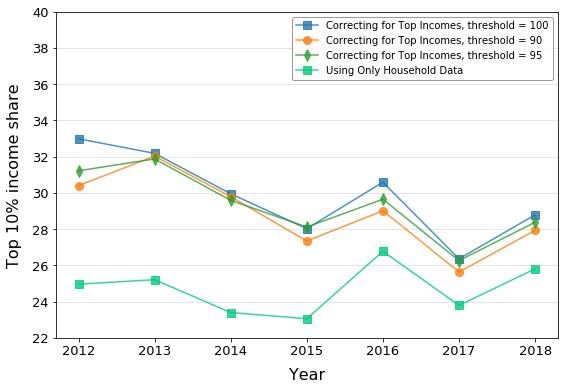

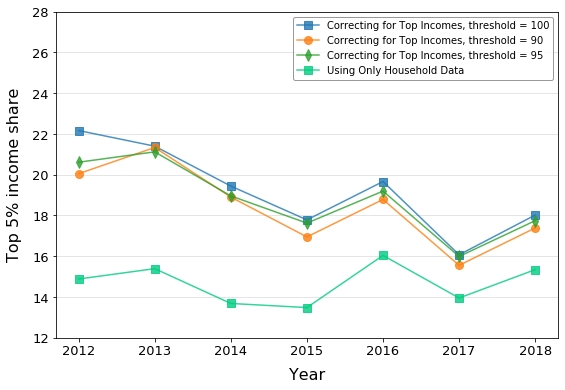

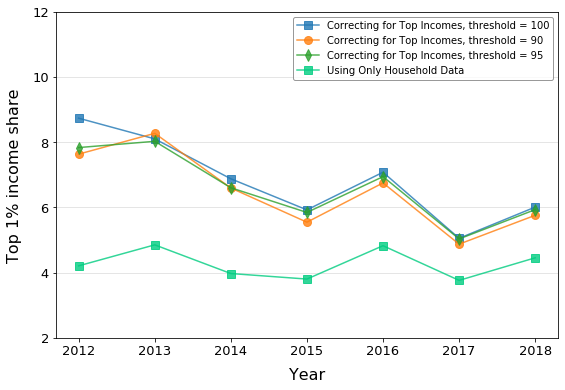

In [77]:
# plot 10P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"10HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareTen[(shareTen['year'] >= 1391) & (shareTen['year'] <= 1397)],
        label=f"Correcting for Top Incomes, threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"10HalfDecileSurv", 'o-',
        data= shareTen[(shareTen['year'] >= 1391) & (shareTen['year'] <= 1397)],
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Using Only Household Data",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 10% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1391,1398,1))
ax1.set_xticklabels(np.arange(1391+621,1398+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(22,40)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)

plt.show()
fig.savefig(f'../Figures/Robustness/Income_shares_by_10percent_Tehran_rent.pdf',transparent=True,bbox_inches="tight")






# plot 5P estimated and from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"20HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareFive[(shareFive['year'] >= 1391) & (shareFive['year'] <= 1397)],
        label=f"Correcting for Top Incomes, threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
#        linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"20HalfDecileSurv", 'o-',
        data= shareFive[(shareFive['year'] >= 1391) & (shareFive['year'] <= 1397)],
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Using Only Household Data",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 5% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1391,1398,1))
ax1.set_xticklabels(np.arange(1391+621,1398+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(12,28)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)

plt.show()
fig.savefig(f'../Figures/Robustness/Income_shares_by_5percent_Tehran_rent.pdf',transparent=True,bbox_inches="tight")



# plot 1P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"100HalfDecileEst_thresh_{tauThreshold}", 'o-',
#         data= shareOne[1398>=shareFive.year>=1391],
        data= shareOne[(shareOne['year'] >= 1391) & (shareOne['year'] <= 1397)],

        label=f"Correcting for Top Incomes, threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
#        linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"100HalfDecileSurv", 'o-',
        data= shareOne[(shareOne['year'] >= 1391) & (shareOne['year'] <= 1397)],
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Using Only Household Data",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 1% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1391,1398,1))
ax1.set_xticklabels(np.arange(1391+621,1398+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(2,12)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)

plt.show()
fig.savefig(f'../Figures/Robustness/Income_shares_by_1percent_Tehran_rent.pdf',transparent=True,bbox_inches="tight")





**income share for top 1, 5, 10% Iran**

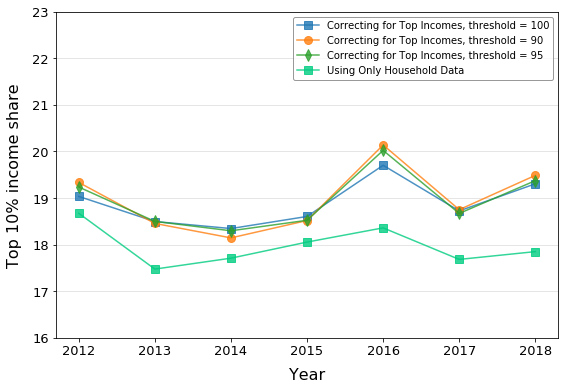

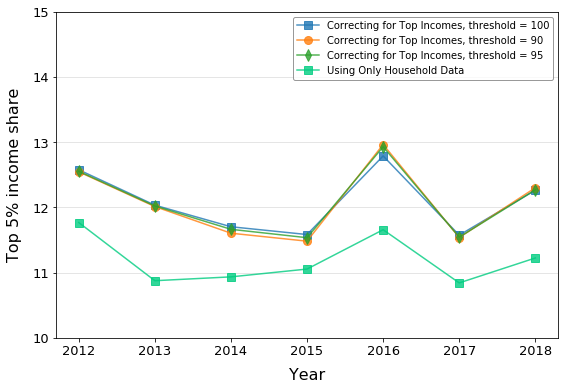

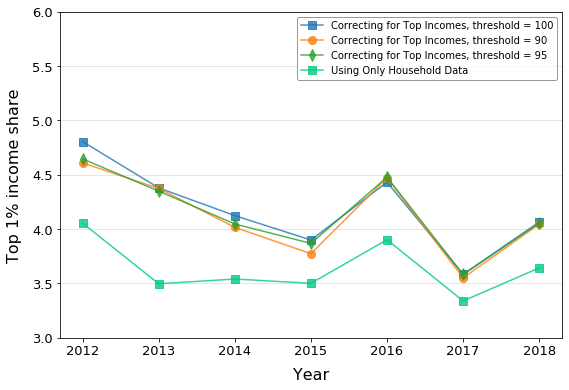

In [78]:
# plot 10P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"10HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareTenIran[(shareTen['year'] >= 1391) & (shareTen['year'] <= 1397)],
        label=f"Correcting for Top Incomes, threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"10HalfDecileSurv", 'o-',
        data= shareTenIran[(shareTen['year'] >= 1391) & (shareTen['year'] <= 1397)],
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Using Only Household Data",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 10% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1391,1398,1))
ax1.set_xticklabels(np.arange(1391+621,1398+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(16,23)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)

plt.show()
fig.savefig(f'../Figures/Robustness/Income_shares_by_10percent_Iran_rent.pdf',transparent=True,bbox_inches="tight")






# plot 5P estimated and from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"20HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareFiveIran[(shareFive['year'] >= 1391) & (shareFive['year'] <= 1397)],
        label=f"Correcting for Top Incomes, threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
#        linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"20HalfDecileSurv", 'o-',
        data= shareFiveIran[(shareFive['year'] >= 1391) & (shareFive['year'] <= 1397)],
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Using Only Household Data",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 5% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1391,1398,1))
ax1.set_xticklabels(np.arange(1391+621,1398+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(10,15)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)

plt.show()
fig.savefig(f'../Figures/Robustness/Income_shares_by_5percent_Iran_rent.pdf',transparent=True,bbox_inches="tight")



# plot 1P estimated and from survey ##
fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)

for nmr,tauThreshold in enumerate(different_threshold_of_top_HIES):
    ax1.plot("year", f"100HalfDecileEst_thresh_{tauThreshold}", 'o-',
        data= shareOneIran[(shareOne['year'] >= 1391) & (shareOne['year'] <= 1397)],
        label=f"Correcting for Top Incomes, threshold = {tauThreshold}",
#         marker = markerShape[0],
        marker = markerShape[nmr+1],
#        linestyle=ll[nmr] ,
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)


ax1.plot("year", f"100HalfDecileSurv", 'o-',
        data= shareOneIran[(shareOne['year'] >= 1391) & (shareOne['year'] <= 1397)],
#        color=(0.1,0.1,0.9,0.9),
        color=(0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Using Only Household Data",
        linewidth=1.5,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Top 1% income share', fontsize=16, labelpad=10)
ax1.set_xticks(np.arange(1391,1398,1))
ax1.set_xticklabels(np.arange(1391+621,1398+621,1))
ax1.tick_params(labelsize=13)
ax1.set_ylim(3,6)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)

plt.show()
fig.savefig(f'../Figures/Robustness/Income_shares_by_1percent_Iran_rent.pdf',transparent=True,bbox_inches="tight")





<br>

<br>

**Gini coefficient of whole country**



In [ ]:
Gini_House_Price.year = np.arange(1389,1399,1)
Gini_House_Price

In [ ]:
## plot gini estimated and gini from survey ##

fig=plt.figure(figsize=(9,6))
ax1=fig.add_subplot(1,1,1)


ax1.plot('year', 'GiniIranSurvey', 's-',
        data= result,
        color=(0.1,0.1,0.9,0.9),
        label='Gini_Survey',
        marker = markerShape[0],
        linewidth=1,
        markersize= 7,
        alpha=0.8)


ax1.plot("year", f"GiniIran{different_threshold_of_top_HIES[0]}", 'o-',
        data= result[result.year>139],
#         color= (0,0.8,0.5,0.8),
        marker = markerShape[2],
        label= f"Gini estimated with rent price",
        linestyle="dotted",
        linewidth=2,
        markersize= 7,
        alpha=0.8)

ax1.plot("year", f"Gini_y", 'o-',
        data= Gini_House_Price,
        color= (0,0.8,0.5,0.8),
        marker = markerShape[1],
        label= f"Gini estimated with house price",
        linestyle="dashed",
        linewidth=2,
        markersize= 8,
        alpha=0.8)

ax1.grid(axis='y',alpha=0.4)
# ax1.set_title(f'year {1300+year}')
ax1.set_xlabel('Year', fontsize=16, labelpad=10)
ax1.set_ylabel('Gini Index',
               fontsize=16, labelpad=10)
ax1.legend(loc='best')
# ax1.set_ylim(0.314,0.445)
# ax1.set_yticks(np.arange(0.32,0.45,0.02))
ax1.set_title("Iran",fontsize=19)
ax1.set_xticks(np.arange(1389,1399,1))
ax1.set_xticklabels(np.arange(1389+621,1399+621,1))
ax1.tick_params(labelsize=13)
ax1.legend(loc='best',edgecolor='gray',prop={'size':10}, handlelength=2.2)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.show()

#fig.savefig(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Figures/Robustness/Iran3.pdf',transparent=True,bbox_inches="tight")
#fig.savefig(f'../Figures/Robustness/Iran3.pdf',transparent=True,bbox_inches="tight")




<br></br>
<br></br>

**Gini coefficient of Tehran Province**

<br></br>
<br></br>

In [ ]:
## plot gini estimated and gini from survey ##
prov = "23"

for prov in province_set:
    provName = next(key for key, value in provinceCodeEng.items() if value == prov)
    
    fig=plt.figure(figsize=(9,6))
    ax1=fig.add_subplot(1,1,1)


    ax1.plot('year', 'GiniSurvey'+prov, 'x-',
            data= result,
            color=(0.1,0.1,0.9,0.9),
            label='Gini_Survey',
            markersize= 7,
            alpha=0.8)

    ax1.plot("year", "Gini"+prov+f"_{different_threshold_of_top_HIES[0]}", 'o-',
            data= result.loc[result.year>139,:],
#             color= (0,0.8,0.5,0.8),
            label= "Gini Estimated with rent data",
            linestyle="dotted",
            linewidth=2,
            markersize= 7,
            alpha=0.8)
    
    ax1.plot("year", "Gini_x", 's-',
            data= Gini_House_Price,
            color= (0,0.8,0.5,0.8),
            label= "Gini Estimated with house price",
            linestyle="dashed",
            linewidth=2,
            markersize= 8,
            alpha=0.8)

#     ax1.fill_between('year', 'Gini_lower', 'Gini_upper'
#                      ,data= result
#                      ,color=(0,0.8,0.5,0.15)
#                      ,linewidth= 1)

    ax1.grid(axis='y',alpha=0.4)
    # ax1.set_title(f'year {1300+year}')
    ax1.set_xlabel('Year', fontsize=16, labelpad=10)
    ax1.set_ylabel('Gini Index',
                   fontsize=16, labelpad=10)
    ax1.legend(loc='best')
    # ax1.set_ylim(0.314,0.445)
    # ax1.set_yticks(np.arange(0.32,0.45,0.02))
    ax1.set_xticks(np.arange(1389,1399,1))
    ax1.set_xticklabels(np.arange(1389+621,1399+621,1))

    # ax1.set_xticklabels(np.arange(0.8,0.98,0.02)*100)
    ax1.set_title("Tehran",fontsize=19)
    ax1.tick_params(labelsize=13)
    ax1.legend(loc='best',edgecolor='gray',prop={'size':13}, handlelength=2.2)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
#     ax1.set_yticks(np.arange(30,55.6,2.5))
    plt.show()
    
#fig.savefig(f'/Users/ZShamloo/Dropbox/Iran Inequality Measure, Zahra Shamlou/Figures/Robustness/Tehran3.pdf',transparent=True,bbox_inches="tight")
# fig.savefig(f'../Figures/Robustness/Tehran3.pdf',transparent=True,bbox_inches="tight")


In [ ]:
result

NameError: name 'rentTotal' is not defined

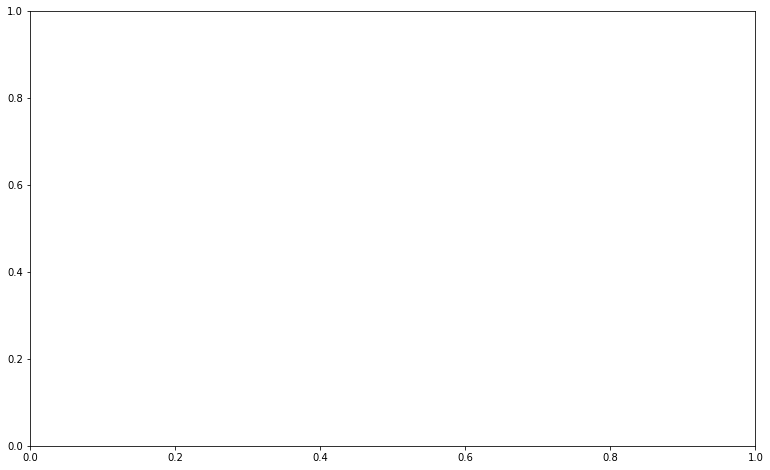

In [293]:
## input year and urban area to calcluate ##

urban = 1

fig=plt.figure(figsize=(13,8))
ax1=fig.add_subplot(1,1,1)
    
for year in np.arange(90,99,1):
    
    ########################################
    ##    estimating theta from survey    ##
    ########################################
    expenditure = expenditureTotal.loc[(expenditureTotal.year==year)
                                      &(expenditureTotal.urban==urban),:]

    # define new vaiables:
    expenditure['hazinehPerCapita']= expenditure.Daramad #GHazineh/np.sqrt(expenditure.tedad)
    expenditure['LnHazineh']= np.log(expenditure.hazinehPerCapita)
    expenditure['province']= expenditure.household.astype(str).str[1:3]

    # calculating empirical cumulative density function
    expenditure.sort_values(by=["province","hazinehPerCapita"],inplace=True)
    expenditure['Fy'] = expenditure.groupby('province')['weight'].transform(pd.Series.cumsum)
    expenditure['countProv']=expenditure.groupby('province')['weight'].transform(pd.Series.sum)
    expenditure['Fy'] = expenditure.Fy/expenditure.countProv
    expenditure.drop(columns=["countProv"], inplace=True)


    #############################################
    ##     calculating beta from survey        ##
    #############################################
    rent = rentTotal.loc[(rentTotal.year==year)]
#                     &(rentTotal.urban==urban),:]


    rent= rent.loc[(rent.DYCOL01 < 43000) , ['Address','DYCOL01' ,'DYCOL04']]
    rent.columns=['household','ownership' ,'rent']
    rent = rent.groupby(by=["household"]).agg({"rent":"sum"}).reset_index()

    #data cleaning
    rent['rent']= rent['rent'] * 12
    rent['LnRent']= np.log(rent.rent)
    # merge two data set by household number :
    rent = pd.merge(rent, expenditure, on=['household'], how='inner')

    rent.sort_values(by=["province","rent"],inplace=True)
    rent['Fy'] = rent.groupby('province')['weight'].transform(pd.Series.cumsum)
    rent['countProv']=rent.groupby('province')['weight'].transform(pd.Series.sum)
    rent['Fy'] = rent.Fy/rent.countProv
    rent.drop(columns=["countProv"],inplace=True)


    # Extracting Tehran :
    rentTehran= rent[rent.province.isin(["30"])]

    space=np.arange(0.8, 0.99, 0.01)
    beta=np.zeros(shape=(19,5))

    for index,topPercentile in enumerate(space):

        x=rentTehran[rentTehran['Fy']>=topPercentile]['LnRent']
        y=rentTehran[rentTehran['Fy']>=topPercentile]['LnHazineh']

        results = mt.reg(
        rentTehran[(rentTehran['Fy']>=topPercentile)
                  ],                     # DataFrame
        'LnHazineh',                      # Dependent var (string)
        'LnRent',                      # Independent var(s) (string or list of strings)
        addcons=True
        ,awt_name='weight'    # Sample weights
        )


    #     results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()
        beta[index,0]=topPercentile
        beta[index,1]= results.beta['LnRent']

        se= results.se['LnRent']
        beta[index,4]=se

        beta[index,2]= (results.beta['LnRent']+ 1.6*se)
        beta[index,3]= (results.beta['LnRent']- 1.6*se)

    #***********************
    #***      Beta       ***
    #***********************
    
    # plot beta ##

    ax1.plot(beta[:,0], beta[:,1]
#              ,"-s"
#              ,markersize = 9
             , linewidth = 2.5
             , label=f"beta {year}")
    
    
ax1.grid(axis='y',alpha=0.5)
#     ax1.set_title(f'Pareto tail for Tehran house prices in {1300+year')
ax1.set_xlabel('percentile', fontsize=18,labelpad=10)
ax1.set_ylabel('coefficient beta' , fontsize=18,labelpad=0)
ax1.tick_params(labelsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim(0,1.25)
plt.legend(loc="lower left",edgecolor='w',prop={'size':13}, handlelength=1.5,ncol=2)
plt.show() 
    
# fig.savefig('Figures/beta All Year.pdf',transparent=True,bbox_inches="tight")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_m, alpha = 1, 3.
#drawing samples from distribution
samples = (np.random.pareto(alpha, 1000) + 1) * x_m
count, bins, _ = plt.hist(samples, 100, normed=True)
fit = alpha*x_m**alpha / bins**(alpha+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.xlabel('bins', fontsize=15)
plt.ylabel('probability density', fontsize=15)
plt.title('Probability Density Function', fontsize=15)
plt.grid(b=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [ ]:
theta = 3
tau = 1e7
samples = (np.random.pareto(theta, 10) + 1) * tau
samples

In [ ]:
samples = (np.random.pareto(theta, 10) + 1) * tau
samples = pd.DataFrame(samples,columns=["data"])
samples

In [ ]:
gini(samples)

In [ ]:
1 / (2*theta-1)

In [ ]:
tehran   10 5  
isfahan  5  4  4/
ghom     3  1  

# Pareto Parameter Estimation

In [13]:
loop = 5000
result = np.zeros(shape=(loop,1))
result = pd.DataFrame(result, columns=["year"])
result.order = np.arange(1,loop+1)

for enum in range(0,loop+1):

    tau = 100
    theta = 3
    N = 1000
    sample = (np.random.pareto(theta, N) + 1) * tau
    sample = pd.DataFrame(sample,columns=["value"])
    sample["lnValue"] = np.log(sample.value)
    sample["weight"] = 1

    sample.sort_values('value',inplace=True)
    sample.reset_index(drop=True, inplace=True)

    sample['G2y'] = sample.weight.cumsum()
    sample['G2y'] = sample.G2y / sample.weight.sum()


    # new estimation method with Maximum Likelihood ------------------------------
    # Fit Pareto distribution to the variable
    loc = sample.value.min()
    n = sample.shape[0]
    theta_estimate_ML = (n) / (sample.lnValue.sum() - n*np.log(loc))
    # print(theta_estimate_ML) 

    # ----------------------------------------------------------------------------
    # estimation with OLS 
    # N['G2y']=(N.index+1) / (N['totalPrice'].count())  
    sample.drop(sample.tail(1).index,inplace=True)
    sample['Xvariable']= -np.log(1-sample['G2y'])     
    
    x= sample['Xvariable']
    y= sample['lnValue']

    results = sm.OLS(y,sm.add_constant(x),missing='drop').fit()

    theta_estimate_ols = 1/results.params[1]
    # print(theta_estimate_ols)

    result.loc[(result.order==enum),"ML"] = theta_estimate_ML
    result.loc[(result.order==enum),"ML_error"] = (theta_estimate_ML- theta)/theta * 100

    result.loc[(result.order==enum),"OLS"] = theta_estimate_ols
    result.loc[(result.order==enum),"OLS_error"] = (theta_estimate_ols- theta)/theta * 100


# sample

In [14]:
result.mean()

year        0.000
ML          3.007
ML_error    0.219
OLS         3.035
OLS_error   1.169
dtype: float64